In [1]:
## Import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the csv files

train=pd.read_csv('train_LZdllcl.csv')
test=pd.read_csv('test_2umaH9m.csv')

test_original=test.copy()
train_original=train.copy()

In [3]:
## Checking the shape of data

print('train: ',train.shape)
print('test: ',test.shape)

train:  (54808, 14)
test:  (23490, 13)


In [4]:
## Columns in the train dataset

train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
## First 5 rows of the train dataset

train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
## Checking the number of null values in the columns of the train dataset

train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
## Checking the number of null values in the columns of test dataset

test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
## Checking the unique values and their count for each column

cols=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']
for i in cols:
    print(i,': ')
    print(train[i].value_counts())

department : 
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
region : 
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
education : 
Bachelor's      

In [9]:
## Checking the data type 

train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
## CHecking the spread of data to get some insight

train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
## Dropping unused columns

train=train.drop('employee_id',1)
test=test.drop('employee_id',1)

In [12]:
## Rechecking

train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


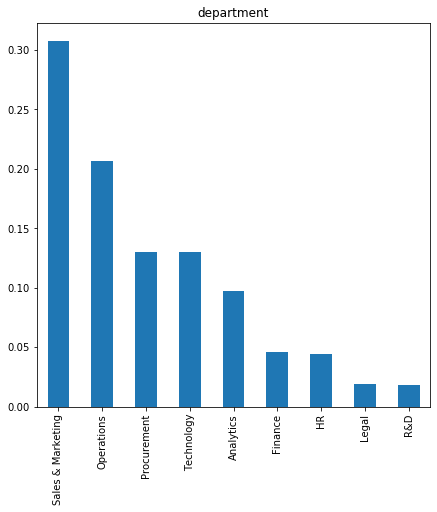

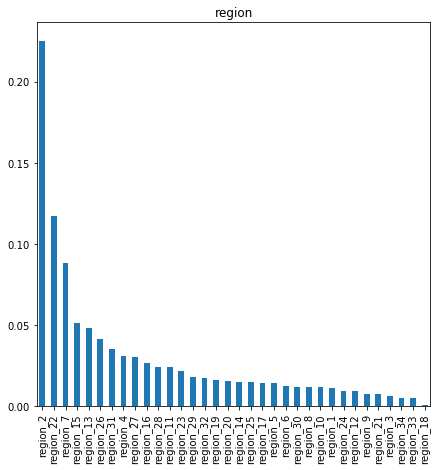

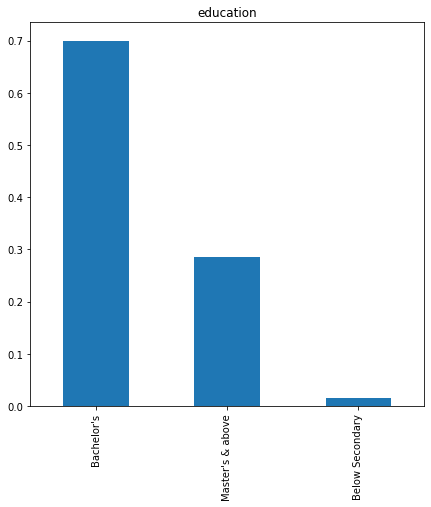

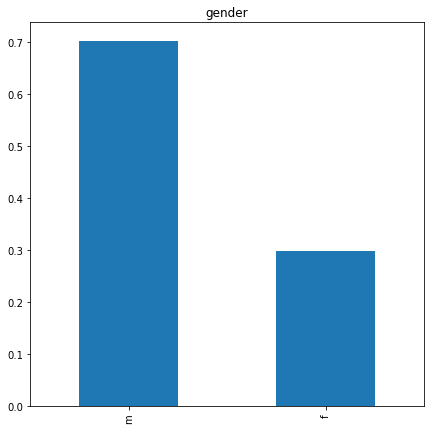

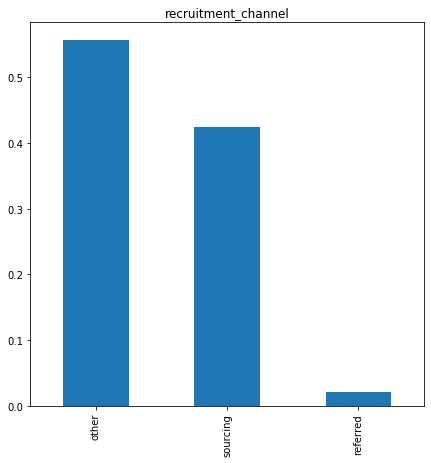

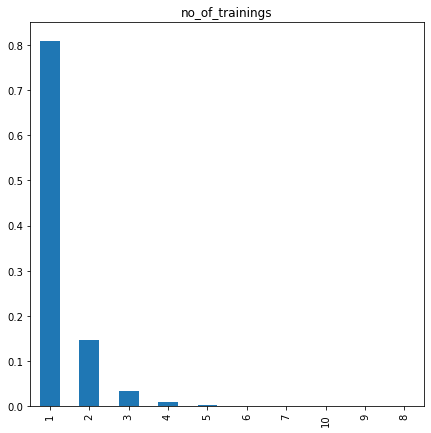

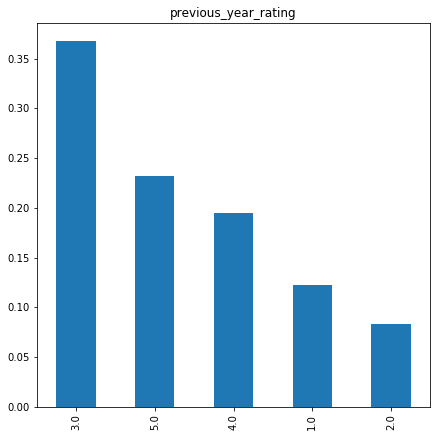

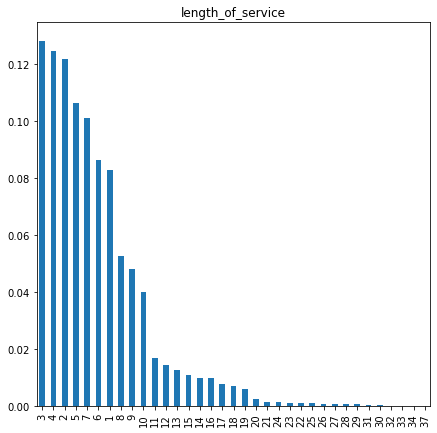

In [13]:
## Using visuals to understand the relative presence of each sub-category

cols_cat=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'is_promoted']
cols_num=['avg_training_score']
i=331
j=0
for i in range(331,339):
    plt.figure(1,figsize=(24,24))
    plt.subplot(i)
    train[cols_cat[j]].value_counts(normalize=True).plot.bar(figsize=(24,24),title=cols_cat[j])
    plt.show()
    j+=1

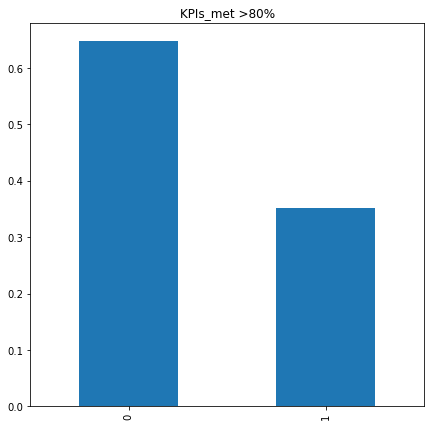

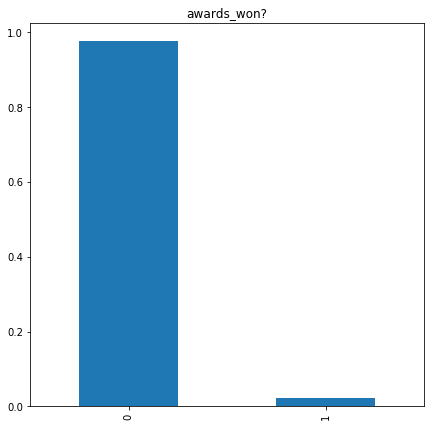

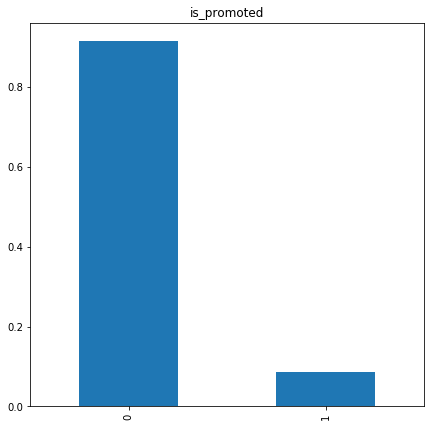

In [14]:
i=331
j=8
for i in range(331,334):
    plt.figure(1,figsize=(24,24))
    plt.subplot(i)
    train[cols_cat[j]].value_counts(normalize=True).plot.bar(figsize=(24,24),title=cols_cat[j])
    plt.show()
    j+=1

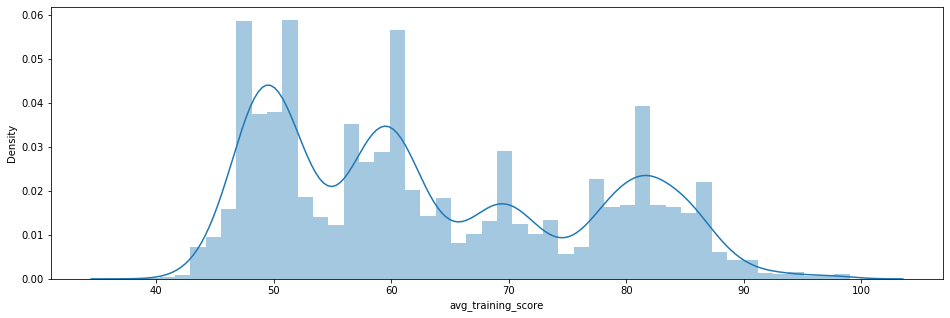

In [15]:
plt.figure(1,figsize=(16,5))
sns.distplot(train['avg_training_score']);
plt.show()

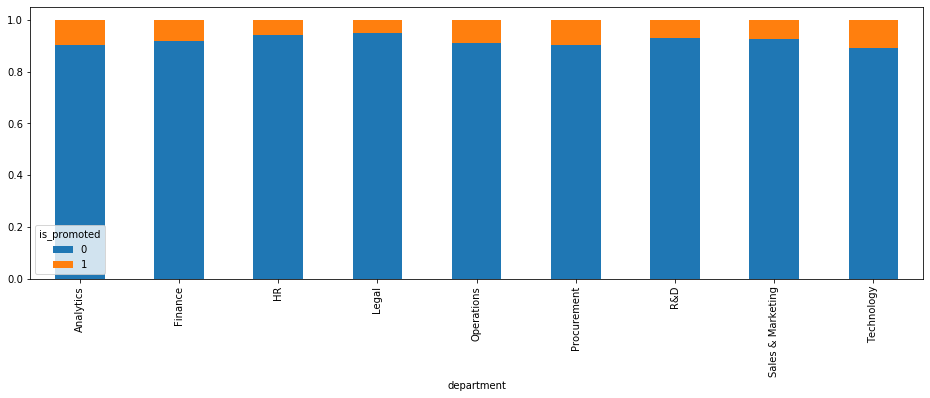

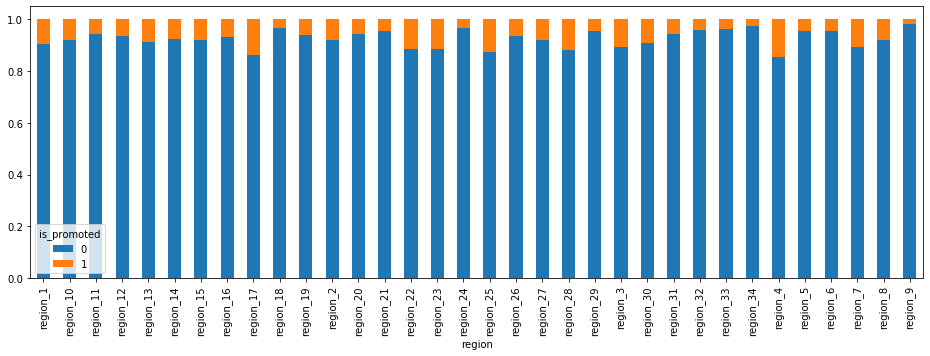

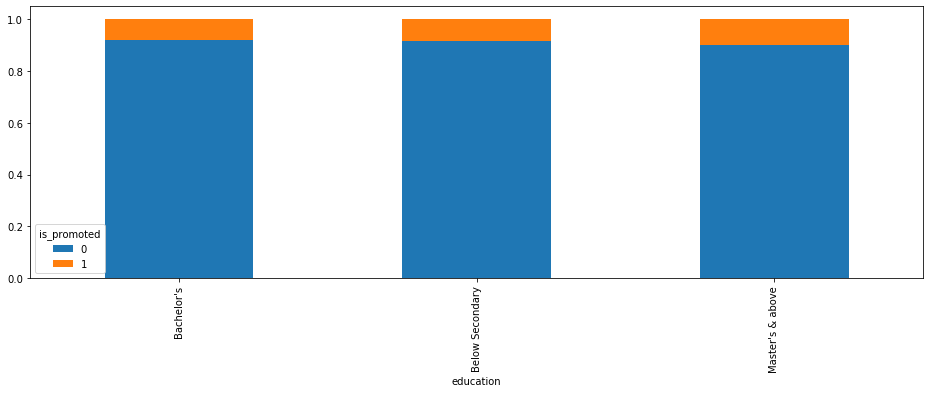

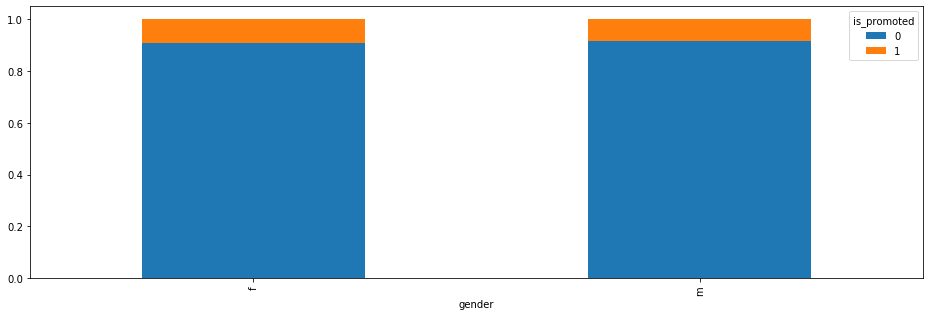

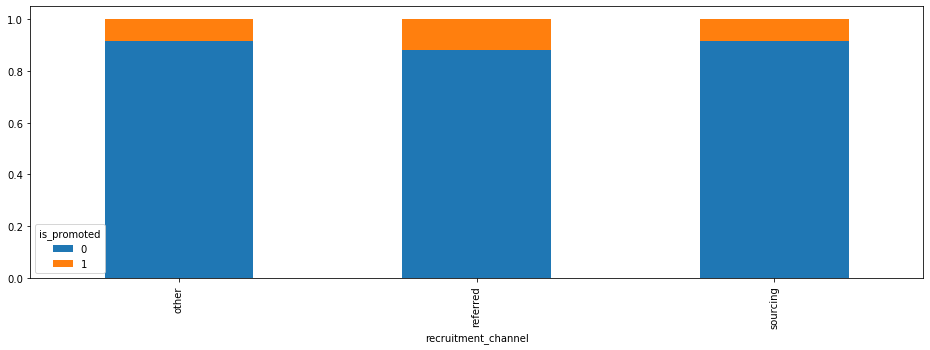

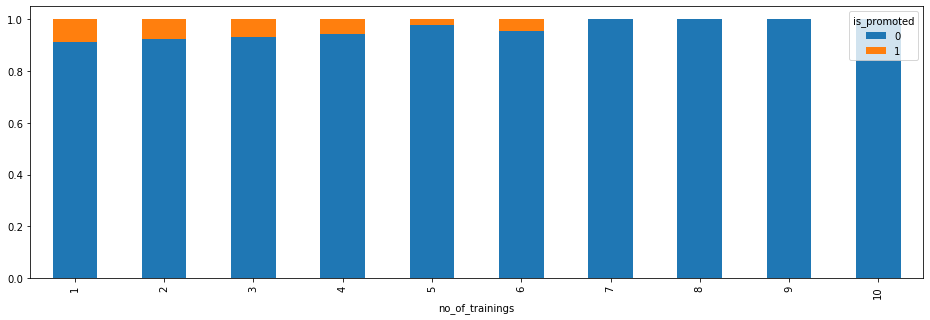

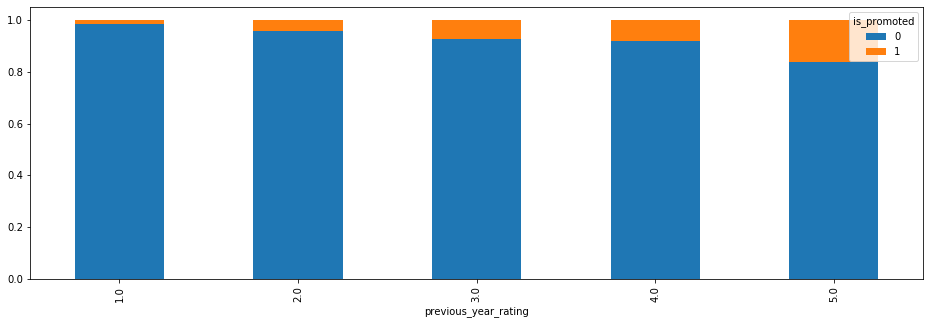

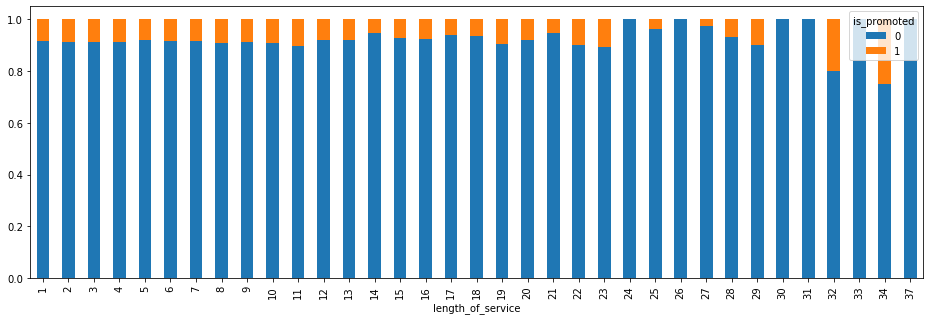

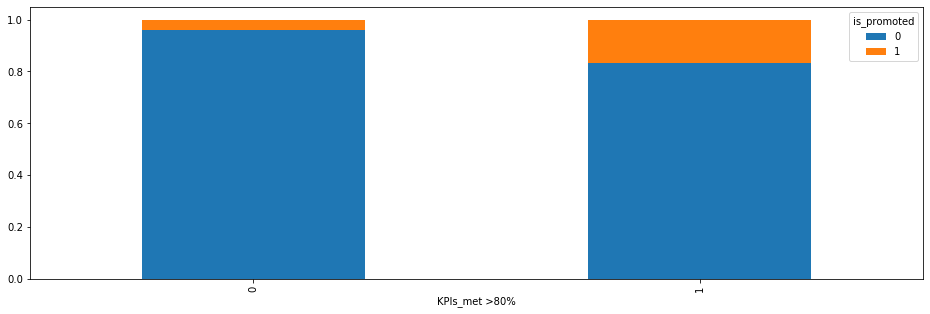

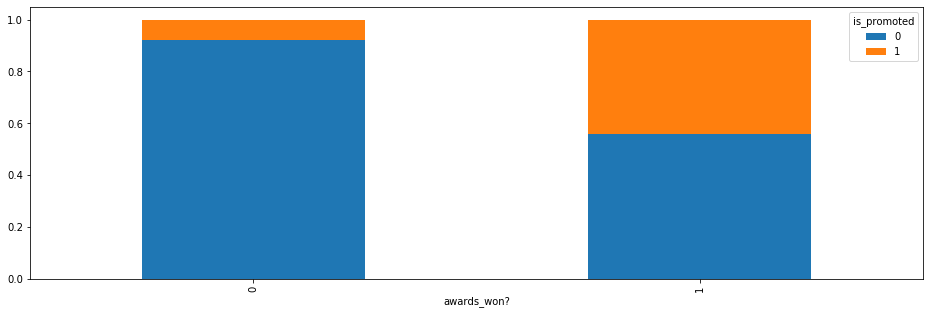

In [16]:
## Categorical variables with respect to the target variable

cols_cat=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'is_promoted']
department=pd.crosstab(train['department'],train['is_promoted'])
region=pd.crosstab(train['region'],train['is_promoted'])
education=pd.crosstab(train['education'],train['is_promoted'])
gender=pd.crosstab(train['gender'],train['is_promoted'])

channel=pd.crosstab(train['recruitment_channel'],train['is_promoted'])
trainings=pd.crosstab(train['no_of_trainings'],train['is_promoted'])
rating=pd.crosstab(train['previous_year_rating'],train['is_promoted'])
service=pd.crosstab(train['length_of_service'],train['is_promoted'])

kpi=pd.crosstab(train['KPIs_met >80%'],train['is_promoted'])
awards=pd.crosstab(train['awards_won?'],train['is_promoted'])

department.div(department.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
region.div(region.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()

channel.div(channel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
trainings.div(trainings.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
rating.div(rating.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
service.div(service.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()

kpi.div(kpi.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()
awards.div(awards.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(16,5))
plt.show()

From above graph, the factors that seem to be affecting the decision are:
- Department
- Region
- No. of tranings
- Previous Year Rating
- Length of Service
- KPIs met
- Awards won

Following this, we'll further explore these factors in order to find out more about their contribution towards the decision.

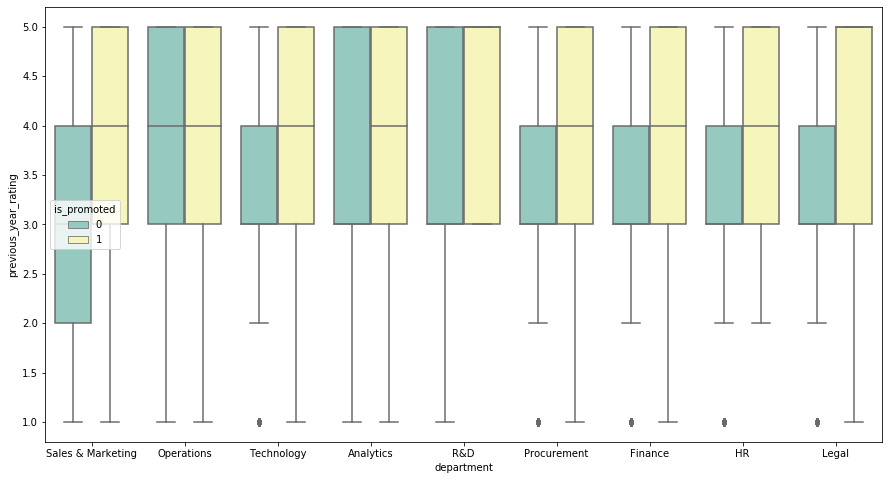

In [17]:
plt.figure(figsize = (15,8))
sns.boxplot(x="department", y="previous_year_rating", hue="is_promoted",data=train, palette="Set3")

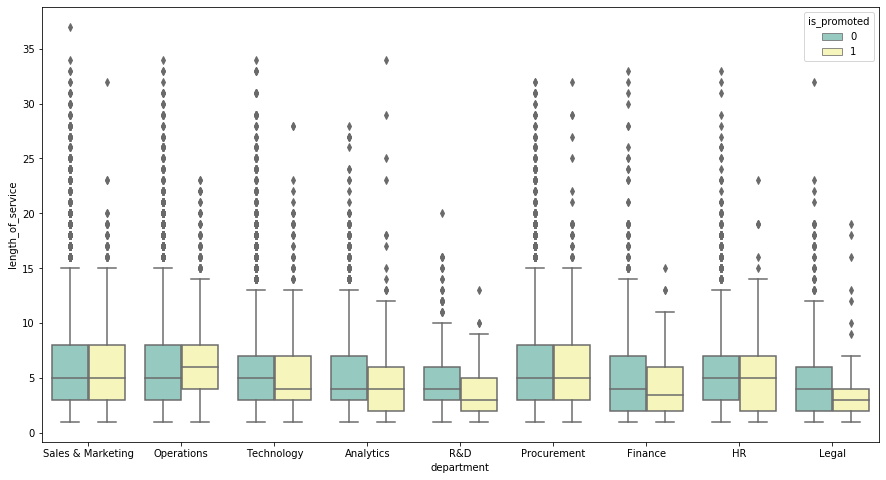

In [18]:
plt.figure(figsize = (15,8))
sns.boxplot(x="department", y="length_of_service", hue="is_promoted",data=train, palette="Set3")

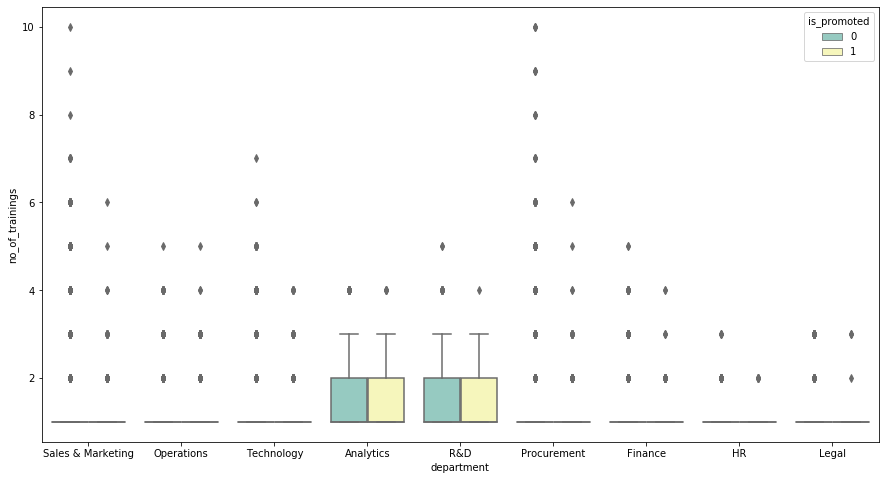

In [19]:
plt.figure(figsize = (15,8))
sns.boxplot(x="department", y="no_of_trainings", hue="is_promoted",data=train, palette="Set3")

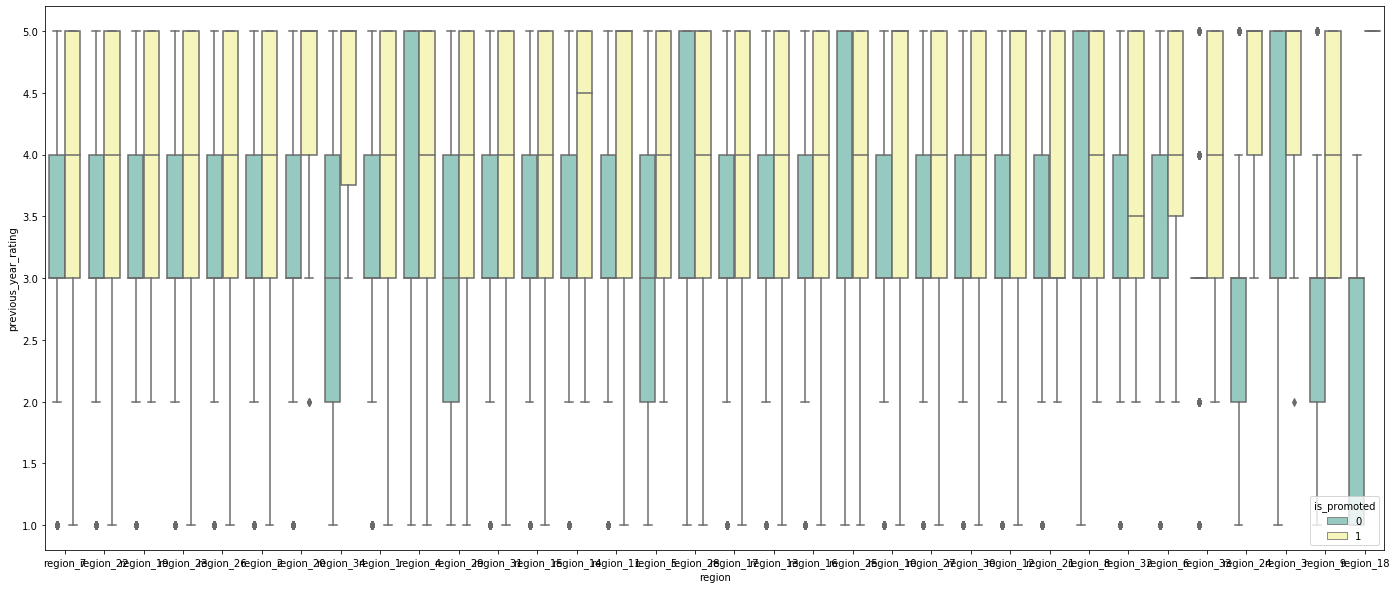

In [20]:
plt.figure(figsize = (24,10))
sns.boxplot(x="region", y="previous_year_rating", hue="is_promoted",data=train, palette="Set3")

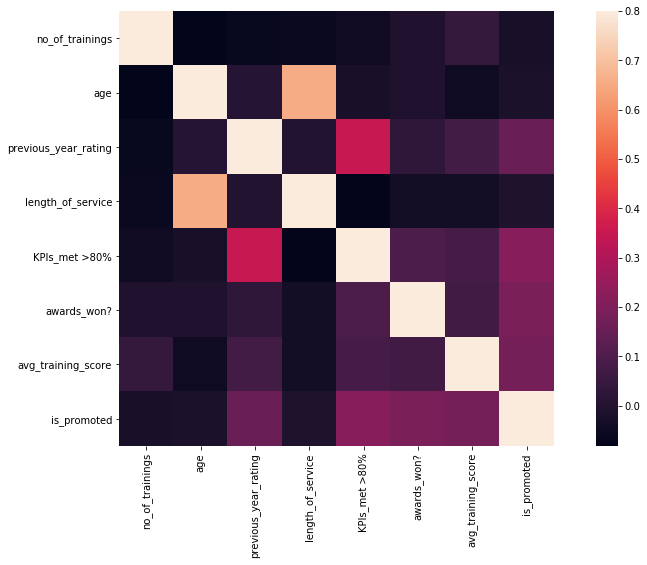

In [21]:
## Checking for correlation between variables

matrix=train.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(matrix,vmax=.8,square=True);

In [22]:
matrix

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


## Cleaning

In [23]:
## Renaming columns and sub-categories for easy reference and avoid unnecessary errors

train.rename(columns = {'KPIs_met >80%':'kpi','awards_won?':'awards'}, inplace = True)
test.rename(columns = {'KPIs_met >80%':'kpi','awards_won?':'awards'}, inplace = True)

train.replace({'Sales & Marketing':'Sales_Marketing','R&D':'R_and_D','Bachelor\'s':'Bachelor','Master\'s & above':'Master','Below Secondary':'Below_secondary'}, inplace = True)
test.replace({'Sales & Marketing':'Sales_Marketing','R&D':'R_and_D','Bachelor\'s':'Bachelor','Master\'s & above':'Master','Below Secondary':'Below_secondary'}, inplace = True)



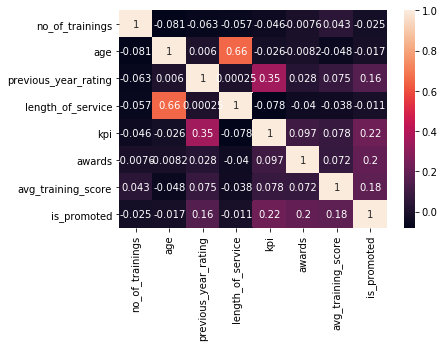

In [24]:
sns.heatmap(train.corr(), annot = True);

In [25]:
## FIlling missing values with most frequently occuring value

train['education']=train['education'].fillna('Bachelor')
train['previous_year_rating']=train['previous_year_rating'].fillna(1.0)

In [26]:
test['education']=test['education'].fillna('Bachelor')
test['previous_year_rating']=test['previous_year_rating'].fillna(1.0)

In [27]:
## Checking for left out nulll values

train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
kpi                     0
awards                  0
avg_training_score      0
is_promoted             0
dtype: int64

In [28]:
## Checking for left out nulll values

test.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
kpi                     0
awards                  0
avg_training_score      0
dtype: int64

In [29]:
## Fixing data type issue

train['previous_year_rating']=train['previous_year_rating'].astype(int)
test['previous_year_rating']=test['previous_year_rating'].astype(int)

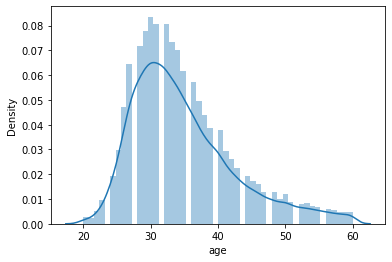

In [30]:
# Based on Age Distribution - Most of the Employees are in range 20-40 who will be also waiting for a Promotion
# so we have created 2 Bins 20-29, 29-39 and remaining 1 Bin for 39-49.
# displot -> plot a univariate(Single Feature) distribution of observations.
sns.distplot(train['age'])
train['age'] = pd.cut( x=train['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['age']  = pd.cut( x=test['age'], bins=[20, 29, 39, 49],  labels=['20', '30', '40'] )

In [31]:
## Rechecking

train.dtypes

department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                     category
previous_year_rating       int32
length_of_service          int64
kpi                        int64
awards                     int64
avg_training_score         int64
is_promoted                int64
dtype: object

In [32]:
## Rechecking

test.dtypes

department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                     category
previous_year_rating       int32
length_of_service          int64
kpi                        int64
awards                     int64
avg_training_score         int64
dtype: object

## Encoding

In [33]:
## Assigning numerical values to categories so that ML models could understand

from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()
train['gender_n']=Numerics.fit_transform(train['gender'])
train=train.drop('gender',1)
test['gender_n']=Numerics.fit_transform(test['gender'])
test=test.drop('gender',1)


In [34]:
## One-Hot Encoding for nominal categorical variables

t=train
t=pd.get_dummies(t,drop_first=True)
t.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service', 'kpi',
       'awards', 'avg_training_score', 'is_promoted', 'gender_n',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R_and_D',
       'department_Sales_Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'r

In [35]:
test=pd.get_dummies(test,drop_first=True)
test.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service', 'kpi',
       'awards', 'avg_training_score', 'gender_n', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R_and_D',
       'department_Sales_Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6'

## Feature Selection

In [36]:
## Checking the relative importance of variables w.r.t the target variable

X1=t.drop('is_promoted',1)
y1=t[['is_promoted']]

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X1, y1)
print(mutual_info)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X1.columns
print(mutual_info.sort_values(ascending=False))

[6.70373360e-03 1.42931616e-02 1.45833916e-04 2.59781099e-02
 1.09792440e-02 2.90534272e-02 4.66062486e-03 7.26618554e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.69355979e-04
 1.44585741e-03 0.00000000e+00 7.44800937e-04 3.10565276e-04
 0.00000000e+00 1.66879482e-04 6.06322279e-04 2.00754689e-03
 3.54266167e-04 6.67819046e-04 0.00000000e+00 3.75120826e-04
 1.15193205e-04 0.00000000e+00 9.05059964e-04 0.00000000e+00
 2.68604175e-04 6.60581855e-04 0.00000000e+00 4.07786031e-04
 1.78410532e-03 4.92164201e-04 5.03153884e-04 1.10041312e-03
 1.38267877e-04 0.00000000e+00 0.00000000e+00 2.02199506e-04
 0.00000000e+00 0.00000000e+00 8.99121610e-04 4.19647043e-04
 9.25640383e-04 9.46039940e-04 3.13875965e-04 3.15021794e-04
 0.00000000e+00 2.16445372e-03 4.64565010e-04 1.29369134e-03
 4.87572334e-03 0.00000000e+00]
avg_training_score              0.029053
kpi                             0.025978
previous_year_rating            0.014293
awards                          0.010979
no_of_train

In [37]:
train1=t

In [38]:
## Removing unwanted columns

train=t[['no_of_trainings',  'previous_year_rating', 'length_of_service',
       'kpi', 'awards', 'avg_training_score','gender_n',
        'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R_and_D',
       'department_Sales_Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6',
       'region_region_7', 'region_region_8', 'region_region_9','age_30','age_40',
        'is_promoted']]
train.head()


,no_of_trainings,previous_year_rating,length_of_service,kpi,awards,avg_training_score,gender_n,department_Finance,department_HR,department_Legal,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,age_30,age_40,is_promoted
0,1,5,8,1,0,49,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,5,4,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,7,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,1,10,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,3,2,0,0,73,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
test=test[['no_of_trainings',  'previous_year_rating', 'length_of_service',
       'kpi', 'awards', 'avg_training_score','gender_n',
        'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R_and_D',
       'department_Sales_Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6',
       'region_region_7', 'region_region_8', 'region_region_9','age_30','age_40']]

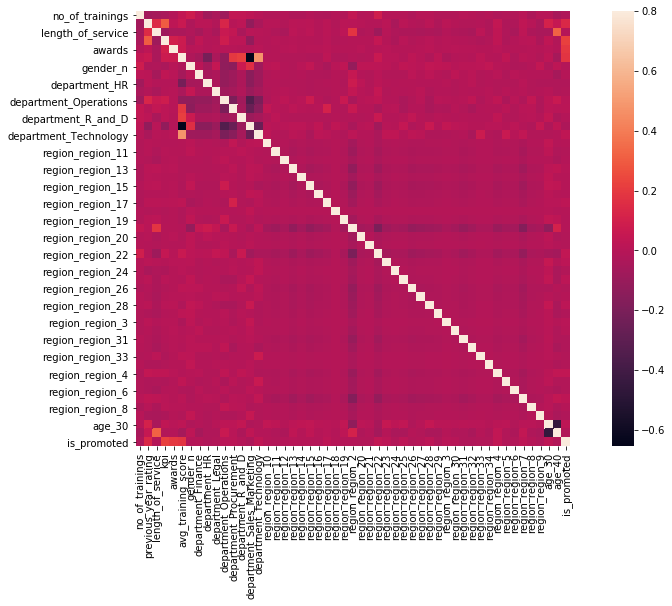

In [40]:
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),vmax=.8,square=True);

## Train-test split

In [41]:
X=train.drop('is_promoted',1)
y=train.is_promoted

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)
x_train.head()

,no_of_trainings,previous_year_rating,length_of_service,kpi,awards,avg_training_score,gender_n,department_Finance,department_HR,department_Legal,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,age_30,age_40
8735,2,3,2,0,0,78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53192,1,2,5,0,0,48,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30748,4,3,7,0,0,46,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21506,1,4,5,1,0,58,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9940,1,4,2,1,0,51,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y.unique()

array([0, 1], dtype=int64)

In [44]:
X.shape

(54808, 50)

## Model Building

### Selecting a baseline model
A baseline model is the simplest model that can be used as a reference point for the algorithms we decide to actually apply to solve the problem statement. This Baseline model actually serves as a reference point to whether the approach we are thinking is doing any good.
For classification problem, generally we choose a model that predicts the majority class all the time. Otherwise, there are two most commonly used algorithms :
- Random Prediction Algorithm.
- Zero Rule Algorithm.

We'll use Zero Rule Algorithm that predicts the majority class, i.e, not promoted.

In [45]:
from sklearn.metrics import f1_score
#f1_score(y_train,y_pred,average=None)

In [46]:
# zero rule algorithm for classification
def zero_rule_algorithm_classification(y_train, x_cv):
    output_values = [row for row in y_train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(x_cv))]
    return predicted

y_cv_pred=zero_rule_algorithm_classification(y_train, x_cv)
f1_score(y_cv,y_cv_pred,average=None)

array([0.95505457, 0.        ])

### Selecting Models

In [47]:
# Boosting Algorithms 
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

In [61]:
from sklearn.ensemble                 import VotingClassifier

In [48]:
xgb_clss=XGBClassifier()
xgb_clss.fit(x_train,y_train)
y_pred_cv=xgb_clss.predict(x_cv)
print(f1_score(y_cv,y_pred_cv,average=None))

[09:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.96859985 0.50947688]


In [49]:
cat_clss=CatBoostClassifier()
cat_clss.fit(x_train,y_train)
y_pred_cv=cat_clss.predict(x_cv)
print(f1_score(y_cv,y_pred_cv,average=None))

Learning rate set to 0.051765
0:	learn: 0.6168244	total: 183ms	remaining: 3m 3s
1:	learn: 0.5695024	total: 199ms	remaining: 1m 39s
2:	learn: 0.5083851	total: 210ms	remaining: 1m 9s
3:	learn: 0.4720168	total: 218ms	remaining: 54.2s
4:	learn: 0.4446483	total: 224ms	remaining: 44.6s
5:	learn: 0.4181130	total: 230ms	remaining: 38.1s
6:	learn: 0.3905862	total: 236ms	remaining: 33.5s
7:	learn: 0.3722527	total: 242ms	remaining: 30s
8:	learn: 0.3553781	total: 248ms	remaining: 27.3s
9:	learn: 0.3414401	total: 254ms	remaining: 25.1s
10:	learn: 0.3262768	total: 260ms	remaining: 23.4s
11:	learn: 0.3059433	total: 266ms	remaining: 21.9s
12:	learn: 0.2901224	total: 272ms	remaining: 20.6s
13:	learn: 0.2766036	total: 278ms	remaining: 19.6s
14:	learn: 0.2690389	total: 284ms	remaining: 18.7s
15:	learn: 0.2626266	total: 291ms	remaining: 17.9s
16:	learn: 0.2572232	total: 297ms	remaining: 17.2s
17:	learn: 0.2520084	total: 303ms	remaining: 16.6s
18:	learn: 0.2434709	total: 310ms	remaining: 16s
19:	learn: 0.2

167:	learn: 0.1601044	total: 1.26s	remaining: 6.25s
168:	learn: 0.1600364	total: 1.27s	remaining: 6.23s
169:	learn: 0.1599565	total: 1.27s	remaining: 6.22s
170:	learn: 0.1599005	total: 1.28s	remaining: 6.2s
171:	learn: 0.1598260	total: 1.29s	remaining: 6.19s
172:	learn: 0.1597776	total: 1.29s	remaining: 6.19s
173:	learn: 0.1596990	total: 1.3s	remaining: 6.17s
174:	learn: 0.1596246	total: 1.31s	remaining: 6.16s
175:	learn: 0.1595070	total: 1.31s	remaining: 6.15s
176:	learn: 0.1594621	total: 1.32s	remaining: 6.14s
177:	learn: 0.1594265	total: 1.33s	remaining: 6.13s
178:	learn: 0.1593627	total: 1.33s	remaining: 6.11s
179:	learn: 0.1593195	total: 1.34s	remaining: 6.1s
180:	learn: 0.1592471	total: 1.34s	remaining: 6.09s
181:	learn: 0.1591742	total: 1.35s	remaining: 6.07s
182:	learn: 0.1589774	total: 1.36s	remaining: 6.07s
183:	learn: 0.1588635	total: 1.36s	remaining: 6.05s
184:	learn: 0.1587477	total: 1.37s	remaining: 6.04s
185:	learn: 0.1586955	total: 1.38s	remaining: 6.03s
186:	learn: 0.1

335:	learn: 0.1516206	total: 2.33s	remaining: 4.6s
336:	learn: 0.1515781	total: 2.33s	remaining: 4.59s
337:	learn: 0.1515249	total: 2.34s	remaining: 4.59s
338:	learn: 0.1514973	total: 2.35s	remaining: 4.58s
339:	learn: 0.1514585	total: 2.36s	remaining: 4.57s
340:	learn: 0.1514336	total: 2.36s	remaining: 4.56s
341:	learn: 0.1513949	total: 2.37s	remaining: 4.56s
342:	learn: 0.1513354	total: 2.37s	remaining: 4.55s
343:	learn: 0.1512868	total: 2.38s	remaining: 4.54s
344:	learn: 0.1512366	total: 2.39s	remaining: 4.53s
345:	learn: 0.1511871	total: 2.39s	remaining: 4.53s
346:	learn: 0.1511579	total: 2.4s	remaining: 4.52s
347:	learn: 0.1510995	total: 2.41s	remaining: 4.51s
348:	learn: 0.1510671	total: 2.41s	remaining: 4.5s
349:	learn: 0.1510246	total: 2.42s	remaining: 4.49s
350:	learn: 0.1509707	total: 2.42s	remaining: 4.48s
351:	learn: 0.1509295	total: 2.43s	remaining: 4.48s
352:	learn: 0.1509060	total: 2.44s	remaining: 4.47s
353:	learn: 0.1508792	total: 2.44s	remaining: 4.46s
354:	learn: 0.1

503:	learn: 0.1459893	total: 3.39s	remaining: 3.33s
504:	learn: 0.1459609	total: 3.39s	remaining: 3.33s
505:	learn: 0.1459242	total: 3.4s	remaining: 3.32s
506:	learn: 0.1458709	total: 3.41s	remaining: 3.31s
507:	learn: 0.1458470	total: 3.41s	remaining: 3.3s
508:	learn: 0.1457798	total: 3.42s	remaining: 3.3s
509:	learn: 0.1457400	total: 3.43s	remaining: 3.29s
510:	learn: 0.1457151	total: 3.43s	remaining: 3.29s
511:	learn: 0.1457061	total: 3.44s	remaining: 3.28s
512:	learn: 0.1456778	total: 3.45s	remaining: 3.27s
513:	learn: 0.1456664	total: 3.45s	remaining: 3.27s
514:	learn: 0.1456488	total: 3.46s	remaining: 3.26s
515:	learn: 0.1456257	total: 3.47s	remaining: 3.25s
516:	learn: 0.1455839	total: 3.47s	remaining: 3.24s
517:	learn: 0.1455639	total: 3.48s	remaining: 3.24s
518:	learn: 0.1455335	total: 3.48s	remaining: 3.23s
519:	learn: 0.1455069	total: 3.49s	remaining: 3.22s
520:	learn: 0.1454842	total: 3.5s	remaining: 3.21s
521:	learn: 0.1454706	total: 3.5s	remaining: 3.21s
522:	learn: 0.145

671:	learn: 0.1417337	total: 4.47s	remaining: 2.18s
672:	learn: 0.1417039	total: 4.48s	remaining: 2.18s
673:	learn: 0.1416958	total: 4.49s	remaining: 2.17s
674:	learn: 0.1416765	total: 4.49s	remaining: 2.16s
675:	learn: 0.1416633	total: 4.5s	remaining: 2.16s
676:	learn: 0.1416571	total: 4.5s	remaining: 2.15s
677:	learn: 0.1416425	total: 4.51s	remaining: 2.14s
678:	learn: 0.1416148	total: 4.52s	remaining: 2.13s
679:	learn: 0.1416021	total: 4.52s	remaining: 2.13s
680:	learn: 0.1415935	total: 4.53s	remaining: 2.12s
681:	learn: 0.1415809	total: 4.54s	remaining: 2.12s
682:	learn: 0.1415656	total: 4.54s	remaining: 2.11s
683:	learn: 0.1415459	total: 4.55s	remaining: 2.1s
684:	learn: 0.1415376	total: 4.56s	remaining: 2.1s
685:	learn: 0.1415274	total: 4.56s	remaining: 2.09s
686:	learn: 0.1415215	total: 4.57s	remaining: 2.08s
687:	learn: 0.1414922	total: 4.58s	remaining: 2.08s
688:	learn: 0.1414589	total: 4.58s	remaining: 2.07s
689:	learn: 0.1414346	total: 4.59s	remaining: 2.06s
690:	learn: 0.14

842:	learn: 0.1380782	total: 5.53s	remaining: 1.03s
843:	learn: 0.1380607	total: 5.54s	remaining: 1.02s
844:	learn: 0.1380463	total: 5.55s	remaining: 1.02s
845:	learn: 0.1380187	total: 5.55s	remaining: 1.01s
846:	learn: 0.1379940	total: 5.56s	remaining: 1s
847:	learn: 0.1379778	total: 5.57s	remaining: 998ms
848:	learn: 0.1379639	total: 5.57s	remaining: 991ms
849:	learn: 0.1379462	total: 5.58s	remaining: 984ms
850:	learn: 0.1379216	total: 5.58s	remaining: 978ms
851:	learn: 0.1378887	total: 5.59s	remaining: 971ms
852:	learn: 0.1378792	total: 5.59s	remaining: 964ms
853:	learn: 0.1378580	total: 5.6s	remaining: 958ms
854:	learn: 0.1378286	total: 5.61s	remaining: 951ms
855:	learn: 0.1377987	total: 5.61s	remaining: 944ms
856:	learn: 0.1377883	total: 5.62s	remaining: 937ms
857:	learn: 0.1377648	total: 5.62s	remaining: 931ms
858:	learn: 0.1377530	total: 5.63s	remaining: 924ms
859:	learn: 0.1377431	total: 5.63s	remaining: 917ms
860:	learn: 0.1377339	total: 5.64s	remaining: 911ms
861:	learn: 0.13

In [50]:
lgb_clss=LGBMClassifier()
lgb_clss.fit(x_train,y_train)
y_pred_cv=lgb_clss.predict(x_cv)
print(f1_score(y_cv,y_pred_cv,average=None))

[0.96917709 0.50697674]


Hyper-parameter tuning reference links:
- XGBoost: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- CatBoost: https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7
- LGBM: 

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [79]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classf=XGBClassifier()

random_search=RandomizedSearchCV(classf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[23:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [80]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [81]:


random_search.best_params_



{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [52]:
## Hyper Parameter Optimization

params_cat={
 "learning_rate"    : np.linspace(0,0.2,5) ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10]
    
}

## Hyperparameter optimization using RandomizedSearchCV
classf=CatBoostClassifier()

random_search=RandomizedSearchCV(classf,param_distributions=params_cat,n_iter=5,scoring='roc_auc',cv=5)
random_search.fit(X,y)


0:	learn: 0.5002979	total: 6.18ms	remaining: 6.17s
1:	learn: 0.4147573	total: 11.4ms	remaining: 5.71s
2:	learn: 0.3559709	total: 16.8ms	remaining: 5.59s
3:	learn: 0.3172546	total: 22ms	remaining: 5.46s
4:	learn: 0.2858314	total: 27.9ms	remaining: 5.54s
5:	learn: 0.2569311	total: 33.6ms	remaining: 5.57s
6:	learn: 0.2464888	total: 39ms	remaining: 5.54s
7:	learn: 0.2304434	total: 44.6ms	remaining: 5.53s
8:	learn: 0.2215385	total: 50.2ms	remaining: 5.53s
9:	learn: 0.2127070	total: 56ms	remaining: 5.54s
10:	learn: 0.2072421	total: 61.6ms	remaining: 5.54s
11:	learn: 0.2033878	total: 67.3ms	remaining: 5.54s
12:	learn: 0.1989525	total: 73ms	remaining: 5.54s
13:	learn: 0.1973583	total: 78.7ms	remaining: 5.54s
14:	learn: 0.1924029	total: 84.1ms	remaining: 5.53s
15:	learn: 0.1917670	total: 89.4ms	remaining: 5.5s
16:	learn: 0.1907694	total: 95ms	remaining: 5.49s
17:	learn: 0.1900657	total: 100ms	remaining: 5.47s
18:	learn: 0.1884903	total: 106ms	remaining: 5.46s
19:	learn: 0.1865795	total: 111ms	r

183:	learn: 0.1510636	total: 1.07s	remaining: 4.74s
184:	learn: 0.1510306	total: 1.07s	remaining: 4.73s
185:	learn: 0.1510045	total: 1.08s	remaining: 4.72s
186:	learn: 0.1509541	total: 1.08s	remaining: 4.72s
187:	learn: 0.1508807	total: 1.09s	remaining: 4.71s
188:	learn: 0.1508427	total: 1.1s	remaining: 4.71s
189:	learn: 0.1508230	total: 1.1s	remaining: 4.7s
190:	learn: 0.1507774	total: 1.11s	remaining: 4.69s
191:	learn: 0.1506818	total: 1.11s	remaining: 4.68s
192:	learn: 0.1505711	total: 1.12s	remaining: 4.68s
193:	learn: 0.1505351	total: 1.12s	remaining: 4.67s
194:	learn: 0.1504959	total: 1.13s	remaining: 4.66s
195:	learn: 0.1504443	total: 1.13s	remaining: 4.65s
196:	learn: 0.1503450	total: 1.14s	remaining: 4.64s
197:	learn: 0.1502739	total: 1.14s	remaining: 4.64s
198:	learn: 0.1502164	total: 1.15s	remaining: 4.63s
199:	learn: 0.1500797	total: 1.16s	remaining: 4.62s
200:	learn: 0.1500435	total: 1.16s	remaining: 4.62s
201:	learn: 0.1498949	total: 1.17s	remaining: 4.61s
202:	learn: 0.1

365:	learn: 0.1423197	total: 2.13s	remaining: 3.68s
366:	learn: 0.1422722	total: 2.13s	remaining: 3.68s
367:	learn: 0.1422306	total: 2.14s	remaining: 3.67s
368:	learn: 0.1422048	total: 2.14s	remaining: 3.67s
369:	learn: 0.1421411	total: 2.15s	remaining: 3.66s
370:	learn: 0.1421023	total: 2.15s	remaining: 3.65s
371:	learn: 0.1420643	total: 2.16s	remaining: 3.65s
372:	learn: 0.1420006	total: 2.17s	remaining: 3.64s
373:	learn: 0.1419198	total: 2.17s	remaining: 3.63s
374:	learn: 0.1418487	total: 2.18s	remaining: 3.63s
375:	learn: 0.1418013	total: 2.18s	remaining: 3.62s
376:	learn: 0.1417709	total: 2.19s	remaining: 3.61s
377:	learn: 0.1417509	total: 2.19s	remaining: 3.61s
378:	learn: 0.1417367	total: 2.2s	remaining: 3.6s
379:	learn: 0.1416843	total: 2.2s	remaining: 3.59s
380:	learn: 0.1416310	total: 2.21s	remaining: 3.59s
381:	learn: 0.1415322	total: 2.21s	remaining: 3.58s
382:	learn: 0.1414919	total: 2.22s	remaining: 3.58s
383:	learn: 0.1414340	total: 2.23s	remaining: 3.57s
384:	learn: 0.1

530:	learn: 0.1362905	total: 3.01s	remaining: 2.66s
531:	learn: 0.1362558	total: 3.02s	remaining: 2.66s
532:	learn: 0.1362022	total: 3.03s	remaining: 2.65s
533:	learn: 0.1361133	total: 3.03s	remaining: 2.65s
534:	learn: 0.1360876	total: 3.04s	remaining: 2.64s
535:	learn: 0.1360605	total: 3.04s	remaining: 2.63s
536:	learn: 0.1360172	total: 3.05s	remaining: 2.63s
537:	learn: 0.1359907	total: 3.05s	remaining: 2.62s
538:	learn: 0.1359517	total: 3.06s	remaining: 2.62s
539:	learn: 0.1359350	total: 3.06s	remaining: 2.61s
540:	learn: 0.1358865	total: 3.07s	remaining: 2.6s
541:	learn: 0.1358512	total: 3.08s	remaining: 2.6s
542:	learn: 0.1357919	total: 3.08s	remaining: 2.59s
543:	learn: 0.1357630	total: 3.09s	remaining: 2.59s
544:	learn: 0.1357531	total: 3.1s	remaining: 2.58s
545:	learn: 0.1357155	total: 3.1s	remaining: 2.58s
546:	learn: 0.1356633	total: 3.11s	remaining: 2.57s
547:	learn: 0.1356402	total: 3.11s	remaining: 2.57s
548:	learn: 0.1356275	total: 3.12s	remaining: 2.56s
549:	learn: 0.13

713:	learn: 0.1305423	total: 4.08s	remaining: 1.63s
714:	learn: 0.1305285	total: 4.08s	remaining: 1.63s
715:	learn: 0.1304862	total: 4.09s	remaining: 1.62s
716:	learn: 0.1304329	total: 4.1s	remaining: 1.62s
717:	learn: 0.1304260	total: 4.11s	remaining: 1.61s
718:	learn: 0.1303867	total: 4.11s	remaining: 1.61s
719:	learn: 0.1303751	total: 4.12s	remaining: 1.6s
720:	learn: 0.1303636	total: 4.13s	remaining: 1.6s
721:	learn: 0.1303303	total: 4.13s	remaining: 1.59s
722:	learn: 0.1302801	total: 4.14s	remaining: 1.59s
723:	learn: 0.1302401	total: 4.15s	remaining: 1.58s
724:	learn: 0.1302312	total: 4.16s	remaining: 1.58s
725:	learn: 0.1301770	total: 4.16s	remaining: 1.57s
726:	learn: 0.1301582	total: 4.17s	remaining: 1.56s
727:	learn: 0.1301201	total: 4.17s	remaining: 1.56s
728:	learn: 0.1300909	total: 4.18s	remaining: 1.55s
729:	learn: 0.1300583	total: 4.19s	remaining: 1.55s
730:	learn: 0.1300014	total: 4.2s	remaining: 1.54s
731:	learn: 0.1299740	total: 4.2s	remaining: 1.54s
732:	learn: 0.129

893:	learn: 0.1252536	total: 5.13s	remaining: 609ms
894:	learn: 0.1252188	total: 5.14s	remaining: 603ms
895:	learn: 0.1251787	total: 5.14s	remaining: 597ms
896:	learn: 0.1251498	total: 5.15s	remaining: 591ms
897:	learn: 0.1251190	total: 5.16s	remaining: 586ms
898:	learn: 0.1250961	total: 5.16s	remaining: 580ms
899:	learn: 0.1250556	total: 5.17s	remaining: 574ms
900:	learn: 0.1250312	total: 5.17s	remaining: 569ms
901:	learn: 0.1250147	total: 5.18s	remaining: 563ms
902:	learn: 0.1249905	total: 5.18s	remaining: 557ms
903:	learn: 0.1249422	total: 5.19s	remaining: 551ms
904:	learn: 0.1249092	total: 5.2s	remaining: 546ms
905:	learn: 0.1248863	total: 5.2s	remaining: 540ms
906:	learn: 0.1248606	total: 5.21s	remaining: 534ms
907:	learn: 0.1248377	total: 5.21s	remaining: 528ms
908:	learn: 0.1248210	total: 5.22s	remaining: 523ms
909:	learn: 0.1248089	total: 5.22s	remaining: 517ms
910:	learn: 0.1247822	total: 5.23s	remaining: 511ms
911:	learn: 0.1247604	total: 5.24s	remaining: 505ms
912:	learn: 0.

64:	learn: 0.1624528	total: 370ms	remaining: 5.32s
65:	learn: 0.1623552	total: 375ms	remaining: 5.31s
66:	learn: 0.1622251	total: 381ms	remaining: 5.31s
67:	learn: 0.1620857	total: 387ms	remaining: 5.31s
68:	learn: 0.1619779	total: 393ms	remaining: 5.3s
69:	learn: 0.1618626	total: 399ms	remaining: 5.3s
70:	learn: 0.1617729	total: 405ms	remaining: 5.29s
71:	learn: 0.1616340	total: 410ms	remaining: 5.29s
72:	learn: 0.1615356	total: 416ms	remaining: 5.29s
73:	learn: 0.1612286	total: 422ms	remaining: 5.28s
74:	learn: 0.1611155	total: 428ms	remaining: 5.28s
75:	learn: 0.1610217	total: 434ms	remaining: 5.27s
76:	learn: 0.1607042	total: 439ms	remaining: 5.26s
77:	learn: 0.1606357	total: 445ms	remaining: 5.26s
78:	learn: 0.1605224	total: 451ms	remaining: 5.26s
79:	learn: 0.1603803	total: 457ms	remaining: 5.25s
80:	learn: 0.1602928	total: 463ms	remaining: 5.26s
81:	learn: 0.1601845	total: 469ms	remaining: 5.25s
82:	learn: 0.1600599	total: 476ms	remaining: 5.26s
83:	learn: 0.1599859	total: 482ms

247:	learn: 0.1477057	total: 1.43s	remaining: 4.33s
248:	learn: 0.1476477	total: 1.43s	remaining: 4.32s
249:	learn: 0.1476078	total: 1.44s	remaining: 4.32s
250:	learn: 0.1475482	total: 1.44s	remaining: 4.31s
251:	learn: 0.1474422	total: 1.45s	remaining: 4.3s
252:	learn: 0.1474223	total: 1.46s	remaining: 4.3s
253:	learn: 0.1471792	total: 1.46s	remaining: 4.29s
254:	learn: 0.1471186	total: 1.47s	remaining: 4.29s
255:	learn: 0.1470278	total: 1.47s	remaining: 4.28s
256:	learn: 0.1469609	total: 1.48s	remaining: 4.28s
257:	learn: 0.1469165	total: 1.48s	remaining: 4.27s
258:	learn: 0.1468422	total: 1.49s	remaining: 4.26s
259:	learn: 0.1467864	total: 1.5s	remaining: 4.26s
260:	learn: 0.1467400	total: 1.5s	remaining: 4.25s
261:	learn: 0.1466631	total: 1.51s	remaining: 4.25s
262:	learn: 0.1465883	total: 1.51s	remaining: 4.24s
263:	learn: 0.1465477	total: 1.52s	remaining: 4.23s
264:	learn: 0.1464665	total: 1.52s	remaining: 4.23s
265:	learn: 0.1464054	total: 1.53s	remaining: 4.22s
266:	learn: 0.14

438:	learn: 0.1388832	total: 2.49s	remaining: 3.18s
439:	learn: 0.1388386	total: 2.5s	remaining: 3.18s
440:	learn: 0.1387828	total: 2.5s	remaining: 3.17s
441:	learn: 0.1387606	total: 2.51s	remaining: 3.16s
442:	learn: 0.1387017	total: 2.51s	remaining: 3.16s
443:	learn: 0.1386435	total: 2.52s	remaining: 3.15s
444:	learn: 0.1386182	total: 2.52s	remaining: 3.15s
445:	learn: 0.1385954	total: 2.53s	remaining: 3.14s
446:	learn: 0.1385576	total: 2.53s	remaining: 3.13s
447:	learn: 0.1385488	total: 2.54s	remaining: 3.13s
448:	learn: 0.1385176	total: 2.54s	remaining: 3.12s
449:	learn: 0.1384789	total: 2.55s	remaining: 3.12s
450:	learn: 0.1384704	total: 2.56s	remaining: 3.11s
451:	learn: 0.1383985	total: 2.56s	remaining: 3.1s
452:	learn: 0.1383740	total: 2.56s	remaining: 3.1s
453:	learn: 0.1383520	total: 2.57s	remaining: 3.09s
454:	learn: 0.1383139	total: 2.58s	remaining: 3.08s
455:	learn: 0.1382592	total: 2.58s	remaining: 3.08s
456:	learn: 0.1382327	total: 2.59s	remaining: 3.07s
457:	learn: 0.13

600:	learn: 0.1335645	total: 3.37s	remaining: 2.24s
601:	learn: 0.1335444	total: 3.38s	remaining: 2.23s
602:	learn: 0.1335025	total: 3.38s	remaining: 2.23s
603:	learn: 0.1334751	total: 3.39s	remaining: 2.22s
604:	learn: 0.1334333	total: 3.39s	remaining: 2.21s
605:	learn: 0.1334123	total: 3.4s	remaining: 2.21s
606:	learn: 0.1333976	total: 3.4s	remaining: 2.2s
607:	learn: 0.1333787	total: 3.41s	remaining: 2.2s
608:	learn: 0.1333542	total: 3.41s	remaining: 2.19s
609:	learn: 0.1333258	total: 3.42s	remaining: 2.19s
610:	learn: 0.1332913	total: 3.42s	remaining: 2.18s
611:	learn: 0.1332785	total: 3.43s	remaining: 2.17s
612:	learn: 0.1332492	total: 3.43s	remaining: 2.17s
613:	learn: 0.1332266	total: 3.44s	remaining: 2.16s
614:	learn: 0.1332152	total: 3.44s	remaining: 2.16s
615:	learn: 0.1331997	total: 3.45s	remaining: 2.15s
616:	learn: 0.1331716	total: 3.46s	remaining: 2.15s
617:	learn: 0.1331591	total: 3.46s	remaining: 2.14s
618:	learn: 0.1331144	total: 3.47s	remaining: 2.13s
619:	learn: 0.13

761:	learn: 0.1286702	total: 4.26s	remaining: 1.33s
762:	learn: 0.1286357	total: 4.26s	remaining: 1.32s
763:	learn: 0.1286198	total: 4.27s	remaining: 1.32s
764:	learn: 0.1286029	total: 4.27s	remaining: 1.31s
765:	learn: 0.1285876	total: 4.28s	remaining: 1.31s
766:	learn: 0.1285631	total: 4.29s	remaining: 1.3s
767:	learn: 0.1285218	total: 4.29s	remaining: 1.3s
768:	learn: 0.1284878	total: 4.3s	remaining: 1.29s
769:	learn: 0.1284712	total: 4.3s	remaining: 1.28s
770:	learn: 0.1284695	total: 4.31s	remaining: 1.28s
771:	learn: 0.1284566	total: 4.31s	remaining: 1.27s
772:	learn: 0.1284321	total: 4.32s	remaining: 1.27s
773:	learn: 0.1284267	total: 4.32s	remaining: 1.26s
774:	learn: 0.1284062	total: 4.33s	remaining: 1.26s
775:	learn: 0.1283657	total: 4.33s	remaining: 1.25s
776:	learn: 0.1283465	total: 4.34s	remaining: 1.25s
777:	learn: 0.1283287	total: 4.34s	remaining: 1.24s
778:	learn: 0.1283127	total: 4.35s	remaining: 1.23s
779:	learn: 0.1282809	total: 4.35s	remaining: 1.23s
780:	learn: 0.12

923:	learn: 0.1245042	total: 5.14s	remaining: 423ms
924:	learn: 0.1244681	total: 5.14s	remaining: 417ms
925:	learn: 0.1244439	total: 5.15s	remaining: 412ms
926:	learn: 0.1244238	total: 5.16s	remaining: 406ms
927:	learn: 0.1243966	total: 5.16s	remaining: 401ms
928:	learn: 0.1243492	total: 5.17s	remaining: 395ms
929:	learn: 0.1243193	total: 5.17s	remaining: 389ms
930:	learn: 0.1242860	total: 5.18s	remaining: 384ms
931:	learn: 0.1242599	total: 5.18s	remaining: 378ms
932:	learn: 0.1242372	total: 5.19s	remaining: 373ms
933:	learn: 0.1242256	total: 5.2s	remaining: 367ms
934:	learn: 0.1242139	total: 5.2s	remaining: 362ms
935:	learn: 0.1241970	total: 5.21s	remaining: 356ms
936:	learn: 0.1241620	total: 5.21s	remaining: 351ms
937:	learn: 0.1241590	total: 5.22s	remaining: 345ms
938:	learn: 0.1241503	total: 5.22s	remaining: 339ms
939:	learn: 0.1241347	total: 5.23s	remaining: 334ms
940:	learn: 0.1240999	total: 5.23s	remaining: 328ms
941:	learn: 0.1240790	total: 5.24s	remaining: 323ms
942:	learn: 0.

98:	learn: 0.1575446	total: 552ms	remaining: 5.02s
99:	learn: 0.1574549	total: 558ms	remaining: 5.02s
100:	learn: 0.1571463	total: 564ms	remaining: 5.02s
101:	learn: 0.1570201	total: 570ms	remaining: 5.01s
102:	learn: 0.1569509	total: 575ms	remaining: 5.01s
103:	learn: 0.1568670	total: 580ms	remaining: 5s
104:	learn: 0.1566909	total: 586ms	remaining: 4.99s
105:	learn: 0.1566052	total: 591ms	remaining: 4.98s
106:	learn: 0.1565154	total: 597ms	remaining: 4.98s
107:	learn: 0.1564317	total: 602ms	remaining: 4.97s
108:	learn: 0.1563528	total: 607ms	remaining: 4.96s
109:	learn: 0.1562045	total: 614ms	remaining: 4.96s
110:	learn: 0.1561122	total: 619ms	remaining: 4.96s
111:	learn: 0.1559346	total: 625ms	remaining: 4.95s
112:	learn: 0.1557586	total: 630ms	remaining: 4.95s
113:	learn: 0.1557083	total: 635ms	remaining: 4.94s
114:	learn: 0.1556284	total: 641ms	remaining: 4.93s
115:	learn: 0.1555342	total: 647ms	remaining: 4.93s
116:	learn: 0.1554299	total: 652ms	remaining: 4.92s
117:	learn: 0.155

287:	learn: 0.1449466	total: 1.61s	remaining: 3.98s
288:	learn: 0.1449439	total: 1.62s	remaining: 3.98s
289:	learn: 0.1449239	total: 1.62s	remaining: 3.98s
290:	learn: 0.1448569	total: 1.63s	remaining: 3.97s
291:	learn: 0.1448021	total: 1.64s	remaining: 3.96s
292:	learn: 0.1447193	total: 1.64s	remaining: 3.96s
293:	learn: 0.1447004	total: 1.65s	remaining: 3.95s
294:	learn: 0.1446540	total: 1.65s	remaining: 3.95s
295:	learn: 0.1446051	total: 1.66s	remaining: 3.94s
296:	learn: 0.1445444	total: 1.66s	remaining: 3.94s
297:	learn: 0.1445002	total: 1.67s	remaining: 3.93s
298:	learn: 0.1444643	total: 1.67s	remaining: 3.92s
299:	learn: 0.1444014	total: 1.68s	remaining: 3.92s
300:	learn: 0.1443760	total: 1.69s	remaining: 3.92s
301:	learn: 0.1443156	total: 1.69s	remaining: 3.91s
302:	learn: 0.1442619	total: 1.7s	remaining: 3.9s
303:	learn: 0.1442432	total: 1.7s	remaining: 3.9s
304:	learn: 0.1442014	total: 1.71s	remaining: 3.89s
305:	learn: 0.1441869	total: 1.71s	remaining: 3.89s
306:	learn: 0.14

469:	learn: 0.1375954	total: 2.67s	remaining: 3.02s
470:	learn: 0.1375376	total: 2.68s	remaining: 3.01s
471:	learn: 0.1375256	total: 2.69s	remaining: 3.01s
472:	learn: 0.1374852	total: 2.69s	remaining: 3s
473:	learn: 0.1374581	total: 2.7s	remaining: 2.99s
474:	learn: 0.1374534	total: 2.7s	remaining: 2.99s
475:	learn: 0.1374058	total: 2.71s	remaining: 2.98s
476:	learn: 0.1373805	total: 2.71s	remaining: 2.98s
477:	learn: 0.1373494	total: 2.72s	remaining: 2.97s
478:	learn: 0.1373418	total: 2.73s	remaining: 2.96s
479:	learn: 0.1372990	total: 2.73s	remaining: 2.96s
480:	learn: 0.1372718	total: 2.74s	remaining: 2.95s
481:	learn: 0.1372476	total: 2.74s	remaining: 2.95s
482:	learn: 0.1372070	total: 2.75s	remaining: 2.94s
483:	learn: 0.1371682	total: 2.75s	remaining: 2.93s
484:	learn: 0.1371602	total: 2.76s	remaining: 2.93s
485:	learn: 0.1371399	total: 2.76s	remaining: 2.92s
486:	learn: 0.1371051	total: 2.77s	remaining: 2.92s
487:	learn: 0.1370825	total: 2.77s	remaining: 2.91s
488:	learn: 0.137

659:	learn: 0.1307710	total: 3.73s	remaining: 1.92s
660:	learn: 0.1307207	total: 3.74s	remaining: 1.92s
661:	learn: 0.1306779	total: 3.74s	remaining: 1.91s
662:	learn: 0.1306334	total: 3.75s	remaining: 1.91s
663:	learn: 0.1305886	total: 3.76s	remaining: 1.9s
664:	learn: 0.1305107	total: 3.76s	remaining: 1.89s
665:	learn: 0.1304965	total: 3.77s	remaining: 1.89s
666:	learn: 0.1304756	total: 3.77s	remaining: 1.88s
667:	learn: 0.1304549	total: 3.78s	remaining: 1.88s
668:	learn: 0.1304185	total: 3.78s	remaining: 1.87s
669:	learn: 0.1303953	total: 3.79s	remaining: 1.87s
670:	learn: 0.1303706	total: 3.79s	remaining: 1.86s
671:	learn: 0.1303529	total: 3.8s	remaining: 1.85s
672:	learn: 0.1303422	total: 3.8s	remaining: 1.85s
673:	learn: 0.1302991	total: 3.81s	remaining: 1.84s
674:	learn: 0.1302778	total: 3.81s	remaining: 1.84s
675:	learn: 0.1302489	total: 3.82s	remaining: 1.83s
676:	learn: 0.1302360	total: 3.83s	remaining: 1.82s
677:	learn: 0.1301977	total: 3.83s	remaining: 1.82s
678:	learn: 0.1

848:	learn: 0.1250729	total: 4.79s	remaining: 853ms
849:	learn: 0.1250478	total: 4.8s	remaining: 847ms
850:	learn: 0.1250433	total: 4.8s	remaining: 841ms
851:	learn: 0.1250335	total: 4.81s	remaining: 836ms
852:	learn: 0.1249793	total: 4.82s	remaining: 830ms
853:	learn: 0.1249600	total: 4.82s	remaining: 824ms
854:	learn: 0.1249339	total: 4.83s	remaining: 819ms
855:	learn: 0.1249073	total: 4.83s	remaining: 813ms
856:	learn: 0.1249018	total: 4.84s	remaining: 807ms
857:	learn: 0.1248935	total: 4.84s	remaining: 802ms
858:	learn: 0.1248675	total: 4.85s	remaining: 796ms
859:	learn: 0.1248303	total: 4.86s	remaining: 791ms
860:	learn: 0.1248133	total: 4.86s	remaining: 785ms
861:	learn: 0.1247557	total: 4.87s	remaining: 779ms
862:	learn: 0.1247050	total: 4.87s	remaining: 774ms
863:	learn: 0.1246819	total: 4.88s	remaining: 768ms
864:	learn: 0.1246499	total: 4.88s	remaining: 762ms
865:	learn: 0.1246184	total: 4.89s	remaining: 757ms
866:	learn: 0.1245669	total: 4.89s	remaining: 751ms
867:	learn: 0.

29:	learn: 0.1780008	total: 198ms	remaining: 6.4s
30:	learn: 0.1778540	total: 204ms	remaining: 6.37s
31:	learn: 0.1775398	total: 212ms	remaining: 6.4s
32:	learn: 0.1765096	total: 218ms	remaining: 6.38s
33:	learn: 0.1758882	total: 226ms	remaining: 6.43s
34:	learn: 0.1742669	total: 232ms	remaining: 6.39s
35:	learn: 0.1738609	total: 239ms	remaining: 6.41s
36:	learn: 0.1731648	total: 245ms	remaining: 6.37s
37:	learn: 0.1729040	total: 251ms	remaining: 6.34s
38:	learn: 0.1724959	total: 256ms	remaining: 6.32s
39:	learn: 0.1723486	total: 262ms	remaining: 6.28s
40:	learn: 0.1720565	total: 268ms	remaining: 6.26s
41:	learn: 0.1718744	total: 274ms	remaining: 6.24s
42:	learn: 0.1707877	total: 279ms	remaining: 6.21s
43:	learn: 0.1706601	total: 285ms	remaining: 6.18s
44:	learn: 0.1701927	total: 290ms	remaining: 6.15s
45:	learn: 0.1700905	total: 295ms	remaining: 6.13s
46:	learn: 0.1697020	total: 301ms	remaining: 6.1s
47:	learn: 0.1690619	total: 306ms	remaining: 6.08s
48:	learn: 0.1688327	total: 312ms	

189:	learn: 0.1517298	total: 1.08s	remaining: 4.61s
190:	learn: 0.1517110	total: 1.09s	remaining: 4.6s
191:	learn: 0.1516739	total: 1.09s	remaining: 4.6s
192:	learn: 0.1516473	total: 1.1s	remaining: 4.59s
193:	learn: 0.1515965	total: 1.1s	remaining: 4.58s
194:	learn: 0.1514614	total: 1.11s	remaining: 4.58s
195:	learn: 0.1513900	total: 1.11s	remaining: 4.57s
196:	learn: 0.1513394	total: 1.12s	remaining: 4.57s
197:	learn: 0.1512848	total: 1.13s	remaining: 4.56s
198:	learn: 0.1511991	total: 1.13s	remaining: 4.55s
199:	learn: 0.1511085	total: 1.14s	remaining: 4.54s
200:	learn: 0.1510319	total: 1.14s	remaining: 4.54s
201:	learn: 0.1509612	total: 1.15s	remaining: 4.53s
202:	learn: 0.1509082	total: 1.15s	remaining: 4.53s
203:	learn: 0.1508643	total: 1.16s	remaining: 4.52s
204:	learn: 0.1507657	total: 1.16s	remaining: 4.51s
205:	learn: 0.1506845	total: 1.17s	remaining: 4.51s
206:	learn: 0.1506319	total: 1.17s	remaining: 4.5s
207:	learn: 0.1506033	total: 1.18s	remaining: 4.49s
208:	learn: 0.150

351:	learn: 0.1431829	total: 1.96s	remaining: 3.62s
352:	learn: 0.1430981	total: 1.97s	remaining: 3.61s
353:	learn: 0.1430524	total: 1.98s	remaining: 3.61s
354:	learn: 0.1430169	total: 1.98s	remaining: 3.6s
355:	learn: 0.1430049	total: 1.99s	remaining: 3.59s
356:	learn: 0.1429825	total: 1.99s	remaining: 3.59s
357:	learn: 0.1429367	total: 2s	remaining: 3.58s
358:	learn: 0.1428752	total: 2s	remaining: 3.58s
359:	learn: 0.1428061	total: 2.01s	remaining: 3.57s
360:	learn: 0.1427441	total: 2.01s	remaining: 3.56s
361:	learn: 0.1426967	total: 2.02s	remaining: 3.56s
362:	learn: 0.1426652	total: 2.02s	remaining: 3.55s
363:	learn: 0.1426584	total: 2.03s	remaining: 3.55s
364:	learn: 0.1426179	total: 2.04s	remaining: 3.54s
365:	learn: 0.1425665	total: 2.04s	remaining: 3.54s
366:	learn: 0.1425189	total: 2.05s	remaining: 3.53s
367:	learn: 0.1424890	total: 2.05s	remaining: 3.53s
368:	learn: 0.1424464	total: 2.06s	remaining: 3.52s
369:	learn: 0.1424141	total: 2.06s	remaining: 3.51s
370:	learn: 0.14237

515:	learn: 0.1371517	total: 2.85s	remaining: 2.67s
516:	learn: 0.1371145	total: 2.86s	remaining: 2.67s
517:	learn: 0.1370709	total: 2.86s	remaining: 2.66s
518:	learn: 0.1370287	total: 2.87s	remaining: 2.66s
519:	learn: 0.1369982	total: 2.87s	remaining: 2.65s
520:	learn: 0.1369240	total: 2.88s	remaining: 2.65s
521:	learn: 0.1368745	total: 2.88s	remaining: 2.64s
522:	learn: 0.1368474	total: 2.89s	remaining: 2.63s
523:	learn: 0.1368231	total: 2.89s	remaining: 2.63s
524:	learn: 0.1367928	total: 2.9s	remaining: 2.62s
525:	learn: 0.1367670	total: 2.9s	remaining: 2.62s
526:	learn: 0.1367281	total: 2.91s	remaining: 2.61s
527:	learn: 0.1366769	total: 2.92s	remaining: 2.61s
528:	learn: 0.1366317	total: 2.92s	remaining: 2.6s
529:	learn: 0.1365970	total: 2.93s	remaining: 2.6s
530:	learn: 0.1365565	total: 2.93s	remaining: 2.59s
531:	learn: 0.1365378	total: 2.94s	remaining: 2.58s
532:	learn: 0.1364943	total: 2.94s	remaining: 2.58s
533:	learn: 0.1364864	total: 2.95s	remaining: 2.57s
534:	learn: 0.13

678:	learn: 0.1318485	total: 3.74s	remaining: 1.77s
679:	learn: 0.1317943	total: 3.74s	remaining: 1.76s
680:	learn: 0.1317830	total: 3.75s	remaining: 1.76s
681:	learn: 0.1317585	total: 3.75s	remaining: 1.75s
682:	learn: 0.1317380	total: 3.76s	remaining: 1.75s
683:	learn: 0.1317003	total: 3.77s	remaining: 1.74s
684:	learn: 0.1316569	total: 3.77s	remaining: 1.73s
685:	learn: 0.1316085	total: 3.78s	remaining: 1.73s
686:	learn: 0.1315677	total: 3.78s	remaining: 1.72s
687:	learn: 0.1315281	total: 3.79s	remaining: 1.72s
688:	learn: 0.1315199	total: 3.79s	remaining: 1.71s
689:	learn: 0.1314855	total: 3.8s	remaining: 1.71s
690:	learn: 0.1314537	total: 3.81s	remaining: 1.7s
691:	learn: 0.1313983	total: 3.81s	remaining: 1.7s
692:	learn: 0.1313649	total: 3.82s	remaining: 1.69s
693:	learn: 0.1313302	total: 3.82s	remaining: 1.69s
694:	learn: 0.1313078	total: 3.83s	remaining: 1.68s
695:	learn: 0.1312675	total: 3.83s	remaining: 1.67s
696:	learn: 0.1312553	total: 3.84s	remaining: 1.67s
697:	learn: 0.1

840:	learn: 0.1273620	total: 4.62s	remaining: 874ms
841:	learn: 0.1273416	total: 4.63s	remaining: 869ms
842:	learn: 0.1273262	total: 4.63s	remaining: 863ms
843:	learn: 0.1273122	total: 4.64s	remaining: 858ms
844:	learn: 0.1273038	total: 4.65s	remaining: 852ms
845:	learn: 0.1272563	total: 4.65s	remaining: 847ms
846:	learn: 0.1272242	total: 4.66s	remaining: 841ms
847:	learn: 0.1272002	total: 4.66s	remaining: 836ms
848:	learn: 0.1271871	total: 4.67s	remaining: 830ms
849:	learn: 0.1271558	total: 4.67s	remaining: 825ms
850:	learn: 0.1271382	total: 4.68s	remaining: 819ms
851:	learn: 0.1271125	total: 4.68s	remaining: 814ms
852:	learn: 0.1270897	total: 4.69s	remaining: 808ms
853:	learn: 0.1270524	total: 4.69s	remaining: 803ms
854:	learn: 0.1270315	total: 4.7s	remaining: 797ms
855:	learn: 0.1269873	total: 4.71s	remaining: 792ms
856:	learn: 0.1269728	total: 4.71s	remaining: 786ms
857:	learn: 0.1269467	total: 4.72s	remaining: 781ms
858:	learn: 0.1269323	total: 4.72s	remaining: 775ms
859:	learn: 0

0:	learn: 0.5007200	total: 14.2ms	remaining: 14.2s
1:	learn: 0.4145460	total: 22.9ms	remaining: 11.4s
2:	learn: 0.3582139	total: 30.4ms	remaining: 10.1s
3:	learn: 0.2948298	total: 37.4ms	remaining: 9.32s
4:	learn: 0.2731789	total: 43.2ms	remaining: 8.6s
5:	learn: 0.2569721	total: 48.6ms	remaining: 8.05s
6:	learn: 0.2447997	total: 53.9ms	remaining: 7.64s
7:	learn: 0.2382012	total: 57.6ms	remaining: 7.14s
8:	learn: 0.2215500	total: 63.1ms	remaining: 6.95s
9:	learn: 0.2177772	total: 68.4ms	remaining: 6.77s
10:	learn: 0.2136799	total: 73.6ms	remaining: 6.61s
11:	learn: 0.2096460	total: 78.8ms	remaining: 6.49s
12:	learn: 0.2057208	total: 84.3ms	remaining: 6.4s
13:	learn: 0.2029172	total: 89.6ms	remaining: 6.31s
14:	learn: 0.2016073	total: 95.1ms	remaining: 6.25s
15:	learn: 0.1973119	total: 101ms	remaining: 6.19s
16:	learn: 0.1954299	total: 106ms	remaining: 6.12s
17:	learn: 0.1941418	total: 111ms	remaining: 6.04s
18:	learn: 0.1923995	total: 116ms	remaining: 5.99s
19:	learn: 0.1896337	total: 

160:	learn: 0.1524249	total: 898ms	remaining: 4.68s
161:	learn: 0.1523564	total: 905ms	remaining: 4.68s
162:	learn: 0.1523094	total: 911ms	remaining: 4.68s
163:	learn: 0.1522178	total: 916ms	remaining: 4.67s
164:	learn: 0.1521934	total: 921ms	remaining: 4.66s
165:	learn: 0.1521234	total: 927ms	remaining: 4.66s
166:	learn: 0.1520662	total: 932ms	remaining: 4.65s
167:	learn: 0.1519035	total: 938ms	remaining: 4.64s
168:	learn: 0.1518286	total: 943ms	remaining: 4.64s
169:	learn: 0.1517830	total: 948ms	remaining: 4.63s
170:	learn: 0.1517519	total: 953ms	remaining: 4.62s
171:	learn: 0.1516912	total: 959ms	remaining: 4.61s
172:	learn: 0.1516174	total: 964ms	remaining: 4.61s
173:	learn: 0.1515739	total: 970ms	remaining: 4.61s
174:	learn: 0.1514920	total: 976ms	remaining: 4.6s
175:	learn: 0.1513911	total: 982ms	remaining: 4.6s
176:	learn: 0.1513131	total: 987ms	remaining: 4.59s
177:	learn: 0.1512036	total: 992ms	remaining: 4.58s
178:	learn: 0.1510827	total: 999ms	remaining: 4.58s
179:	learn: 0.

349:	learn: 0.1424729	total: 1.96s	remaining: 3.63s
350:	learn: 0.1424677	total: 1.96s	remaining: 3.63s
351:	learn: 0.1422597	total: 1.97s	remaining: 3.63s
352:	learn: 0.1421999	total: 1.98s	remaining: 3.62s
353:	learn: 0.1421752	total: 1.98s	remaining: 3.62s
354:	learn: 0.1421136	total: 1.99s	remaining: 3.62s
355:	learn: 0.1420896	total: 2s	remaining: 3.61s
356:	learn: 0.1420483	total: 2s	remaining: 3.6s
357:	learn: 0.1420052	total: 2.01s	remaining: 3.6s
358:	learn: 0.1419647	total: 2.01s	remaining: 3.6s
359:	learn: 0.1419113	total: 2.02s	remaining: 3.59s
360:	learn: 0.1418911	total: 2.02s	remaining: 3.58s
361:	learn: 0.1418376	total: 2.03s	remaining: 3.58s
362:	learn: 0.1418001	total: 2.04s	remaining: 3.57s
363:	learn: 0.1417464	total: 2.04s	remaining: 3.57s
364:	learn: 0.1416940	total: 2.05s	remaining: 3.56s
365:	learn: 0.1416565	total: 2.05s	remaining: 3.56s
366:	learn: 0.1416113	total: 2.06s	remaining: 3.55s
367:	learn: 0.1415562	total: 2.07s	remaining: 3.55s
368:	learn: 0.1414736

538:	learn: 0.1348775	total: 3.02s	remaining: 2.58s
539:	learn: 0.1348730	total: 3.02s	remaining: 2.58s
540:	learn: 0.1348606	total: 3.03s	remaining: 2.57s
541:	learn: 0.1348535	total: 3.03s	remaining: 2.56s
542:	learn: 0.1348294	total: 3.04s	remaining: 2.56s
543:	learn: 0.1348221	total: 3.05s	remaining: 2.55s
544:	learn: 0.1347926	total: 3.05s	remaining: 2.55s
545:	learn: 0.1347504	total: 3.06s	remaining: 2.54s
546:	learn: 0.1347234	total: 3.06s	remaining: 2.54s
547:	learn: 0.1347059	total: 3.07s	remaining: 2.53s
548:	learn: 0.1346685	total: 3.07s	remaining: 2.52s
549:	learn: 0.1346276	total: 3.08s	remaining: 2.52s
550:	learn: 0.1346047	total: 3.08s	remaining: 2.51s
551:	learn: 0.1345871	total: 3.09s	remaining: 2.51s
552:	learn: 0.1345654	total: 3.1s	remaining: 2.5s
553:	learn: 0.1345359	total: 3.1s	remaining: 2.5s
554:	learn: 0.1344958	total: 3.11s	remaining: 2.49s
555:	learn: 0.1344595	total: 3.11s	remaining: 2.48s
556:	learn: 0.1344350	total: 3.12s	remaining: 2.48s
557:	learn: 0.13

702:	learn: 0.1302338	total: 3.91s	remaining: 1.65s
703:	learn: 0.1302074	total: 3.92s	remaining: 1.65s
704:	learn: 0.1302025	total: 3.92s	remaining: 1.64s
705:	learn: 0.1301687	total: 3.93s	remaining: 1.63s
706:	learn: 0.1301562	total: 3.93s	remaining: 1.63s
707:	learn: 0.1301285	total: 3.94s	remaining: 1.62s
708:	learn: 0.1301171	total: 3.94s	remaining: 1.62s
709:	learn: 0.1300899	total: 3.95s	remaining: 1.61s
710:	learn: 0.1300813	total: 3.95s	remaining: 1.61s
711:	learn: 0.1300592	total: 3.96s	remaining: 1.6s
712:	learn: 0.1300208	total: 3.96s	remaining: 1.59s
713:	learn: 0.1300166	total: 3.97s	remaining: 1.59s
714:	learn: 0.1299953	total: 3.97s	remaining: 1.58s
715:	learn: 0.1299909	total: 3.98s	remaining: 1.58s
716:	learn: 0.1299415	total: 3.98s	remaining: 1.57s
717:	learn: 0.1299149	total: 3.99s	remaining: 1.57s
718:	learn: 0.1298664	total: 3.99s	remaining: 1.56s
719:	learn: 0.1298156	total: 4s	remaining: 1.55s
720:	learn: 0.1297767	total: 4.01s	remaining: 1.55s
721:	learn: 0.12

864:	learn: 0.1260666	total: 4.79s	remaining: 747ms
865:	learn: 0.1260351	total: 4.79s	remaining: 742ms
866:	learn: 0.1260312	total: 4.8s	remaining: 736ms
867:	learn: 0.1260233	total: 4.81s	remaining: 731ms
868:	learn: 0.1260182	total: 4.81s	remaining: 725ms
869:	learn: 0.1259989	total: 4.82s	remaining: 720ms
870:	learn: 0.1259522	total: 4.82s	remaining: 714ms
871:	learn: 0.1259373	total: 4.83s	remaining: 709ms
872:	learn: 0.1259039	total: 4.83s	remaining: 703ms
873:	learn: 0.1258755	total: 4.84s	remaining: 697ms
874:	learn: 0.1258640	total: 4.84s	remaining: 692ms
875:	learn: 0.1258605	total: 4.85s	remaining: 686ms
876:	learn: 0.1258393	total: 4.85s	remaining: 681ms
877:	learn: 0.1258309	total: 4.86s	remaining: 675ms
878:	learn: 0.1257609	total: 4.86s	remaining: 670ms
879:	learn: 0.1257301	total: 4.87s	remaining: 664ms
880:	learn: 0.1257128	total: 4.88s	remaining: 658ms
881:	learn: 0.1257000	total: 4.88s	remaining: 653ms
882:	learn: 0.1256832	total: 4.89s	remaining: 647ms
883:	learn: 0

40:	learn: 0.1873748	total: 214ms	remaining: 5.01s
41:	learn: 0.1871770	total: 220ms	remaining: 5.01s
42:	learn: 0.1858204	total: 225ms	remaining: 5.01s
43:	learn: 0.1857007	total: 230ms	remaining: 5s
44:	learn: 0.1850803	total: 235ms	remaining: 4.99s
45:	learn: 0.1849849	total: 240ms	remaining: 4.98s
46:	learn: 0.1839834	total: 245ms	remaining: 4.97s
47:	learn: 0.1836372	total: 250ms	remaining: 4.96s
48:	learn: 0.1835314	total: 254ms	remaining: 4.94s
49:	learn: 0.1825781	total: 260ms	remaining: 4.94s
50:	learn: 0.1823024	total: 265ms	remaining: 4.92s
51:	learn: 0.1816228	total: 270ms	remaining: 4.92s
52:	learn: 0.1813646	total: 275ms	remaining: 4.91s
53:	learn: 0.1810579	total: 280ms	remaining: 4.9s
54:	learn: 0.1808945	total: 285ms	remaining: 4.89s
55:	learn: 0.1802941	total: 290ms	remaining: 4.88s
56:	learn: 0.1790103	total: 295ms	remaining: 4.88s
57:	learn: 0.1788575	total: 300ms	remaining: 4.87s
58:	learn: 0.1784921	total: 305ms	remaining: 4.86s
59:	learn: 0.1778127	total: 310ms	r

216:	learn: 0.1587854	total: 1.09s	remaining: 3.95s
217:	learn: 0.1587527	total: 1.1s	remaining: 3.96s
218:	learn: 0.1587343	total: 1.11s	remaining: 3.96s
219:	learn: 0.1586697	total: 1.12s	remaining: 3.96s
220:	learn: 0.1586356	total: 1.12s	remaining: 3.96s
221:	learn: 0.1586093	total: 1.13s	remaining: 3.95s
222:	learn: 0.1585935	total: 1.14s	remaining: 3.96s
223:	learn: 0.1585720	total: 1.14s	remaining: 3.95s
224:	learn: 0.1585340	total: 1.15s	remaining: 3.95s
225:	learn: 0.1584754	total: 1.15s	remaining: 3.95s
226:	learn: 0.1582412	total: 1.16s	remaining: 3.95s
227:	learn: 0.1582091	total: 1.17s	remaining: 3.95s
228:	learn: 0.1581714	total: 1.17s	remaining: 3.95s
229:	learn: 0.1581421	total: 1.18s	remaining: 3.95s
230:	learn: 0.1580982	total: 1.18s	remaining: 3.94s
231:	learn: 0.1580282	total: 1.19s	remaining: 3.94s
232:	learn: 0.1580005	total: 1.2s	remaining: 3.94s
233:	learn: 0.1579629	total: 1.2s	remaining: 3.94s
234:	learn: 0.1579451	total: 1.21s	remaining: 3.93s
235:	learn: 0.1

379:	learn: 0.1532709	total: 1.98s	remaining: 3.23s
380:	learn: 0.1531759	total: 1.99s	remaining: 3.23s
381:	learn: 0.1531613	total: 1.99s	remaining: 3.22s
382:	learn: 0.1531297	total: 2s	remaining: 3.21s
383:	learn: 0.1530614	total: 2s	remaining: 3.21s
384:	learn: 0.1530348	total: 2s	remaining: 3.2s
385:	learn: 0.1530210	total: 2.01s	remaining: 3.2s
386:	learn: 0.1530087	total: 2.02s	remaining: 3.19s
387:	learn: 0.1529988	total: 2.02s	remaining: 3.19s
388:	learn: 0.1529894	total: 2.02s	remaining: 3.18s
389:	learn: 0.1529660	total: 2.03s	remaining: 3.17s
390:	learn: 0.1529418	total: 2.04s	remaining: 3.17s
391:	learn: 0.1529035	total: 2.04s	remaining: 3.17s
392:	learn: 0.1528952	total: 2.05s	remaining: 3.16s
393:	learn: 0.1528703	total: 2.05s	remaining: 3.15s
394:	learn: 0.1528516	total: 2.06s	remaining: 3.15s
395:	learn: 0.1528233	total: 2.06s	remaining: 3.14s
396:	learn: 0.1527912	total: 2.06s	remaining: 3.14s
397:	learn: 0.1527666	total: 2.07s	remaining: 3.13s
398:	learn: 0.1527339	t

557:	learn: 0.1490058	total: 2.86s	remaining: 2.27s
558:	learn: 0.1489936	total: 2.87s	remaining: 2.26s
559:	learn: 0.1489852	total: 2.87s	remaining: 2.26s
560:	learn: 0.1489746	total: 2.88s	remaining: 2.25s
561:	learn: 0.1489546	total: 2.88s	remaining: 2.25s
562:	learn: 0.1489456	total: 2.89s	remaining: 2.24s
563:	learn: 0.1489407	total: 2.89s	remaining: 2.23s
564:	learn: 0.1489270	total: 2.9s	remaining: 2.23s
565:	learn: 0.1489164	total: 2.9s	remaining: 2.23s
566:	learn: 0.1488929	total: 2.91s	remaining: 2.22s
567:	learn: 0.1488877	total: 2.91s	remaining: 2.21s
568:	learn: 0.1488727	total: 2.92s	remaining: 2.21s
569:	learn: 0.1488493	total: 2.92s	remaining: 2.21s
570:	learn: 0.1488274	total: 2.93s	remaining: 2.2s
571:	learn: 0.1487983	total: 2.93s	remaining: 2.19s
572:	learn: 0.1487547	total: 2.94s	remaining: 2.19s
573:	learn: 0.1487281	total: 2.94s	remaining: 2.19s
574:	learn: 0.1487098	total: 2.95s	remaining: 2.18s
575:	learn: 0.1486971	total: 2.95s	remaining: 2.17s
576:	learn: 0.1

736:	learn: 0.1458875	total: 3.75s	remaining: 1.34s
737:	learn: 0.1458699	total: 3.75s	remaining: 1.33s
738:	learn: 0.1458626	total: 3.76s	remaining: 1.33s
739:	learn: 0.1458430	total: 3.76s	remaining: 1.32s
740:	learn: 0.1458143	total: 3.77s	remaining: 1.32s
741:	learn: 0.1458057	total: 3.77s	remaining: 1.31s
742:	learn: 0.1457989	total: 3.78s	remaining: 1.31s
743:	learn: 0.1457868	total: 3.78s	remaining: 1.3s
744:	learn: 0.1457718	total: 3.79s	remaining: 1.3s
745:	learn: 0.1457462	total: 3.79s	remaining: 1.29s
746:	learn: 0.1457331	total: 3.8s	remaining: 1.28s
747:	learn: 0.1456928	total: 3.8s	remaining: 1.28s
748:	learn: 0.1456809	total: 3.81s	remaining: 1.27s
749:	learn: 0.1456649	total: 3.81s	remaining: 1.27s
750:	learn: 0.1456538	total: 3.82s	remaining: 1.26s
751:	learn: 0.1456337	total: 3.82s	remaining: 1.26s
752:	learn: 0.1456253	total: 3.83s	remaining: 1.25s
753:	learn: 0.1456145	total: 3.83s	remaining: 1.25s
754:	learn: 0.1456076	total: 3.83s	remaining: 1.24s
755:	learn: 0.14

914:	learn: 0.1433500	total: 4.63s	remaining: 430ms
915:	learn: 0.1433321	total: 4.63s	remaining: 425ms
916:	learn: 0.1432984	total: 4.64s	remaining: 420ms
917:	learn: 0.1432835	total: 4.64s	remaining: 415ms
918:	learn: 0.1432559	total: 4.65s	remaining: 410ms
919:	learn: 0.1432356	total: 4.65s	remaining: 405ms
920:	learn: 0.1432181	total: 4.66s	remaining: 400ms
921:	learn: 0.1432125	total: 4.66s	remaining: 394ms
922:	learn: 0.1432002	total: 4.67s	remaining: 389ms
923:	learn: 0.1431854	total: 4.67s	remaining: 384ms
924:	learn: 0.1431659	total: 4.68s	remaining: 379ms
925:	learn: 0.1431542	total: 4.68s	remaining: 374ms
926:	learn: 0.1431370	total: 4.69s	remaining: 369ms
927:	learn: 0.1431039	total: 4.69s	remaining: 364ms
928:	learn: 0.1430813	total: 4.7s	remaining: 359ms
929:	learn: 0.1430805	total: 4.7s	remaining: 354ms
930:	learn: 0.1430749	total: 4.71s	remaining: 349ms
931:	learn: 0.1430543	total: 4.71s	remaining: 344ms
932:	learn: 0.1430452	total: 4.71s	remaining: 339ms
933:	learn: 0.

108:	learn: 0.1655999	total: 548ms	remaining: 4.48s
109:	learn: 0.1655318	total: 554ms	remaining: 4.48s
110:	learn: 0.1653470	total: 559ms	remaining: 4.47s
111:	learn: 0.1652823	total: 564ms	remaining: 4.47s
112:	learn: 0.1652093	total: 569ms	remaining: 4.46s
113:	learn: 0.1651720	total: 573ms	remaining: 4.46s
114:	learn: 0.1651361	total: 578ms	remaining: 4.45s
115:	learn: 0.1649454	total: 583ms	remaining: 4.44s
116:	learn: 0.1648281	total: 588ms	remaining: 4.44s
117:	learn: 0.1647531	total: 593ms	remaining: 4.43s
118:	learn: 0.1645105	total: 598ms	remaining: 4.43s
119:	learn: 0.1644688	total: 602ms	remaining: 4.41s
120:	learn: 0.1644072	total: 607ms	remaining: 4.41s
121:	learn: 0.1643477	total: 612ms	remaining: 4.4s
122:	learn: 0.1642909	total: 616ms	remaining: 4.39s
123:	learn: 0.1642542	total: 621ms	remaining: 4.38s
124:	learn: 0.1641864	total: 626ms	remaining: 4.38s
125:	learn: 0.1641344	total: 631ms	remaining: 4.37s
126:	learn: 0.1640809	total: 636ms	remaining: 4.37s
127:	learn: 0

288:	learn: 0.1563425	total: 1.43s	remaining: 3.52s
289:	learn: 0.1563133	total: 1.44s	remaining: 3.52s
290:	learn: 0.1562768	total: 1.44s	remaining: 3.52s
291:	learn: 0.1562482	total: 1.45s	remaining: 3.51s
292:	learn: 0.1562123	total: 1.45s	remaining: 3.5s
293:	learn: 0.1561716	total: 1.46s	remaining: 3.5s
294:	learn: 0.1561555	total: 1.46s	remaining: 3.5s
295:	learn: 0.1561301	total: 1.47s	remaining: 3.49s
296:	learn: 0.1560993	total: 1.47s	remaining: 3.48s
297:	learn: 0.1560472	total: 1.48s	remaining: 3.48s
298:	learn: 0.1560338	total: 1.48s	remaining: 3.47s
299:	learn: 0.1560146	total: 1.49s	remaining: 3.47s
300:	learn: 0.1559765	total: 1.49s	remaining: 3.46s
301:	learn: 0.1559523	total: 1.5s	remaining: 3.46s
302:	learn: 0.1559326	total: 1.5s	remaining: 3.45s
303:	learn: 0.1558895	total: 1.51s	remaining: 3.45s
304:	learn: 0.1558009	total: 1.51s	remaining: 3.44s
305:	learn: 0.1557736	total: 1.52s	remaining: 3.44s
306:	learn: 0.1557590	total: 1.52s	remaining: 3.43s
307:	learn: 0.155

467:	learn: 0.1515569	total: 2.31s	remaining: 2.63s
468:	learn: 0.1515407	total: 2.32s	remaining: 2.63s
469:	learn: 0.1515171	total: 2.32s	remaining: 2.62s
470:	learn: 0.1514970	total: 2.33s	remaining: 2.62s
471:	learn: 0.1514608	total: 2.33s	remaining: 2.61s
472:	learn: 0.1514562	total: 2.34s	remaining: 2.61s
473:	learn: 0.1514128	total: 2.34s	remaining: 2.6s
474:	learn: 0.1513730	total: 2.35s	remaining: 2.6s
475:	learn: 0.1513601	total: 2.35s	remaining: 2.59s
476:	learn: 0.1513555	total: 2.36s	remaining: 2.59s
477:	learn: 0.1513491	total: 2.36s	remaining: 2.58s
478:	learn: 0.1513076	total: 2.37s	remaining: 2.58s
479:	learn: 0.1512446	total: 2.37s	remaining: 2.57s
480:	learn: 0.1512424	total: 2.38s	remaining: 2.56s
481:	learn: 0.1512312	total: 2.38s	remaining: 2.56s
482:	learn: 0.1512018	total: 2.39s	remaining: 2.56s
483:	learn: 0.1511860	total: 2.39s	remaining: 2.55s
484:	learn: 0.1511643	total: 2.4s	remaining: 2.54s
485:	learn: 0.1511450	total: 2.4s	remaining: 2.54s
486:	learn: 0.15

646:	learn: 0.1477771	total: 3.2s	remaining: 1.74s
647:	learn: 0.1477054	total: 3.2s	remaining: 1.74s
648:	learn: 0.1476779	total: 3.21s	remaining: 1.74s
649:	learn: 0.1476634	total: 3.21s	remaining: 1.73s
650:	learn: 0.1476397	total: 3.22s	remaining: 1.73s
651:	learn: 0.1476239	total: 3.22s	remaining: 1.72s
652:	learn: 0.1476076	total: 3.23s	remaining: 1.72s
653:	learn: 0.1475784	total: 3.23s	remaining: 1.71s
654:	learn: 0.1475596	total: 3.24s	remaining: 1.71s
655:	learn: 0.1475369	total: 3.24s	remaining: 1.7s
656:	learn: 0.1475153	total: 3.25s	remaining: 1.7s
657:	learn: 0.1475050	total: 3.25s	remaining: 1.69s
658:	learn: 0.1474879	total: 3.26s	remaining: 1.69s
659:	learn: 0.1474575	total: 3.26s	remaining: 1.68s
660:	learn: 0.1474239	total: 3.27s	remaining: 1.68s
661:	learn: 0.1474129	total: 3.27s	remaining: 1.67s
662:	learn: 0.1473966	total: 3.28s	remaining: 1.67s
663:	learn: 0.1473875	total: 3.28s	remaining: 1.66s
664:	learn: 0.1473842	total: 3.29s	remaining: 1.66s
665:	learn: 0.14

823:	learn: 0.1448799	total: 4.08s	remaining: 871ms
824:	learn: 0.1448632	total: 4.08s	remaining: 867ms
825:	learn: 0.1448517	total: 4.09s	remaining: 862ms
826:	learn: 0.1448406	total: 4.09s	remaining: 857ms
827:	learn: 0.1448248	total: 4.1s	remaining: 852ms
828:	learn: 0.1448168	total: 4.11s	remaining: 847ms
829:	learn: 0.1447999	total: 4.11s	remaining: 842ms
830:	learn: 0.1447833	total: 4.12s	remaining: 837ms
831:	learn: 0.1447689	total: 4.12s	remaining: 832ms
832:	learn: 0.1447525	total: 4.12s	remaining: 827ms
833:	learn: 0.1447318	total: 4.13s	remaining: 822ms
834:	learn: 0.1447130	total: 4.13s	remaining: 817ms
835:	learn: 0.1447009	total: 4.14s	remaining: 812ms
836:	learn: 0.1446815	total: 4.14s	remaining: 807ms
837:	learn: 0.1446664	total: 4.15s	remaining: 802ms
838:	learn: 0.1446428	total: 4.15s	remaining: 797ms
839:	learn: 0.1446221	total: 4.16s	remaining: 792ms
840:	learn: 0.1446088	total: 4.16s	remaining: 787ms
841:	learn: 0.1445956	total: 4.17s	remaining: 782ms
842:	learn: 0

0:	learn: 0.5648268	total: 9.56ms	remaining: 9.55s
1:	learn: 0.4891130	total: 16.6ms	remaining: 8.28s
2:	learn: 0.4345981	total: 22.4ms	remaining: 7.45s
3:	learn: 0.3801315	total: 28.1ms	remaining: 6.99s
4:	learn: 0.3499930	total: 33.3ms	remaining: 6.63s
5:	learn: 0.3222291	total: 38.4ms	remaining: 6.36s
6:	learn: 0.3002705	total: 43.5ms	remaining: 6.18s
7:	learn: 0.2834139	total: 48.6ms	remaining: 6.03s
8:	learn: 0.2732578	total: 53.6ms	remaining: 5.9s
9:	learn: 0.2567560	total: 58.4ms	remaining: 5.78s
10:	learn: 0.2507562	total: 63.6ms	remaining: 5.72s
11:	learn: 0.2465463	total: 68.6ms	remaining: 5.65s
12:	learn: 0.2397781	total: 73.4ms	remaining: 5.57s
13:	learn: 0.2355061	total: 78.2ms	remaining: 5.51s
14:	learn: 0.2327548	total: 83.1ms	remaining: 5.45s
15:	learn: 0.2240446	total: 88.3ms	remaining: 5.43s
16:	learn: 0.2198078	total: 93.9ms	remaining: 5.43s
17:	learn: 0.2149583	total: 99.1ms	remaining: 5.41s
18:	learn: 0.2118353	total: 104ms	remaining: 5.38s
19:	learn: 0.2108049	tot

175:	learn: 0.1609470	total: 889ms	remaining: 4.16s
176:	learn: 0.1608937	total: 895ms	remaining: 4.16s
177:	learn: 0.1608478	total: 900ms	remaining: 4.15s
178:	learn: 0.1607824	total: 904ms	remaining: 4.15s
179:	learn: 0.1606995	total: 910ms	remaining: 4.14s
180:	learn: 0.1606703	total: 915ms	remaining: 4.14s
181:	learn: 0.1606325	total: 920ms	remaining: 4.13s
182:	learn: 0.1606100	total: 925ms	remaining: 4.13s
183:	learn: 0.1605732	total: 930ms	remaining: 4.12s
184:	learn: 0.1605437	total: 935ms	remaining: 4.12s
185:	learn: 0.1604597	total: 940ms	remaining: 4.11s
186:	learn: 0.1604230	total: 945ms	remaining: 4.11s
187:	learn: 0.1603276	total: 950ms	remaining: 4.1s
188:	learn: 0.1602892	total: 956ms	remaining: 4.1s
189:	learn: 0.1602610	total: 961ms	remaining: 4.1s
190:	learn: 0.1601019	total: 967ms	remaining: 4.1s
191:	learn: 0.1600395	total: 973ms	remaining: 4.09s
192:	learn: 0.1599989	total: 978ms	remaining: 4.09s
193:	learn: 0.1599496	total: 983ms	remaining: 4.08s
194:	learn: 0.15

336:	learn: 0.1545038	total: 1.77s	remaining: 3.49s
337:	learn: 0.1544541	total: 1.78s	remaining: 3.48s
338:	learn: 0.1544271	total: 1.78s	remaining: 3.48s
339:	learn: 0.1544026	total: 1.79s	remaining: 3.48s
340:	learn: 0.1543799	total: 1.8s	remaining: 3.47s
341:	learn: 0.1543432	total: 1.8s	remaining: 3.47s
342:	learn: 0.1542977	total: 1.81s	remaining: 3.46s
343:	learn: 0.1542669	total: 1.81s	remaining: 3.46s
344:	learn: 0.1542533	total: 1.82s	remaining: 3.45s
345:	learn: 0.1542284	total: 1.82s	remaining: 3.44s
346:	learn: 0.1542164	total: 1.83s	remaining: 3.44s
347:	learn: 0.1542017	total: 1.83s	remaining: 3.44s
348:	learn: 0.1541637	total: 1.84s	remaining: 3.43s
349:	learn: 0.1541532	total: 1.84s	remaining: 3.42s
350:	learn: 0.1541246	total: 1.85s	remaining: 3.42s
351:	learn: 0.1539609	total: 1.85s	remaining: 3.41s
352:	learn: 0.1539336	total: 1.86s	remaining: 3.42s
353:	learn: 0.1539114	total: 1.87s	remaining: 3.41s
354:	learn: 0.1538899	total: 1.87s	remaining: 3.4s
355:	learn: 0.1

521:	learn: 0.1495130	total: 2.83s	remaining: 2.59s
522:	learn: 0.1494999	total: 2.84s	remaining: 2.59s
523:	learn: 0.1494671	total: 2.85s	remaining: 2.59s
524:	learn: 0.1494589	total: 2.85s	remaining: 2.58s
525:	learn: 0.1494500	total: 2.87s	remaining: 2.58s
526:	learn: 0.1494349	total: 2.88s	remaining: 2.58s
527:	learn: 0.1494158	total: 2.88s	remaining: 2.58s
528:	learn: 0.1493971	total: 2.89s	remaining: 2.58s
529:	learn: 0.1493904	total: 2.9s	remaining: 2.57s
530:	learn: 0.1493711	total: 2.91s	remaining: 2.57s
531:	learn: 0.1493588	total: 2.92s	remaining: 2.57s
532:	learn: 0.1493542	total: 2.93s	remaining: 2.56s
533:	learn: 0.1493399	total: 2.94s	remaining: 2.56s
534:	learn: 0.1493229	total: 2.95s	remaining: 2.56s
535:	learn: 0.1493103	total: 2.96s	remaining: 2.56s
536:	learn: 0.1492997	total: 2.98s	remaining: 2.56s
537:	learn: 0.1492803	total: 2.99s	remaining: 2.57s
538:	learn: 0.1492694	total: 3s	remaining: 2.56s
539:	learn: 0.1492554	total: 3.01s	remaining: 2.56s
540:	learn: 0.14

689:	learn: 0.1464681	total: 4.07s	remaining: 1.83s
690:	learn: 0.1464548	total: 4.07s	remaining: 1.82s
691:	learn: 0.1464418	total: 4.08s	remaining: 1.81s
692:	learn: 0.1464279	total: 4.08s	remaining: 1.81s
693:	learn: 0.1464133	total: 4.09s	remaining: 1.8s
694:	learn: 0.1464012	total: 4.1s	remaining: 1.8s
695:	learn: 0.1463863	total: 4.1s	remaining: 1.79s
696:	learn: 0.1463671	total: 4.11s	remaining: 1.79s
697:	learn: 0.1463399	total: 4.12s	remaining: 1.78s
698:	learn: 0.1463116	total: 4.13s	remaining: 1.78s
699:	learn: 0.1462986	total: 4.13s	remaining: 1.77s
700:	learn: 0.1462861	total: 4.14s	remaining: 1.76s
701:	learn: 0.1462573	total: 4.14s	remaining: 1.76s
702:	learn: 0.1462397	total: 4.15s	remaining: 1.75s
703:	learn: 0.1462214	total: 4.16s	remaining: 1.75s
704:	learn: 0.1462044	total: 4.16s	remaining: 1.74s
705:	learn: 0.1461952	total: 4.17s	remaining: 1.74s
706:	learn: 0.1461774	total: 4.17s	remaining: 1.73s
707:	learn: 0.1461457	total: 4.18s	remaining: 1.72s
708:	learn: 0.14

875:	learn: 0.1432762	total: 5.29s	remaining: 748ms
876:	learn: 0.1432616	total: 5.29s	remaining: 742ms
877:	learn: 0.1432490	total: 5.3s	remaining: 736ms
878:	learn: 0.1432261	total: 5.3s	remaining: 730ms
879:	learn: 0.1432088	total: 5.31s	remaining: 724ms
880:	learn: 0.1431903	total: 5.32s	remaining: 718ms
881:	learn: 0.1431634	total: 5.33s	remaining: 713ms
882:	learn: 0.1430867	total: 5.33s	remaining: 707ms
883:	learn: 0.1430775	total: 5.34s	remaining: 701ms
884:	learn: 0.1430674	total: 5.34s	remaining: 695ms
885:	learn: 0.1430552	total: 5.35s	remaining: 688ms
886:	learn: 0.1430444	total: 5.36s	remaining: 682ms
887:	learn: 0.1430283	total: 5.36s	remaining: 676ms
888:	learn: 0.1430173	total: 5.37s	remaining: 670ms
889:	learn: 0.1430061	total: 5.37s	remaining: 664ms
890:	learn: 0.1429886	total: 5.38s	remaining: 658ms
891:	learn: 0.1429776	total: 5.39s	remaining: 652ms
892:	learn: 0.1429647	total: 5.39s	remaining: 646ms
893:	learn: 0.1429424	total: 5.4s	remaining: 640ms
894:	learn: 0.1

59:	learn: 0.1817644	total: 350ms	remaining: 5.48s
60:	learn: 0.1816294	total: 356ms	remaining: 5.49s
61:	learn: 0.1815427	total: 362ms	remaining: 5.47s
62:	learn: 0.1799524	total: 368ms	remaining: 5.47s
63:	learn: 0.1791479	total: 373ms	remaining: 5.46s
64:	learn: 0.1790254	total: 378ms	remaining: 5.44s
65:	learn: 0.1789347	total: 384ms	remaining: 5.43s
66:	learn: 0.1781275	total: 391ms	remaining: 5.44s
67:	learn: 0.1780756	total: 396ms	remaining: 5.43s
68:	learn: 0.1779562	total: 403ms	remaining: 5.44s
69:	learn: 0.1778961	total: 408ms	remaining: 5.42s
70:	learn: 0.1770015	total: 414ms	remaining: 5.41s
71:	learn: 0.1767850	total: 419ms	remaining: 5.41s
72:	learn: 0.1765993	total: 425ms	remaining: 5.39s
73:	learn: 0.1762055	total: 430ms	remaining: 5.38s
74:	learn: 0.1761414	total: 436ms	remaining: 5.38s
75:	learn: 0.1758464	total: 443ms	remaining: 5.38s
76:	learn: 0.1757875	total: 448ms	remaining: 5.37s
77:	learn: 0.1756872	total: 453ms	remaining: 5.36s
78:	learn: 0.1748149	total: 460

241:	learn: 0.1590732	total: 1.41s	remaining: 4.43s
242:	learn: 0.1589826	total: 1.42s	remaining: 4.43s
243:	learn: 0.1589143	total: 1.43s	remaining: 4.42s
244:	learn: 0.1588725	total: 1.43s	remaining: 4.41s
245:	learn: 0.1588433	total: 1.44s	remaining: 4.41s
246:	learn: 0.1588264	total: 1.44s	remaining: 4.4s
247:	learn: 0.1588036	total: 1.45s	remaining: 4.4s
248:	learn: 0.1587450	total: 1.46s	remaining: 4.39s
249:	learn: 0.1586884	total: 1.46s	remaining: 4.38s
250:	learn: 0.1586575	total: 1.47s	remaining: 4.38s
251:	learn: 0.1586340	total: 1.47s	remaining: 4.37s
252:	learn: 0.1586057	total: 1.48s	remaining: 4.36s
253:	learn: 0.1585651	total: 1.48s	remaining: 4.36s
254:	learn: 0.1585169	total: 1.49s	remaining: 4.35s
255:	learn: 0.1584823	total: 1.49s	remaining: 4.34s
256:	learn: 0.1584454	total: 1.5s	remaining: 4.34s
257:	learn: 0.1584105	total: 1.5s	remaining: 4.33s
258:	learn: 0.1583423	total: 1.51s	remaining: 4.32s
259:	learn: 0.1583087	total: 1.52s	remaining: 4.32s
260:	learn: 0.15

422:	learn: 0.1530531	total: 2.46s	remaining: 3.36s
423:	learn: 0.1530276	total: 2.47s	remaining: 3.35s
424:	learn: 0.1530045	total: 2.47s	remaining: 3.34s
425:	learn: 0.1529808	total: 2.48s	remaining: 3.34s
426:	learn: 0.1529459	total: 2.48s	remaining: 3.33s
427:	learn: 0.1529305	total: 2.49s	remaining: 3.33s
428:	learn: 0.1529153	total: 2.49s	remaining: 3.32s
429:	learn: 0.1528934	total: 2.5s	remaining: 3.31s
430:	learn: 0.1528373	total: 2.5s	remaining: 3.31s
431:	learn: 0.1528157	total: 2.51s	remaining: 3.3s
432:	learn: 0.1527958	total: 2.52s	remaining: 3.3s
433:	learn: 0.1527792	total: 2.52s	remaining: 3.29s
434:	learn: 0.1527626	total: 2.53s	remaining: 3.29s
435:	learn: 0.1527374	total: 2.54s	remaining: 3.28s
436:	learn: 0.1527030	total: 2.54s	remaining: 3.27s
437:	learn: 0.1526823	total: 2.55s	remaining: 3.27s
438:	learn: 0.1526442	total: 2.55s	remaining: 3.26s
439:	learn: 0.1526174	total: 2.56s	remaining: 3.25s
440:	learn: 0.1525876	total: 2.56s	remaining: 3.25s
441:	learn: 0.15

606:	learn: 0.1492353	total: 3.52s	remaining: 2.28s
607:	learn: 0.1492219	total: 3.52s	remaining: 2.27s
608:	learn: 0.1492112	total: 3.53s	remaining: 2.26s
609:	learn: 0.1491982	total: 3.53s	remaining: 2.26s
610:	learn: 0.1491846	total: 3.54s	remaining: 2.25s
611:	learn: 0.1491221	total: 3.54s	remaining: 2.25s
612:	learn: 0.1490821	total: 3.55s	remaining: 2.24s
613:	learn: 0.1490468	total: 3.56s	remaining: 2.23s
614:	learn: 0.1490229	total: 3.56s	remaining: 2.23s
615:	learn: 0.1490076	total: 3.57s	remaining: 2.22s
616:	learn: 0.1489858	total: 3.57s	remaining: 2.22s
617:	learn: 0.1489713	total: 3.58s	remaining: 2.21s
618:	learn: 0.1489461	total: 3.58s	remaining: 2.21s
619:	learn: 0.1489303	total: 3.59s	remaining: 2.2s
620:	learn: 0.1489031	total: 3.6s	remaining: 2.19s
621:	learn: 0.1488936	total: 3.6s	remaining: 2.19s
622:	learn: 0.1488713	total: 3.61s	remaining: 2.18s
623:	learn: 0.1488565	total: 3.61s	remaining: 2.18s
624:	learn: 0.1488345	total: 3.62s	remaining: 2.17s
625:	learn: 0.1

789:	learn: 0.1457624	total: 4.56s	remaining: 1.21s
790:	learn: 0.1457529	total: 4.57s	remaining: 1.21s
791:	learn: 0.1457348	total: 4.57s	remaining: 1.2s
792:	learn: 0.1457092	total: 4.58s	remaining: 1.2s
793:	learn: 0.1456830	total: 4.59s	remaining: 1.19s
794:	learn: 0.1456612	total: 4.59s	remaining: 1.18s
795:	learn: 0.1456428	total: 4.6s	remaining: 1.18s
796:	learn: 0.1456190	total: 4.6s	remaining: 1.17s
797:	learn: 0.1455978	total: 4.61s	remaining: 1.17s
798:	learn: 0.1455795	total: 4.61s	remaining: 1.16s
799:	learn: 0.1455631	total: 4.62s	remaining: 1.15s
800:	learn: 0.1455596	total: 4.63s	remaining: 1.15s
801:	learn: 0.1455557	total: 4.63s	remaining: 1.14s
802:	learn: 0.1455219	total: 4.64s	remaining: 1.14s
803:	learn: 0.1454984	total: 4.64s	remaining: 1.13s
804:	learn: 0.1454658	total: 4.65s	remaining: 1.13s
805:	learn: 0.1454572	total: 4.65s	remaining: 1.12s
806:	learn: 0.1454472	total: 4.66s	remaining: 1.11s
807:	learn: 0.1454279	total: 4.67s	remaining: 1.11s
808:	learn: 0.14

974:	learn: 0.1427103	total: 5.62s	remaining: 144ms
975:	learn: 0.1426857	total: 5.63s	remaining: 138ms
976:	learn: 0.1426652	total: 5.64s	remaining: 133ms
977:	learn: 0.1426475	total: 5.64s	remaining: 127ms
978:	learn: 0.1426397	total: 5.65s	remaining: 121ms
979:	learn: 0.1426326	total: 5.65s	remaining: 115ms
980:	learn: 0.1426175	total: 5.66s	remaining: 110ms
981:	learn: 0.1426094	total: 5.66s	remaining: 104ms
982:	learn: 0.1426043	total: 5.67s	remaining: 98.1ms
983:	learn: 0.1425999	total: 5.68s	remaining: 92.3ms
984:	learn: 0.1425801	total: 5.68s	remaining: 86.5ms
985:	learn: 0.1425689	total: 5.69s	remaining: 80.8ms
986:	learn: 0.1425565	total: 5.69s	remaining: 75ms
987:	learn: 0.1425415	total: 5.7s	remaining: 69.2ms
988:	learn: 0.1425290	total: 5.71s	remaining: 63.5ms
989:	learn: 0.1425127	total: 5.71s	remaining: 57.7ms
990:	learn: 0.1425033	total: 5.72s	remaining: 51.9ms
991:	learn: 0.1424920	total: 5.72s	remaining: 46.2ms
992:	learn: 0.1424710	total: 5.73s	remaining: 40.4ms
993:

151:	learn: 0.1615888	total: 883ms	remaining: 4.92s
152:	learn: 0.1615235	total: 888ms	remaining: 4.92s
153:	learn: 0.1613398	total: 895ms	remaining: 4.92s
154:	learn: 0.1612552	total: 900ms	remaining: 4.9s
155:	learn: 0.1612163	total: 906ms	remaining: 4.9s
156:	learn: 0.1611686	total: 912ms	remaining: 4.9s
157:	learn: 0.1610800	total: 918ms	remaining: 4.89s
158:	learn: 0.1610089	total: 924ms	remaining: 4.89s
159:	learn: 0.1609392	total: 930ms	remaining: 4.88s
160:	learn: 0.1608925	total: 935ms	remaining: 4.87s
161:	learn: 0.1608551	total: 941ms	remaining: 4.87s
162:	learn: 0.1608172	total: 946ms	remaining: 4.86s
163:	learn: 0.1607798	total: 952ms	remaining: 4.85s
164:	learn: 0.1607448	total: 957ms	remaining: 4.84s
165:	learn: 0.1606957	total: 962ms	remaining: 4.83s
166:	learn: 0.1606688	total: 968ms	remaining: 4.83s
167:	learn: 0.1604564	total: 973ms	remaining: 4.82s
168:	learn: 0.1604110	total: 978ms	remaining: 4.81s
169:	learn: 0.1603415	total: 986ms	remaining: 4.81s
170:	learn: 0.1

335:	learn: 0.1536597	total: 1.94s	remaining: 3.82s
336:	learn: 0.1536416	total: 1.94s	remaining: 3.82s
337:	learn: 0.1536315	total: 1.95s	remaining: 3.81s
338:	learn: 0.1535966	total: 1.95s	remaining: 3.81s
339:	learn: 0.1535772	total: 1.96s	remaining: 3.8s
340:	learn: 0.1535321	total: 1.97s	remaining: 3.8s
341:	learn: 0.1535038	total: 1.97s	remaining: 3.79s
342:	learn: 0.1534684	total: 1.98s	remaining: 3.79s
343:	learn: 0.1534434	total: 1.98s	remaining: 3.78s
344:	learn: 0.1534122	total: 1.99s	remaining: 3.77s
345:	learn: 0.1533918	total: 1.99s	remaining: 3.77s
346:	learn: 0.1533655	total: 2s	remaining: 3.76s
347:	learn: 0.1533331	total: 2s	remaining: 3.75s
348:	learn: 0.1533147	total: 2.01s	remaining: 3.75s
349:	learn: 0.1532867	total: 2.02s	remaining: 3.74s
350:	learn: 0.1532684	total: 2.02s	remaining: 3.74s
351:	learn: 0.1532408	total: 2.03s	remaining: 3.73s
352:	learn: 0.1532299	total: 2.03s	remaining: 3.73s
353:	learn: 0.1532154	total: 2.04s	remaining: 3.72s
354:	learn: 0.153192

519:	learn: 0.1493175	total: 2.99s	remaining: 2.76s
520:	learn: 0.1492855	total: 3s	remaining: 2.75s
521:	learn: 0.1492567	total: 3s	remaining: 2.75s
522:	learn: 0.1492446	total: 3.01s	remaining: 2.74s
523:	learn: 0.1492232	total: 3.01s	remaining: 2.74s
524:	learn: 0.1491988	total: 3.02s	remaining: 2.73s
525:	learn: 0.1491626	total: 3.02s	remaining: 2.72s
526:	learn: 0.1491358	total: 3.03s	remaining: 2.72s
527:	learn: 0.1491102	total: 3.04s	remaining: 2.71s
528:	learn: 0.1490977	total: 3.04s	remaining: 2.71s
529:	learn: 0.1490770	total: 3.05s	remaining: 2.7s
530:	learn: 0.1490596	total: 3.05s	remaining: 2.7s
531:	learn: 0.1490450	total: 3.06s	remaining: 2.69s
532:	learn: 0.1490327	total: 3.06s	remaining: 2.69s
533:	learn: 0.1489934	total: 3.07s	remaining: 2.68s
534:	learn: 0.1489756	total: 3.08s	remaining: 2.67s
535:	learn: 0.1489634	total: 3.08s	remaining: 2.67s
536:	learn: 0.1489306	total: 3.09s	remaining: 2.66s
537:	learn: 0.1489159	total: 3.09s	remaining: 2.66s
538:	learn: 0.148907

703:	learn: 0.1459556	total: 4.05s	remaining: 1.7s
704:	learn: 0.1459383	total: 4.05s	remaining: 1.7s
705:	learn: 0.1459203	total: 4.06s	remaining: 1.69s
706:	learn: 0.1459096	total: 4.06s	remaining: 1.68s
707:	learn: 0.1458955	total: 4.07s	remaining: 1.68s
708:	learn: 0.1458870	total: 4.08s	remaining: 1.67s
709:	learn: 0.1458738	total: 4.08s	remaining: 1.67s
710:	learn: 0.1458569	total: 4.09s	remaining: 1.66s
711:	learn: 0.1458355	total: 4.09s	remaining: 1.66s
712:	learn: 0.1458063	total: 4.1s	remaining: 1.65s
713:	learn: 0.1457746	total: 4.1s	remaining: 1.64s
714:	learn: 0.1457666	total: 4.11s	remaining: 1.64s
715:	learn: 0.1457628	total: 4.11s	remaining: 1.63s
716:	learn: 0.1457534	total: 4.12s	remaining: 1.63s
717:	learn: 0.1457226	total: 4.13s	remaining: 1.62s
718:	learn: 0.1457105	total: 4.13s	remaining: 1.61s
719:	learn: 0.1457070	total: 4.14s	remaining: 1.61s
720:	learn: 0.1456948	total: 4.14s	remaining: 1.6s
721:	learn: 0.1456870	total: 4.15s	remaining: 1.6s
722:	learn: 0.1456

885:	learn: 0.1431609	total: 5.1s	remaining: 656ms
886:	learn: 0.1431532	total: 5.11s	remaining: 650ms
887:	learn: 0.1431238	total: 5.11s	remaining: 645ms
888:	learn: 0.1431075	total: 5.12s	remaining: 639ms
889:	learn: 0.1430953	total: 5.12s	remaining: 633ms
890:	learn: 0.1430910	total: 5.13s	remaining: 627ms
891:	learn: 0.1430811	total: 5.13s	remaining: 621ms
892:	learn: 0.1430733	total: 5.14s	remaining: 616ms
893:	learn: 0.1430661	total: 5.14s	remaining: 610ms
894:	learn: 0.1430455	total: 5.15s	remaining: 604ms
895:	learn: 0.1430295	total: 5.16s	remaining: 598ms
896:	learn: 0.1430130	total: 5.16s	remaining: 593ms
897:	learn: 0.1429831	total: 5.17s	remaining: 587ms
898:	learn: 0.1429701	total: 5.17s	remaining: 581ms
899:	learn: 0.1429569	total: 5.18s	remaining: 575ms
900:	learn: 0.1429266	total: 5.18s	remaining: 570ms
901:	learn: 0.1428943	total: 5.19s	remaining: 564ms
902:	learn: 0.1428799	total: 5.19s	remaining: 558ms
903:	learn: 0.1428706	total: 5.2s	remaining: 552ms
904:	learn: 0.

59:	learn: 0.1730728	total: 557ms	remaining: 8.72s
60:	learn: 0.1720755	total: 566ms	remaining: 8.71s
61:	learn: 0.1717472	total: 577ms	remaining: 8.73s
62:	learn: 0.1712884	total: 587ms	remaining: 8.73s
63:	learn: 0.1710408	total: 596ms	remaining: 8.72s
64:	learn: 0.1704710	total: 607ms	remaining: 8.73s
65:	learn: 0.1699589	total: 618ms	remaining: 8.74s
66:	learn: 0.1697744	total: 627ms	remaining: 8.73s
67:	learn: 0.1695171	total: 638ms	remaining: 8.74s
68:	learn: 0.1692612	total: 648ms	remaining: 8.74s
69:	learn: 0.1686354	total: 657ms	remaining: 8.73s
70:	learn: 0.1681484	total: 668ms	remaining: 8.73s
71:	learn: 0.1677811	total: 676ms	remaining: 8.71s
72:	learn: 0.1675067	total: 685ms	remaining: 8.7s
73:	learn: 0.1672010	total: 694ms	remaining: 8.68s
74:	learn: 0.1668769	total: 704ms	remaining: 8.68s
75:	learn: 0.1667111	total: 714ms	remaining: 8.68s
76:	learn: 0.1665224	total: 723ms	remaining: 8.66s
77:	learn: 0.1661104	total: 733ms	remaining: 8.67s
78:	learn: 0.1658947	total: 742m

227:	learn: 0.1483838	total: 2.17s	remaining: 7.36s
228:	learn: 0.1482946	total: 2.18s	remaining: 7.35s
229:	learn: 0.1482142	total: 2.19s	remaining: 7.33s
230:	learn: 0.1481519	total: 2.2s	remaining: 7.33s
231:	learn: 0.1480837	total: 2.21s	remaining: 7.32s
232:	learn: 0.1479792	total: 2.22s	remaining: 7.3s
233:	learn: 0.1479021	total: 2.23s	remaining: 7.3s
234:	learn: 0.1478073	total: 2.24s	remaining: 7.29s
235:	learn: 0.1477408	total: 2.25s	remaining: 7.28s
236:	learn: 0.1476682	total: 2.26s	remaining: 7.27s
237:	learn: 0.1476156	total: 2.27s	remaining: 7.25s
238:	learn: 0.1474863	total: 2.28s	remaining: 7.25s
239:	learn: 0.1474142	total: 2.29s	remaining: 7.24s
240:	learn: 0.1472765	total: 2.3s	remaining: 7.23s
241:	learn: 0.1472017	total: 2.31s	remaining: 7.22s
242:	learn: 0.1471436	total: 2.31s	remaining: 7.21s
243:	learn: 0.1470592	total: 2.32s	remaining: 7.2s
244:	learn: 0.1469675	total: 2.33s	remaining: 7.19s
245:	learn: 0.1468928	total: 2.34s	remaining: 7.18s
246:	learn: 0.146

397:	learn: 0.1372121	total: 3.8s	remaining: 5.75s
398:	learn: 0.1371508	total: 3.81s	remaining: 5.74s
399:	learn: 0.1371020	total: 3.82s	remaining: 5.73s
400:	learn: 0.1370681	total: 3.83s	remaining: 5.72s
401:	learn: 0.1369992	total: 3.84s	remaining: 5.71s
402:	learn: 0.1369587	total: 3.85s	remaining: 5.7s
403:	learn: 0.1368819	total: 3.86s	remaining: 5.69s
404:	learn: 0.1368427	total: 3.87s	remaining: 5.68s
405:	learn: 0.1367771	total: 3.88s	remaining: 5.67s
406:	learn: 0.1367347	total: 3.89s	remaining: 5.66s
407:	learn: 0.1366758	total: 3.9s	remaining: 5.65s
408:	learn: 0.1366314	total: 3.9s	remaining: 5.64s
409:	learn: 0.1365997	total: 3.91s	remaining: 5.63s
410:	learn: 0.1365734	total: 3.92s	remaining: 5.62s
411:	learn: 0.1365481	total: 3.93s	remaining: 5.61s
412:	learn: 0.1365058	total: 3.94s	remaining: 5.6s
413:	learn: 0.1364750	total: 3.95s	remaining: 5.59s
414:	learn: 0.1364471	total: 3.96s	remaining: 5.58s
415:	learn: 0.1364062	total: 3.97s	remaining: 5.57s
416:	learn: 0.136

568:	learn: 0.1301206	total: 5.41s	remaining: 4.1s
569:	learn: 0.1300777	total: 5.42s	remaining: 4.09s
570:	learn: 0.1300519	total: 5.43s	remaining: 4.08s
571:	learn: 0.1300182	total: 5.44s	remaining: 4.07s
572:	learn: 0.1299320	total: 5.45s	remaining: 4.06s
573:	learn: 0.1298869	total: 5.46s	remaining: 4.05s
574:	learn: 0.1298193	total: 5.47s	remaining: 4.04s
575:	learn: 0.1297616	total: 5.48s	remaining: 4.03s
576:	learn: 0.1297271	total: 5.49s	remaining: 4.02s
577:	learn: 0.1296562	total: 5.5s	remaining: 4.01s
578:	learn: 0.1296260	total: 5.51s	remaining: 4s
579:	learn: 0.1295730	total: 5.52s	remaining: 3.99s
580:	learn: 0.1295209	total: 5.53s	remaining: 3.98s
581:	learn: 0.1294842	total: 5.53s	remaining: 3.97s
582:	learn: 0.1294562	total: 5.54s	remaining: 3.96s
583:	learn: 0.1293933	total: 5.55s	remaining: 3.96s
584:	learn: 0.1293276	total: 5.56s	remaining: 3.95s
585:	learn: 0.1292963	total: 5.57s	remaining: 3.94s
586:	learn: 0.1292800	total: 5.58s	remaining: 3.93s
587:	learn: 0.129

737:	learn: 0.1241032	total: 7.04s	remaining: 2.5s
738:	learn: 0.1240559	total: 7.05s	remaining: 2.49s
739:	learn: 0.1240232	total: 7.06s	remaining: 2.48s
740:	learn: 0.1239982	total: 7.07s	remaining: 2.47s
741:	learn: 0.1239814	total: 7.08s	remaining: 2.46s
742:	learn: 0.1239270	total: 7.09s	remaining: 2.45s
743:	learn: 0.1238979	total: 7.1s	remaining: 2.44s
744:	learn: 0.1238707	total: 7.11s	remaining: 2.43s
745:	learn: 0.1238562	total: 7.12s	remaining: 2.42s
746:	learn: 0.1238501	total: 7.13s	remaining: 2.41s
747:	learn: 0.1238352	total: 7.13s	remaining: 2.4s
748:	learn: 0.1237952	total: 7.14s	remaining: 2.39s
749:	learn: 0.1237743	total: 7.15s	remaining: 2.38s
750:	learn: 0.1237531	total: 7.16s	remaining: 2.37s
751:	learn: 0.1237105	total: 7.17s	remaining: 2.37s
752:	learn: 0.1236840	total: 7.18s	remaining: 2.36s
753:	learn: 0.1236646	total: 7.19s	remaining: 2.35s
754:	learn: 0.1236350	total: 7.2s	remaining: 2.34s
755:	learn: 0.1236262	total: 7.21s	remaining: 2.33s
756:	learn: 0.12

906:	learn: 0.1186553	total: 8.66s	remaining: 888ms
907:	learn: 0.1186144	total: 8.67s	remaining: 878ms
908:	learn: 0.1185729	total: 8.68s	remaining: 869ms
909:	learn: 0.1185291	total: 8.69s	remaining: 859ms
910:	learn: 0.1185117	total: 8.7s	remaining: 850ms
911:	learn: 0.1184849	total: 8.71s	remaining: 840ms
912:	learn: 0.1184485	total: 8.71s	remaining: 831ms
913:	learn: 0.1184194	total: 8.72s	remaining: 821ms
914:	learn: 0.1183902	total: 8.73s	remaining: 811ms
915:	learn: 0.1183628	total: 8.74s	remaining: 802ms
916:	learn: 0.1183484	total: 8.75s	remaining: 792ms
917:	learn: 0.1183294	total: 8.76s	remaining: 783ms
918:	learn: 0.1183108	total: 8.77s	remaining: 773ms
919:	learn: 0.1182879	total: 8.78s	remaining: 764ms
920:	learn: 0.1182685	total: 8.79s	remaining: 754ms
921:	learn: 0.1182357	total: 8.8s	remaining: 744ms
922:	learn: 0.1181882	total: 8.81s	remaining: 735ms
923:	learn: 0.1181417	total: 8.82s	remaining: 725ms
924:	learn: 0.1180491	total: 8.83s	remaining: 716ms
925:	learn: 0.

78:	learn: 0.1657747	total: 738ms	remaining: 8.6s
79:	learn: 0.1656325	total: 747ms	remaining: 8.59s
80:	learn: 0.1655920	total: 754ms	remaining: 8.56s
81:	learn: 0.1653461	total: 763ms	remaining: 8.54s
82:	learn: 0.1650563	total: 773ms	remaining: 8.54s
83:	learn: 0.1648781	total: 781ms	remaining: 8.52s
84:	learn: 0.1644463	total: 791ms	remaining: 8.52s
85:	learn: 0.1642448	total: 801ms	remaining: 8.52s
86:	learn: 0.1640665	total: 810ms	remaining: 8.5s
87:	learn: 0.1638735	total: 821ms	remaining: 8.51s
88:	learn: 0.1637284	total: 832ms	remaining: 8.51s
89:	learn: 0.1636324	total: 839ms	remaining: 8.48s
90:	learn: 0.1632884	total: 849ms	remaining: 8.48s
91:	learn: 0.1631561	total: 857ms	remaining: 8.46s
92:	learn: 0.1630458	total: 869ms	remaining: 8.47s
93:	learn: 0.1628758	total: 878ms	remaining: 8.46s
94:	learn: 0.1626789	total: 888ms	remaining: 8.46s
95:	learn: 0.1623919	total: 897ms	remaining: 8.45s
96:	learn: 0.1623033	total: 906ms	remaining: 8.43s
97:	learn: 0.1621992	total: 916ms

245:	learn: 0.1475021	total: 2.35s	remaining: 7.22s
246:	learn: 0.1473715	total: 2.37s	remaining: 7.21s
247:	learn: 0.1473248	total: 2.37s	remaining: 7.2s
248:	learn: 0.1472435	total: 2.38s	remaining: 7.19s
249:	learn: 0.1472086	total: 2.39s	remaining: 7.18s
250:	learn: 0.1471343	total: 2.4s	remaining: 7.17s
251:	learn: 0.1470520	total: 2.42s	remaining: 7.17s
252:	learn: 0.1469693	total: 2.42s	remaining: 7.16s
253:	learn: 0.1469161	total: 2.44s	remaining: 7.15s
254:	learn: 0.1467866	total: 2.44s	remaining: 7.14s
255:	learn: 0.1466694	total: 2.45s	remaining: 7.13s
256:	learn: 0.1465973	total: 2.46s	remaining: 7.12s
257:	learn: 0.1465191	total: 2.47s	remaining: 7.11s
258:	learn: 0.1464482	total: 2.48s	remaining: 7.11s
259:	learn: 0.1463787	total: 2.49s	remaining: 7.1s
260:	learn: 0.1463271	total: 2.5s	remaining: 7.08s
261:	learn: 0.1462426	total: 2.51s	remaining: 7.08s
262:	learn: 0.1461520	total: 2.52s	remaining: 7.06s
263:	learn: 0.1460856	total: 2.53s	remaining: 7.06s
264:	learn: 0.14

406:	learn: 0.1377228	total: 3.97s	remaining: 5.78s
407:	learn: 0.1376657	total: 3.98s	remaining: 5.77s
408:	learn: 0.1376356	total: 3.99s	remaining: 5.76s
409:	learn: 0.1375777	total: 4s	remaining: 5.75s
410:	learn: 0.1375317	total: 4.01s	remaining: 5.74s
411:	learn: 0.1374714	total: 4.02s	remaining: 5.73s
412:	learn: 0.1374195	total: 4.03s	remaining: 5.72s
413:	learn: 0.1373783	total: 4.04s	remaining: 5.71s
414:	learn: 0.1373125	total: 4.05s	remaining: 5.7s
415:	learn: 0.1372543	total: 4.06s	remaining: 5.69s
416:	learn: 0.1372144	total: 4.07s	remaining: 5.68s
417:	learn: 0.1371737	total: 4.08s	remaining: 5.68s
418:	learn: 0.1371080	total: 4.09s	remaining: 5.67s
419:	learn: 0.1370680	total: 4.09s	remaining: 5.66s
420:	learn: 0.1370251	total: 4.1s	remaining: 5.64s
421:	learn: 0.1369977	total: 4.11s	remaining: 5.63s
422:	learn: 0.1369703	total: 4.12s	remaining: 5.62s
423:	learn: 0.1369652	total: 4.13s	remaining: 5.61s
424:	learn: 0.1369035	total: 4.14s	remaining: 5.61s
425:	learn: 0.136

571:	learn: 0.1305097	total: 5.58s	remaining: 4.18s
572:	learn: 0.1304514	total: 5.6s	remaining: 4.17s
573:	learn: 0.1304232	total: 5.61s	remaining: 4.16s
574:	learn: 0.1303164	total: 5.62s	remaining: 4.15s
575:	learn: 0.1302528	total: 5.63s	remaining: 4.14s
576:	learn: 0.1302383	total: 5.63s	remaining: 4.13s
577:	learn: 0.1302131	total: 5.64s	remaining: 4.12s
578:	learn: 0.1301786	total: 5.65s	remaining: 4.11s
579:	learn: 0.1301146	total: 5.66s	remaining: 4.1s
580:	learn: 0.1300875	total: 5.67s	remaining: 4.09s
581:	learn: 0.1300263	total: 5.68s	remaining: 4.08s
582:	learn: 0.1299596	total: 5.69s	remaining: 4.07s
583:	learn: 0.1299073	total: 5.7s	remaining: 4.06s
584:	learn: 0.1298758	total: 5.71s	remaining: 4.05s
585:	learn: 0.1298501	total: 5.72s	remaining: 4.04s
586:	learn: 0.1297777	total: 5.73s	remaining: 4.03s
587:	learn: 0.1297347	total: 5.74s	remaining: 4.02s
588:	learn: 0.1296957	total: 5.75s	remaining: 4.01s
589:	learn: 0.1296760	total: 5.76s	remaining: 4s
590:	learn: 0.1296

737:	learn: 0.1242054	total: 7.21s	remaining: 2.56s
738:	learn: 0.1241822	total: 7.21s	remaining: 2.55s
739:	learn: 0.1241356	total: 7.22s	remaining: 2.54s
740:	learn: 0.1241061	total: 7.23s	remaining: 2.53s
741:	learn: 0.1240683	total: 7.24s	remaining: 2.52s
742:	learn: 0.1240473	total: 7.25s	remaining: 2.51s
743:	learn: 0.1240084	total: 7.26s	remaining: 2.5s
744:	learn: 0.1239583	total: 7.27s	remaining: 2.49s
745:	learn: 0.1239425	total: 7.28s	remaining: 2.48s
746:	learn: 0.1239019	total: 7.29s	remaining: 2.47s
747:	learn: 0.1238768	total: 7.3s	remaining: 2.46s
748:	learn: 0.1238265	total: 7.31s	remaining: 2.45s
749:	learn: 0.1238059	total: 7.32s	remaining: 2.44s
750:	learn: 0.1237626	total: 7.33s	remaining: 2.43s
751:	learn: 0.1237229	total: 7.34s	remaining: 2.42s
752:	learn: 0.1236966	total: 7.35s	remaining: 2.41s
753:	learn: 0.1236622	total: 7.36s	remaining: 2.4s
754:	learn: 0.1236417	total: 7.37s	remaining: 2.39s
755:	learn: 0.1236134	total: 7.38s	remaining: 2.38s
756:	learn: 0.1

902:	learn: 0.1186299	total: 8.81s	remaining: 947ms
903:	learn: 0.1185959	total: 8.82s	remaining: 937ms
904:	learn: 0.1185646	total: 8.83s	remaining: 927ms
905:	learn: 0.1185368	total: 8.84s	remaining: 918ms
906:	learn: 0.1185122	total: 8.85s	remaining: 908ms
907:	learn: 0.1184521	total: 8.86s	remaining: 898ms
908:	learn: 0.1184124	total: 8.87s	remaining: 888ms
909:	learn: 0.1183642	total: 8.88s	remaining: 879ms
910:	learn: 0.1183114	total: 8.89s	remaining: 869ms
911:	learn: 0.1182832	total: 8.9s	remaining: 859ms
912:	learn: 0.1182429	total: 8.91s	remaining: 849ms
913:	learn: 0.1182167	total: 8.92s	remaining: 840ms
914:	learn: 0.1181897	total: 8.93s	remaining: 830ms
915:	learn: 0.1181608	total: 8.94s	remaining: 820ms
916:	learn: 0.1181345	total: 8.95s	remaining: 810ms
917:	learn: 0.1181150	total: 8.96s	remaining: 800ms
918:	learn: 0.1180631	total: 8.97s	remaining: 791ms
919:	learn: 0.1180288	total: 8.98s	remaining: 781ms
920:	learn: 0.1179881	total: 8.99s	remaining: 771ms
921:	learn: 0

76:	learn: 0.1654222	total: 742ms	remaining: 8.9s
77:	learn: 0.1651508	total: 752ms	remaining: 8.88s
78:	learn: 0.1649636	total: 761ms	remaining: 8.87s
79:	learn: 0.1647909	total: 772ms	remaining: 8.88s
80:	learn: 0.1644720	total: 781ms	remaining: 8.86s
81:	learn: 0.1644055	total: 790ms	remaining: 8.85s
82:	learn: 0.1641623	total: 800ms	remaining: 8.83s
83:	learn: 0.1640657	total: 808ms	remaining: 8.81s
84:	learn: 0.1638960	total: 816ms	remaining: 8.79s
85:	learn: 0.1636799	total: 826ms	remaining: 8.78s
86:	learn: 0.1634758	total: 835ms	remaining: 8.76s
87:	learn: 0.1632573	total: 844ms	remaining: 8.75s
88:	learn: 0.1630374	total: 855ms	remaining: 8.75s
89:	learn: 0.1628750	total: 866ms	remaining: 8.75s
90:	learn: 0.1626201	total: 875ms	remaining: 8.74s
91:	learn: 0.1625378	total: 884ms	remaining: 8.72s
92:	learn: 0.1624386	total: 892ms	remaining: 8.7s
93:	learn: 0.1621858	total: 903ms	remaining: 8.71s
94:	learn: 0.1620921	total: 913ms	remaining: 8.69s
95:	learn: 0.1618900	total: 922ms

243:	learn: 0.1469933	total: 2.37s	remaining: 7.33s
244:	learn: 0.1469070	total: 2.37s	remaining: 7.32s
245:	learn: 0.1468331	total: 2.38s	remaining: 7.31s
246:	learn: 0.1467712	total: 2.4s	remaining: 7.3s
247:	learn: 0.1467016	total: 2.4s	remaining: 7.29s
248:	learn: 0.1466164	total: 2.41s	remaining: 7.28s
249:	learn: 0.1465385	total: 2.42s	remaining: 7.27s
250:	learn: 0.1464383	total: 2.43s	remaining: 7.26s
251:	learn: 0.1463723	total: 2.44s	remaining: 7.25s
252:	learn: 0.1462742	total: 2.45s	remaining: 7.24s
253:	learn: 0.1461833	total: 2.46s	remaining: 7.24s
254:	learn: 0.1460921	total: 2.47s	remaining: 7.22s
255:	learn: 0.1460036	total: 2.48s	remaining: 7.22s
256:	learn: 0.1459267	total: 2.49s	remaining: 7.21s
257:	learn: 0.1458545	total: 2.5s	remaining: 7.2s
258:	learn: 0.1458049	total: 2.51s	remaining: 7.19s
259:	learn: 0.1457465	total: 2.52s	remaining: 7.18s
260:	learn: 0.1456294	total: 2.53s	remaining: 7.17s
261:	learn: 0.1455612	total: 2.54s	remaining: 7.16s
262:	learn: 0.145

405:	learn: 0.1362428	total: 3.98s	remaining: 5.83s
406:	learn: 0.1361926	total: 3.99s	remaining: 5.82s
407:	learn: 0.1361670	total: 4s	remaining: 5.81s
408:	learn: 0.1361468	total: 4.01s	remaining: 5.8s
409:	learn: 0.1360862	total: 4.02s	remaining: 5.79s
410:	learn: 0.1360393	total: 4.03s	remaining: 5.78s
411:	learn: 0.1360084	total: 4.04s	remaining: 5.77s
412:	learn: 0.1359284	total: 4.05s	remaining: 5.76s
413:	learn: 0.1358825	total: 4.06s	remaining: 5.75s
414:	learn: 0.1358241	total: 4.07s	remaining: 5.74s
415:	learn: 0.1357918	total: 4.08s	remaining: 5.73s
416:	learn: 0.1357230	total: 4.09s	remaining: 5.72s
417:	learn: 0.1356688	total: 4.1s	remaining: 5.71s
418:	learn: 0.1356285	total: 4.11s	remaining: 5.7s
419:	learn: 0.1355321	total: 4.12s	remaining: 5.69s
420:	learn: 0.1354971	total: 4.13s	remaining: 5.68s
421:	learn: 0.1354419	total: 4.14s	remaining: 5.67s
422:	learn: 0.1354211	total: 4.15s	remaining: 5.66s
423:	learn: 0.1353914	total: 4.16s	remaining: 5.65s
424:	learn: 0.1353

569:	learn: 0.1284422	total: 5.59s	remaining: 4.22s
570:	learn: 0.1284033	total: 5.6s	remaining: 4.21s
571:	learn: 0.1283690	total: 5.61s	remaining: 4.2s
572:	learn: 0.1283446	total: 5.62s	remaining: 4.19s
573:	learn: 0.1283014	total: 5.63s	remaining: 4.18s
574:	learn: 0.1282524	total: 5.64s	remaining: 4.17s
575:	learn: 0.1282171	total: 5.65s	remaining: 4.16s
576:	learn: 0.1281853	total: 5.66s	remaining: 4.15s
577:	learn: 0.1281572	total: 5.67s	remaining: 4.14s
578:	learn: 0.1281101	total: 5.68s	remaining: 4.13s
579:	learn: 0.1280950	total: 5.69s	remaining: 4.12s
580:	learn: 0.1280539	total: 5.7s	remaining: 4.11s
581:	learn: 0.1280376	total: 5.71s	remaining: 4.1s
582:	learn: 0.1280188	total: 5.72s	remaining: 4.09s
583:	learn: 0.1279572	total: 5.73s	remaining: 4.08s
584:	learn: 0.1279282	total: 5.74s	remaining: 4.07s
585:	learn: 0.1279133	total: 5.75s	remaining: 4.06s
586:	learn: 0.1278655	total: 5.76s	remaining: 4.05s
587:	learn: 0.1278139	total: 5.77s	remaining: 4.04s
588:	learn: 0.12

738:	learn: 0.1223640	total: 7.39s	remaining: 2.61s
739:	learn: 0.1223134	total: 7.4s	remaining: 2.6s
740:	learn: 0.1222984	total: 7.41s	remaining: 2.59s
741:	learn: 0.1222792	total: 7.43s	remaining: 2.58s
742:	learn: 0.1222324	total: 7.43s	remaining: 2.57s
743:	learn: 0.1222028	total: 7.45s	remaining: 2.56s
744:	learn: 0.1221472	total: 7.46s	remaining: 2.55s
745:	learn: 0.1220913	total: 7.47s	remaining: 2.54s
746:	learn: 0.1220383	total: 7.48s	remaining: 2.53s
747:	learn: 0.1219721	total: 7.49s	remaining: 2.52s
748:	learn: 0.1219214	total: 7.5s	remaining: 2.51s
749:	learn: 0.1218891	total: 7.51s	remaining: 2.5s
750:	learn: 0.1218486	total: 7.53s	remaining: 2.5s
751:	learn: 0.1217738	total: 7.54s	remaining: 2.49s
752:	learn: 0.1217514	total: 7.55s	remaining: 2.48s
753:	learn: 0.1216915	total: 7.56s	remaining: 2.47s
754:	learn: 0.1216508	total: 7.57s	remaining: 2.46s
755:	learn: 0.1216340	total: 7.59s	remaining: 2.45s
756:	learn: 0.1215821	total: 7.6s	remaining: 2.44s
757:	learn: 0.1215

903:	learn: 0.1165455	total: 9.19s	remaining: 976ms
904:	learn: 0.1164967	total: 9.21s	remaining: 966ms
905:	learn: 0.1164688	total: 9.22s	remaining: 956ms
906:	learn: 0.1164447	total: 9.23s	remaining: 946ms
907:	learn: 0.1164113	total: 9.24s	remaining: 936ms
908:	learn: 0.1163942	total: 9.26s	remaining: 927ms
909:	learn: 0.1163698	total: 9.27s	remaining: 916ms
910:	learn: 0.1163099	total: 9.28s	remaining: 906ms
911:	learn: 0.1162902	total: 9.29s	remaining: 896ms
912:	learn: 0.1162281	total: 9.3s	remaining: 886ms
913:	learn: 0.1161740	total: 9.31s	remaining: 876ms
914:	learn: 0.1161609	total: 9.32s	remaining: 866ms
915:	learn: 0.1161342	total: 9.33s	remaining: 856ms
916:	learn: 0.1160914	total: 9.34s	remaining: 846ms
917:	learn: 0.1160832	total: 9.36s	remaining: 836ms
918:	learn: 0.1160380	total: 9.37s	remaining: 825ms
919:	learn: 0.1160023	total: 9.38s	remaining: 815ms
920:	learn: 0.1159813	total: 9.39s	remaining: 805ms
921:	learn: 0.1159669	total: 9.4s	remaining: 795ms
922:	learn: 0.

66:	learn: 0.1704923	total: 765ms	remaining: 10.7s
67:	learn: 0.1701302	total: 781ms	remaining: 10.7s
68:	learn: 0.1699743	total: 797ms	remaining: 10.8s
69:	learn: 0.1694781	total: 810ms	remaining: 10.8s
70:	learn: 0.1689666	total: 820ms	remaining: 10.7s
71:	learn: 0.1687521	total: 834ms	remaining: 10.7s
72:	learn: 0.1686716	total: 847ms	remaining: 10.8s
73:	learn: 0.1684564	total: 865ms	remaining: 10.8s
74:	learn: 0.1680747	total: 881ms	remaining: 10.9s
75:	learn: 0.1677752	total: 896ms	remaining: 10.9s
76:	learn: 0.1674811	total: 910ms	remaining: 10.9s
77:	learn: 0.1672811	total: 930ms	remaining: 11s
78:	learn: 0.1667493	total: 950ms	remaining: 11.1s
79:	learn: 0.1665532	total: 964ms	remaining: 11.1s
80:	learn: 0.1662923	total: 978ms	remaining: 11.1s
81:	learn: 0.1661869	total: 993ms	remaining: 11.1s
82:	learn: 0.1660337	total: 1.01s	remaining: 11.1s
83:	learn: 0.1659550	total: 1.02s	remaining: 11.1s
84:	learn: 0.1657248	total: 1.04s	remaining: 11.2s
85:	learn: 0.1655972	total: 1.05s

227:	learn: 0.1500010	total: 2.73s	remaining: 9.24s
228:	learn: 0.1499022	total: 2.74s	remaining: 9.23s
229:	learn: 0.1498437	total: 2.75s	remaining: 9.21s
230:	learn: 0.1497590	total: 2.76s	remaining: 9.2s
231:	learn: 0.1496825	total: 2.77s	remaining: 9.18s
232:	learn: 0.1496088	total: 2.78s	remaining: 9.16s
233:	learn: 0.1494644	total: 2.79s	remaining: 9.14s
234:	learn: 0.1494048	total: 2.8s	remaining: 9.12s
235:	learn: 0.1493511	total: 2.81s	remaining: 9.1s
236:	learn: 0.1492790	total: 2.82s	remaining: 9.08s
237:	learn: 0.1492005	total: 2.83s	remaining: 9.06s
238:	learn: 0.1491306	total: 2.84s	remaining: 9.04s
239:	learn: 0.1490713	total: 2.85s	remaining: 9.02s
240:	learn: 0.1489830	total: 2.86s	remaining: 9.01s
241:	learn: 0.1489206	total: 2.87s	remaining: 8.99s
242:	learn: 0.1488790	total: 2.88s	remaining: 8.97s
243:	learn: 0.1488040	total: 2.89s	remaining: 8.95s
244:	learn: 0.1487522	total: 2.9s	remaining: 8.93s
245:	learn: 0.1487104	total: 2.91s	remaining: 8.92s
246:	learn: 0.14

387:	learn: 0.1396309	total: 4.36s	remaining: 6.87s
388:	learn: 0.1395830	total: 4.37s	remaining: 6.86s
389:	learn: 0.1395411	total: 4.37s	remaining: 6.84s
390:	learn: 0.1395187	total: 4.38s	remaining: 6.83s
391:	learn: 0.1394645	total: 4.39s	remaining: 6.81s
392:	learn: 0.1393872	total: 4.4s	remaining: 6.8s
393:	learn: 0.1393443	total: 4.41s	remaining: 6.78s
394:	learn: 0.1393159	total: 4.42s	remaining: 6.77s
395:	learn: 0.1392924	total: 4.43s	remaining: 6.75s
396:	learn: 0.1392532	total: 4.44s	remaining: 6.74s
397:	learn: 0.1391719	total: 4.45s	remaining: 6.72s
398:	learn: 0.1390898	total: 4.46s	remaining: 6.71s
399:	learn: 0.1390511	total: 4.46s	remaining: 6.7s
400:	learn: 0.1389979	total: 4.47s	remaining: 6.68s
401:	learn: 0.1389612	total: 4.48s	remaining: 6.67s
402:	learn: 0.1389150	total: 4.49s	remaining: 6.65s
403:	learn: 0.1388474	total: 4.5s	remaining: 6.64s
404:	learn: 0.1387893	total: 4.51s	remaining: 6.62s
405:	learn: 0.1387113	total: 4.52s	remaining: 6.61s
406:	learn: 0.13

551:	learn: 0.1325013	total: 5.79s	remaining: 4.7s
552:	learn: 0.1324820	total: 5.8s	remaining: 4.69s
553:	learn: 0.1324421	total: 5.81s	remaining: 4.68s
554:	learn: 0.1324194	total: 5.82s	remaining: 4.67s
555:	learn: 0.1323842	total: 5.83s	remaining: 4.65s
556:	learn: 0.1323666	total: 5.83s	remaining: 4.64s
557:	learn: 0.1323384	total: 5.84s	remaining: 4.63s
558:	learn: 0.1322684	total: 5.85s	remaining: 4.62s
559:	learn: 0.1321604	total: 5.86s	remaining: 4.61s
560:	learn: 0.1321433	total: 5.87s	remaining: 4.59s
561:	learn: 0.1321196	total: 5.88s	remaining: 4.58s
562:	learn: 0.1320783	total: 5.89s	remaining: 4.57s
563:	learn: 0.1320563	total: 5.9s	remaining: 4.56s
564:	learn: 0.1319859	total: 5.91s	remaining: 4.55s
565:	learn: 0.1319549	total: 5.91s	remaining: 4.54s
566:	learn: 0.1319018	total: 5.92s	remaining: 4.52s
567:	learn: 0.1318758	total: 5.93s	remaining: 4.51s
568:	learn: 0.1318314	total: 5.94s	remaining: 4.5s
569:	learn: 0.1317800	total: 5.95s	remaining: 4.49s
570:	learn: 0.13

713:	learn: 0.1263610	total: 7.23s	remaining: 2.89s
714:	learn: 0.1263410	total: 7.24s	remaining: 2.88s
715:	learn: 0.1262787	total: 7.25s	remaining: 2.88s
716:	learn: 0.1262359	total: 7.27s	remaining: 2.87s
717:	learn: 0.1262116	total: 7.28s	remaining: 2.86s
718:	learn: 0.1261947	total: 7.29s	remaining: 2.85s
719:	learn: 0.1261514	total: 7.3s	remaining: 2.84s
720:	learn: 0.1261256	total: 7.31s	remaining: 2.83s
721:	learn: 0.1260836	total: 7.32s	remaining: 2.82s
722:	learn: 0.1260753	total: 7.33s	remaining: 2.81s
723:	learn: 0.1260667	total: 7.34s	remaining: 2.8s
724:	learn: 0.1260441	total: 7.35s	remaining: 2.79s
725:	learn: 0.1260191	total: 7.36s	remaining: 2.78s
726:	learn: 0.1259646	total: 7.37s	remaining: 2.77s
727:	learn: 0.1259226	total: 7.38s	remaining: 2.76s
728:	learn: 0.1258873	total: 7.39s	remaining: 2.75s
729:	learn: 0.1258648	total: 7.4s	remaining: 2.73s
730:	learn: 0.1258459	total: 7.41s	remaining: 2.73s
731:	learn: 0.1257940	total: 7.41s	remaining: 2.71s
732:	learn: 0.1

875:	learn: 0.1211680	total: 9.42s	remaining: 1.33s
876:	learn: 0.1211478	total: 9.44s	remaining: 1.32s
877:	learn: 0.1211273	total: 9.45s	remaining: 1.31s
878:	learn: 0.1211100	total: 9.47s	remaining: 1.3s
879:	learn: 0.1210853	total: 9.49s	remaining: 1.29s
880:	learn: 0.1210532	total: 9.51s	remaining: 1.28s
881:	learn: 0.1210198	total: 9.53s	remaining: 1.27s
882:	learn: 0.1210039	total: 9.54s	remaining: 1.26s
883:	learn: 0.1209629	total: 9.56s	remaining: 1.25s
884:	learn: 0.1209345	total: 9.57s	remaining: 1.24s
885:	learn: 0.1209137	total: 9.6s	remaining: 1.24s
886:	learn: 0.1208951	total: 9.63s	remaining: 1.23s
887:	learn: 0.1208732	total: 9.65s	remaining: 1.22s
888:	learn: 0.1208336	total: 9.67s	remaining: 1.21s
889:	learn: 0.1208117	total: 9.69s	remaining: 1.2s
890:	learn: 0.1207822	total: 9.7s	remaining: 1.19s
891:	learn: 0.1207407	total: 9.72s	remaining: 1.18s
892:	learn: 0.1207014	total: 9.74s	remaining: 1.17s
893:	learn: 0.1206794	total: 9.75s	remaining: 1.16s
894:	learn: 0.12

42:	learn: 0.1805025	total: 787ms	remaining: 17.5s
43:	learn: 0.1793796	total: 840ms	remaining: 18.3s
44:	learn: 0.1790464	total: 887ms	remaining: 18.8s
45:	learn: 0.1780664	total: 936ms	remaining: 19.4s
46:	learn: 0.1777324	total: 974ms	remaining: 19.7s
47:	learn: 0.1771800	total: 1s	remaining: 19.9s
48:	learn: 0.1762103	total: 1.02s	remaining: 19.8s
49:	learn: 0.1757378	total: 1.04s	remaining: 19.8s
50:	learn: 0.1754434	total: 1.07s	remaining: 20s
51:	learn: 0.1748298	total: 1.1s	remaining: 20s
52:	learn: 0.1739319	total: 1.12s	remaining: 20s
53:	learn: 0.1736845	total: 1.14s	remaining: 20s
54:	learn: 0.1730491	total: 1.17s	remaining: 20s
55:	learn: 0.1725435	total: 1.25s	remaining: 21.1s
56:	learn: 0.1721187	total: 1.28s	remaining: 21.2s
57:	learn: 0.1715862	total: 1.3s	remaining: 21.1s
58:	learn: 0.1712696	total: 1.32s	remaining: 21s
59:	learn: 0.1711004	total: 1.35s	remaining: 21.1s
60:	learn: 0.1704956	total: 1.41s	remaining: 21.7s
61:	learn: 0.1700404	total: 1.46s	remaining: 22.

205:	learn: 0.1503161	total: 4.08s	remaining: 15.7s
206:	learn: 0.1502341	total: 4.09s	remaining: 15.7s
207:	learn: 0.1501424	total: 4.1s	remaining: 15.6s
208:	learn: 0.1499940	total: 4.12s	remaining: 15.6s
209:	learn: 0.1498645	total: 4.13s	remaining: 15.5s
210:	learn: 0.1497826	total: 4.14s	remaining: 15.5s
211:	learn: 0.1497272	total: 4.16s	remaining: 15.5s
212:	learn: 0.1496433	total: 4.17s	remaining: 15.4s
213:	learn: 0.1495591	total: 4.19s	remaining: 15.4s
214:	learn: 0.1494682	total: 4.2s	remaining: 15.3s
215:	learn: 0.1494306	total: 4.21s	remaining: 15.3s
216:	learn: 0.1493573	total: 4.23s	remaining: 15.3s
217:	learn: 0.1492692	total: 4.25s	remaining: 15.2s
218:	learn: 0.1492139	total: 4.27s	remaining: 15.2s
219:	learn: 0.1490616	total: 4.29s	remaining: 15.2s
220:	learn: 0.1489657	total: 4.31s	remaining: 15.2s
221:	learn: 0.1488723	total: 4.33s	remaining: 15.2s
222:	learn: 0.1487839	total: 4.34s	remaining: 15.1s
223:	learn: 0.1487064	total: 4.36s	remaining: 15.1s
224:	learn: 0.

367:	learn: 0.1398492	total: 6.46s	remaining: 11.1s
368:	learn: 0.1397768	total: 6.48s	remaining: 11.1s
369:	learn: 0.1397060	total: 6.5s	remaining: 11.1s
370:	learn: 0.1396655	total: 6.51s	remaining: 11s
371:	learn: 0.1396285	total: 6.53s	remaining: 11s
372:	learn: 0.1395454	total: 6.54s	remaining: 11s
373:	learn: 0.1394774	total: 6.56s	remaining: 11s
374:	learn: 0.1394284	total: 6.57s	remaining: 11s
375:	learn: 0.1393995	total: 6.59s	remaining: 10.9s
376:	learn: 0.1393744	total: 6.61s	remaining: 10.9s
377:	learn: 0.1393126	total: 6.62s	remaining: 10.9s
378:	learn: 0.1392686	total: 6.64s	remaining: 10.9s
379:	learn: 0.1392441	total: 6.66s	remaining: 10.9s
380:	learn: 0.1392216	total: 6.67s	remaining: 10.8s
381:	learn: 0.1391865	total: 6.69s	remaining: 10.8s
382:	learn: 0.1391179	total: 6.71s	remaining: 10.8s
383:	learn: 0.1390708	total: 6.72s	remaining: 10.8s
384:	learn: 0.1390256	total: 6.74s	remaining: 10.8s
385:	learn: 0.1389633	total: 6.75s	remaining: 10.7s
386:	learn: 0.1388903	t

526:	learn: 0.1319097	total: 9.26s	remaining: 8.31s
527:	learn: 0.1318817	total: 9.28s	remaining: 8.29s
528:	learn: 0.1318582	total: 9.3s	remaining: 8.28s
529:	learn: 0.1318188	total: 9.32s	remaining: 8.26s
530:	learn: 0.1317665	total: 9.34s	remaining: 8.25s
531:	learn: 0.1317210	total: 9.36s	remaining: 8.24s
532:	learn: 0.1316534	total: 9.38s	remaining: 8.22s
533:	learn: 0.1316221	total: 9.41s	remaining: 8.21s
534:	learn: 0.1315450	total: 9.43s	remaining: 8.19s
535:	learn: 0.1314929	total: 9.45s	remaining: 8.18s
536:	learn: 0.1314597	total: 9.47s	remaining: 8.17s
537:	learn: 0.1314200	total: 9.49s	remaining: 8.15s
538:	learn: 0.1313915	total: 9.51s	remaining: 8.13s
539:	learn: 0.1313185	total: 9.53s	remaining: 8.12s
540:	learn: 0.1312735	total: 9.55s	remaining: 8.11s
541:	learn: 0.1312142	total: 9.57s	remaining: 8.09s
542:	learn: 0.1311760	total: 9.6s	remaining: 8.08s
543:	learn: 0.1311346	total: 9.62s	remaining: 8.06s
544:	learn: 0.1311188	total: 9.64s	remaining: 8.05s
545:	learn: 0.

698:	learn: 0.1251665	total: 11.7s	remaining: 5.02s
699:	learn: 0.1251253	total: 11.7s	remaining: 5s
700:	learn: 0.1250789	total: 11.7s	remaining: 4.98s
701:	learn: 0.1250488	total: 11.7s	remaining: 4.96s
702:	learn: 0.1250302	total: 11.7s	remaining: 4.94s
703:	learn: 0.1250119	total: 11.7s	remaining: 4.92s
704:	learn: 0.1249835	total: 11.7s	remaining: 4.91s
705:	learn: 0.1249496	total: 11.7s	remaining: 4.89s
706:	learn: 0.1249172	total: 11.7s	remaining: 4.87s
707:	learn: 0.1248830	total: 11.8s	remaining: 4.85s
708:	learn: 0.1248453	total: 11.8s	remaining: 4.83s
709:	learn: 0.1248176	total: 11.8s	remaining: 4.81s
710:	learn: 0.1247700	total: 11.8s	remaining: 4.79s
711:	learn: 0.1247470	total: 11.8s	remaining: 4.77s
712:	learn: 0.1247077	total: 11.8s	remaining: 4.75s
713:	learn: 0.1246781	total: 11.8s	remaining: 4.74s
714:	learn: 0.1246352	total: 11.8s	remaining: 4.72s
715:	learn: 0.1245772	total: 11.8s	remaining: 4.7s
716:	learn: 0.1245383	total: 11.9s	remaining: 4.68s
717:	learn: 0.12

870:	learn: 0.1194564	total: 13.6s	remaining: 2.02s
871:	learn: 0.1194074	total: 13.6s	remaining: 2s
872:	learn: 0.1193718	total: 13.7s	remaining: 1.99s
873:	learn: 0.1193540	total: 13.7s	remaining: 1.97s
874:	learn: 0.1193066	total: 13.7s	remaining: 1.95s
875:	learn: 0.1192719	total: 13.7s	remaining: 1.94s
876:	learn: 0.1192309	total: 13.7s	remaining: 1.92s
877:	learn: 0.1191908	total: 13.7s	remaining: 1.91s
878:	learn: 0.1191739	total: 13.7s	remaining: 1.89s
879:	learn: 0.1191512	total: 13.7s	remaining: 1.87s
880:	learn: 0.1191171	total: 13.7s	remaining: 1.86s
881:	learn: 0.1190841	total: 13.8s	remaining: 1.84s
882:	learn: 0.1190445	total: 13.8s	remaining: 1.82s
883:	learn: 0.1189982	total: 13.8s	remaining: 1.81s
884:	learn: 0.1189533	total: 13.8s	remaining: 1.79s
885:	learn: 0.1189249	total: 13.8s	remaining: 1.78s
886:	learn: 0.1189134	total: 13.8s	remaining: 1.76s
887:	learn: 0.1188859	total: 13.8s	remaining: 1.74s
888:	learn: 0.1188615	total: 13.8s	remaining: 1.73s
889:	learn: 0.1

33:	learn: 0.1615943	total: 598ms	remaining: 17s
34:	learn: 0.1610358	total: 618ms	remaining: 17s
35:	learn: 0.1605288	total: 636ms	remaining: 17s
36:	learn: 0.1600892	total: 652ms	remaining: 17s
37:	learn: 0.1596980	total: 673ms	remaining: 17s
38:	learn: 0.1593973	total: 694ms	remaining: 17.1s
39:	learn: 0.1589858	total: 713ms	remaining: 17.1s
40:	learn: 0.1581340	total: 733ms	remaining: 17.1s
41:	learn: 0.1576202	total: 751ms	remaining: 17.1s
42:	learn: 0.1572541	total: 769ms	remaining: 17.1s
43:	learn: 0.1569414	total: 788ms	remaining: 17.1s
44:	learn: 0.1563896	total: 805ms	remaining: 17.1s
45:	learn: 0.1559656	total: 824ms	remaining: 17.1s
46:	learn: 0.1556955	total: 843ms	remaining: 17.1s
47:	learn: 0.1550683	total: 862ms	remaining: 17.1s
48:	learn: 0.1548787	total: 880ms	remaining: 17.1s
49:	learn: 0.1544714	total: 897ms	remaining: 17s
50:	learn: 0.1540956	total: 913ms	remaining: 17s
51:	learn: 0.1537230	total: 931ms	remaining: 17s
52:	learn: 0.1533474	total: 949ms	remaining: 17

197:	learn: 0.1224817	total: 3.74s	remaining: 15.2s
198:	learn: 0.1223095	total: 3.76s	remaining: 15.1s
199:	learn: 0.1221327	total: 3.78s	remaining: 15.1s
200:	learn: 0.1220211	total: 3.8s	remaining: 15.1s
201:	learn: 0.1219379	total: 3.82s	remaining: 15.1s
202:	learn: 0.1217559	total: 3.84s	remaining: 15.1s
203:	learn: 0.1215819	total: 3.86s	remaining: 15.1s
204:	learn: 0.1214782	total: 3.88s	remaining: 15s
205:	learn: 0.1213995	total: 3.9s	remaining: 15s
206:	learn: 0.1212915	total: 3.91s	remaining: 15s
207:	learn: 0.1210098	total: 3.93s	remaining: 15s
208:	learn: 0.1209454	total: 3.95s	remaining: 15s
209:	learn: 0.1208638	total: 3.97s	remaining: 14.9s
210:	learn: 0.1206738	total: 3.99s	remaining: 14.9s
211:	learn: 0.1205575	total: 4.01s	remaining: 14.9s
212:	learn: 0.1204197	total: 4.03s	remaining: 14.9s
213:	learn: 0.1203680	total: 4.04s	remaining: 14.9s
214:	learn: 0.1202405	total: 4.06s	remaining: 14.8s
215:	learn: 0.1201505	total: 4.08s	remaining: 14.8s
216:	learn: 0.1200790	to

357:	learn: 0.1049949	total: 6.91s	remaining: 12.4s
358:	learn: 0.1049612	total: 6.92s	remaining: 12.4s
359:	learn: 0.1048749	total: 6.94s	remaining: 12.3s
360:	learn: 0.1048288	total: 6.96s	remaining: 12.3s
361:	learn: 0.1047646	total: 6.98s	remaining: 12.3s
362:	learn: 0.1047121	total: 7s	remaining: 12.3s
363:	learn: 0.1046129	total: 7.03s	remaining: 12.3s
364:	learn: 0.1044322	total: 7.05s	remaining: 12.3s
365:	learn: 0.1043262	total: 7.07s	remaining: 12.3s
366:	learn: 0.1041205	total: 7.09s	remaining: 12.2s
367:	learn: 0.1040462	total: 7.11s	remaining: 12.2s
368:	learn: 0.1039386	total: 7.13s	remaining: 12.2s
369:	learn: 0.1037866	total: 7.15s	remaining: 12.2s
370:	learn: 0.1036229	total: 7.17s	remaining: 12.2s
371:	learn: 0.1035380	total: 7.19s	remaining: 12.1s
372:	learn: 0.1034318	total: 7.21s	remaining: 12.1s
373:	learn: 0.1033624	total: 7.22s	remaining: 12.1s
374:	learn: 0.1032540	total: 7.24s	remaining: 12.1s
375:	learn: 0.1031870	total: 7.26s	remaining: 12.1s
376:	learn: 0.1

520:	learn: 0.0917419	total: 10.1s	remaining: 9.3s
521:	learn: 0.0917061	total: 10.1s	remaining: 9.28s
522:	learn: 0.0916533	total: 10.2s	remaining: 9.26s
523:	learn: 0.0916224	total: 10.2s	remaining: 9.24s
524:	learn: 0.0915507	total: 10.2s	remaining: 9.22s
525:	learn: 0.0914796	total: 10.2s	remaining: 9.2s
526:	learn: 0.0913720	total: 10.2s	remaining: 9.18s
527:	learn: 0.0913360	total: 10.2s	remaining: 9.16s
528:	learn: 0.0912170	total: 10.3s	remaining: 9.14s
529:	learn: 0.0910829	total: 10.3s	remaining: 9.12s
530:	learn: 0.0909573	total: 10.3s	remaining: 9.1s
531:	learn: 0.0908899	total: 10.3s	remaining: 9.08s
532:	learn: 0.0908198	total: 10.3s	remaining: 9.06s
533:	learn: 0.0907108	total: 10.4s	remaining: 9.04s
534:	learn: 0.0906388	total: 10.4s	remaining: 9.02s
535:	learn: 0.0906007	total: 10.4s	remaining: 9s
536:	learn: 0.0905385	total: 10.4s	remaining: 8.98s
537:	learn: 0.0904736	total: 10.4s	remaining: 8.96s
538:	learn: 0.0903817	total: 10.5s	remaining: 8.94s
539:	learn: 0.0903

680:	learn: 0.0817091	total: 13.3s	remaining: 6.22s
681:	learn: 0.0816616	total: 13.3s	remaining: 6.21s
682:	learn: 0.0816211	total: 13.3s	remaining: 6.18s
683:	learn: 0.0815655	total: 13.3s	remaining: 6.17s
684:	learn: 0.0815071	total: 13.4s	remaining: 6.14s
685:	learn: 0.0814681	total: 13.4s	remaining: 6.13s
686:	learn: 0.0814455	total: 13.4s	remaining: 6.11s
687:	learn: 0.0813745	total: 13.4s	remaining: 6.08s
688:	learn: 0.0813445	total: 13.4s	remaining: 6.06s
689:	learn: 0.0813108	total: 13.5s	remaining: 6.04s
690:	learn: 0.0812271	total: 13.5s	remaining: 6.03s
691:	learn: 0.0811887	total: 13.5s	remaining: 6.01s
692:	learn: 0.0811340	total: 13.5s	remaining: 5.99s
693:	learn: 0.0810203	total: 13.5s	remaining: 5.97s
694:	learn: 0.0809729	total: 13.6s	remaining: 5.95s
695:	learn: 0.0808976	total: 13.6s	remaining: 5.93s
696:	learn: 0.0808410	total: 13.6s	remaining: 5.91s
697:	learn: 0.0807806	total: 13.6s	remaining: 5.89s
698:	learn: 0.0806698	total: 13.6s	remaining: 5.87s
699:	learn: 

847:	learn: 0.0716845	total: 16.4s	remaining: 2.95s
848:	learn: 0.0716191	total: 16.5s	remaining: 2.93s
849:	learn: 0.0715754	total: 16.5s	remaining: 2.91s
850:	learn: 0.0714841	total: 16.5s	remaining: 2.89s
851:	learn: 0.0714603	total: 16.5s	remaining: 2.87s
852:	learn: 0.0714348	total: 16.5s	remaining: 2.85s
853:	learn: 0.0713916	total: 16.6s	remaining: 2.83s
854:	learn: 0.0713530	total: 16.6s	remaining: 2.81s
855:	learn: 0.0712539	total: 16.6s	remaining: 2.79s
856:	learn: 0.0712185	total: 16.6s	remaining: 2.77s
857:	learn: 0.0711939	total: 16.6s	remaining: 2.75s
858:	learn: 0.0711147	total: 16.7s	remaining: 2.73s
859:	learn: 0.0710711	total: 16.7s	remaining: 2.71s
860:	learn: 0.0710481	total: 16.7s	remaining: 2.69s
861:	learn: 0.0709811	total: 16.7s	remaining: 2.67s
862:	learn: 0.0709316	total: 16.7s	remaining: 2.65s
863:	learn: 0.0709096	total: 16.7s	remaining: 2.64s
864:	learn: 0.0707983	total: 16.8s	remaining: 2.62s
865:	learn: 0.0707198	total: 16.8s	remaining: 2.6s
866:	learn: 0

12:	learn: 0.1962050	total: 227ms	remaining: 17.2s
13:	learn: 0.1912325	total: 245ms	remaining: 17.2s
14:	learn: 0.1866753	total: 262ms	remaining: 17.2s
15:	learn: 0.1829824	total: 290ms	remaining: 17.8s
16:	learn: 0.1801307	total: 316ms	remaining: 18.3s
17:	learn: 0.1776220	total: 339ms	remaining: 18.5s
18:	learn: 0.1756480	total: 363ms	remaining: 18.7s
19:	learn: 0.1735442	total: 385ms	remaining: 18.9s
20:	learn: 0.1726077	total: 405ms	remaining: 18.9s
21:	learn: 0.1714034	total: 423ms	remaining: 18.8s
22:	learn: 0.1706656	total: 432ms	remaining: 18.4s
23:	learn: 0.1699259	total: 450ms	remaining: 18.3s
24:	learn: 0.1685636	total: 468ms	remaining: 18.3s
25:	learn: 0.1671245	total: 485ms	remaining: 18.2s
26:	learn: 0.1665208	total: 503ms	remaining: 18.1s
27:	learn: 0.1657996	total: 528ms	remaining: 18.3s
28:	learn: 0.1648404	total: 547ms	remaining: 18.3s
29:	learn: 0.1643464	total: 566ms	remaining: 18.3s
30:	learn: 0.1638804	total: 592ms	remaining: 18.5s
31:	learn: 0.1629778	total: 613

178:	learn: 0.1256978	total: 3.6s	remaining: 16.5s
179:	learn: 0.1255702	total: 3.62s	remaining: 16.5s
180:	learn: 0.1254298	total: 3.65s	remaining: 16.5s
181:	learn: 0.1252016	total: 3.67s	remaining: 16.5s
182:	learn: 0.1249486	total: 3.7s	remaining: 16.5s
183:	learn: 0.1247965	total: 3.72s	remaining: 16.5s
184:	learn: 0.1245489	total: 3.74s	remaining: 16.5s
185:	learn: 0.1244278	total: 3.76s	remaining: 16.5s
186:	learn: 0.1242597	total: 3.78s	remaining: 16.4s
187:	learn: 0.1241539	total: 3.8s	remaining: 16.4s
188:	learn: 0.1239556	total: 3.83s	remaining: 16.4s
189:	learn: 0.1237221	total: 3.84s	remaining: 16.4s
190:	learn: 0.1235954	total: 3.86s	remaining: 16.4s
191:	learn: 0.1234207	total: 3.88s	remaining: 16.3s
192:	learn: 0.1233292	total: 3.9s	remaining: 16.3s
193:	learn: 0.1231784	total: 3.92s	remaining: 16.3s
194:	learn: 0.1230091	total: 3.94s	remaining: 16.2s
195:	learn: 0.1229161	total: 3.95s	remaining: 16.2s
196:	learn: 0.1228411	total: 3.97s	remaining: 16.2s
197:	learn: 0.12

337:	learn: 0.1062997	total: 6.77s	remaining: 13.3s
338:	learn: 0.1061341	total: 6.8s	remaining: 13.3s
339:	learn: 0.1060042	total: 6.83s	remaining: 13.3s
340:	learn: 0.1059047	total: 6.87s	remaining: 13.3s
341:	learn: 0.1057828	total: 6.89s	remaining: 13.3s
342:	learn: 0.1056906	total: 6.92s	remaining: 13.2s
343:	learn: 0.1055222	total: 6.94s	remaining: 13.2s
344:	learn: 0.1054510	total: 6.96s	remaining: 13.2s
345:	learn: 0.1053719	total: 6.98s	remaining: 13.2s
346:	learn: 0.1052949	total: 7s	remaining: 13.2s
347:	learn: 0.1052176	total: 7.03s	remaining: 13.2s
348:	learn: 0.1050566	total: 7.05s	remaining: 13.1s
349:	learn: 0.1049196	total: 7.07s	remaining: 13.1s
350:	learn: 0.1048552	total: 7.09s	remaining: 13.1s
351:	learn: 0.1048080	total: 7.11s	remaining: 13.1s
352:	learn: 0.1047033	total: 7.14s	remaining: 13.1s
353:	learn: 0.1045979	total: 7.16s	remaining: 13.1s
354:	learn: 0.1045346	total: 7.19s	remaining: 13.1s
355:	learn: 0.1044719	total: 7.22s	remaining: 13.1s
356:	learn: 0.10

505:	learn: 0.0912137	total: 10.2s	remaining: 9.92s
506:	learn: 0.0911727	total: 10.2s	remaining: 9.9s
507:	learn: 0.0910969	total: 10.2s	remaining: 9.88s
508:	learn: 0.0909527	total: 10.2s	remaining: 9.86s
509:	learn: 0.0909206	total: 10.2s	remaining: 9.84s
510:	learn: 0.0908873	total: 10.3s	remaining: 9.82s
511:	learn: 0.0908112	total: 10.3s	remaining: 9.8s
512:	learn: 0.0907274	total: 10.3s	remaining: 9.78s
513:	learn: 0.0906880	total: 10.3s	remaining: 9.75s
514:	learn: 0.0905987	total: 10.3s	remaining: 9.73s
515:	learn: 0.0905579	total: 10.4s	remaining: 9.71s
516:	learn: 0.0904438	total: 10.4s	remaining: 9.69s
517:	learn: 0.0903861	total: 10.4s	remaining: 9.67s
518:	learn: 0.0902183	total: 10.4s	remaining: 9.65s
519:	learn: 0.0901575	total: 10.4s	remaining: 9.63s
520:	learn: 0.0900624	total: 10.5s	remaining: 9.61s
521:	learn: 0.0900058	total: 10.5s	remaining: 9.59s
522:	learn: 0.0899513	total: 10.5s	remaining: 9.57s
523:	learn: 0.0898462	total: 10.5s	remaining: 9.55s
524:	learn: 0.

671:	learn: 0.0800449	total: 13.5s	remaining: 6.59s
672:	learn: 0.0799818	total: 13.5s	remaining: 6.57s
673:	learn: 0.0799019	total: 13.5s	remaining: 6.55s
674:	learn: 0.0798506	total: 13.6s	remaining: 6.54s
675:	learn: 0.0797784	total: 13.6s	remaining: 6.52s
676:	learn: 0.0796849	total: 13.6s	remaining: 6.5s
677:	learn: 0.0796331	total: 13.6s	remaining: 6.48s
678:	learn: 0.0795915	total: 13.7s	remaining: 6.46s
679:	learn: 0.0795011	total: 13.7s	remaining: 6.44s
680:	learn: 0.0794578	total: 13.7s	remaining: 6.42s
681:	learn: 0.0794084	total: 13.7s	remaining: 6.4s
682:	learn: 0.0793577	total: 13.7s	remaining: 6.38s
683:	learn: 0.0793229	total: 13.8s	remaining: 6.36s
684:	learn: 0.0792621	total: 13.8s	remaining: 6.33s
685:	learn: 0.0792149	total: 13.8s	remaining: 6.32s
686:	learn: 0.0791706	total: 13.8s	remaining: 6.29s
687:	learn: 0.0790654	total: 13.8s	remaining: 6.27s
688:	learn: 0.0790036	total: 13.9s	remaining: 6.25s
689:	learn: 0.0789231	total: 13.9s	remaining: 6.23s
690:	learn: 0.

833:	learn: 0.0718304	total: 16.5s	remaining: 3.29s
834:	learn: 0.0717775	total: 16.6s	remaining: 3.27s
835:	learn: 0.0717369	total: 16.6s	remaining: 3.25s
836:	learn: 0.0717079	total: 16.6s	remaining: 3.23s
837:	learn: 0.0716738	total: 16.6s	remaining: 3.21s
838:	learn: 0.0716339	total: 16.6s	remaining: 3.19s
839:	learn: 0.0715764	total: 16.6s	remaining: 3.17s
840:	learn: 0.0715329	total: 16.7s	remaining: 3.15s
841:	learn: 0.0714696	total: 16.7s	remaining: 3.13s
842:	learn: 0.0714377	total: 16.7s	remaining: 3.11s
843:	learn: 0.0714009	total: 16.7s	remaining: 3.09s
844:	learn: 0.0713468	total: 16.7s	remaining: 3.07s
845:	learn: 0.0712732	total: 16.8s	remaining: 3.05s
846:	learn: 0.0711867	total: 16.8s	remaining: 3.03s
847:	learn: 0.0711201	total: 16.8s	remaining: 3.01s
848:	learn: 0.0711001	total: 16.8s	remaining: 2.99s
849:	learn: 0.0710547	total: 16.8s	remaining: 2.97s
850:	learn: 0.0709955	total: 16.8s	remaining: 2.95s
851:	learn: 0.0709751	total: 16.9s	remaining: 2.93s
852:	learn: 

993:	learn: 0.0650620	total: 19.5s	remaining: 118ms
994:	learn: 0.0650317	total: 19.5s	remaining: 98.1ms
995:	learn: 0.0649815	total: 19.5s	remaining: 78.5ms
996:	learn: 0.0649428	total: 19.6s	remaining: 58.9ms
997:	learn: 0.0648965	total: 19.6s	remaining: 39.2ms
998:	learn: 0.0648481	total: 19.6s	remaining: 19.6ms
999:	learn: 0.0648149	total: 19.6s	remaining: 0us
0:	learn: 0.5451338	total: 21ms	remaining: 21s
1:	learn: 0.4722906	total: 31.6ms	remaining: 15.8s
2:	learn: 0.4159605	total: 48.7ms	remaining: 16.2s
3:	learn: 0.3716212	total: 68ms	remaining: 16.9s
4:	learn: 0.3204978	total: 86.4ms	remaining: 17.2s
5:	learn: 0.2828111	total: 104ms	remaining: 17.3s
6:	learn: 0.2626262	total: 122ms	remaining: 17.3s
7:	learn: 0.2523992	total: 130ms	remaining: 16.1s
8:	learn: 0.2344425	total: 149ms	remaining: 16.4s
9:	learn: 0.2174907	total: 168ms	remaining: 16.6s
10:	learn: 0.2062099	total: 187ms	remaining: 16.8s
11:	learn: 0.1979100	total: 205ms	remaining: 16.8s
12:	learn: 0.1938750	total: 222m

158:	learn: 0.1271855	total: 2.83s	remaining: 15s
159:	learn: 0.1269753	total: 2.85s	remaining: 15s
160:	learn: 0.1268404	total: 2.87s	remaining: 15s
161:	learn: 0.1267348	total: 2.89s	remaining: 14.9s
162:	learn: 0.1265339	total: 2.91s	remaining: 14.9s
163:	learn: 0.1261514	total: 2.93s	remaining: 14.9s
164:	learn: 0.1259070	total: 2.94s	remaining: 14.9s
165:	learn: 0.1256772	total: 2.96s	remaining: 14.9s
166:	learn: 0.1254549	total: 2.98s	remaining: 14.9s
167:	learn: 0.1253260	total: 3s	remaining: 14.9s
168:	learn: 0.1252088	total: 3.02s	remaining: 14.9s
169:	learn: 0.1250672	total: 3.04s	remaining: 14.8s
170:	learn: 0.1249113	total: 3.05s	remaining: 14.8s
171:	learn: 0.1247480	total: 3.07s	remaining: 14.8s
172:	learn: 0.1245434	total: 3.09s	remaining: 14.8s
173:	learn: 0.1243610	total: 3.11s	remaining: 14.8s
174:	learn: 0.1242333	total: 3.13s	remaining: 14.7s
175:	learn: 0.1241196	total: 3.15s	remaining: 14.7s
176:	learn: 0.1239274	total: 3.16s	remaining: 14.7s
177:	learn: 0.1237493

319:	learn: 0.1058264	total: 5.77s	remaining: 12.3s
320:	learn: 0.1056358	total: 5.79s	remaining: 12.2s
321:	learn: 0.1055532	total: 5.8s	remaining: 12.2s
322:	learn: 0.1054758	total: 5.82s	remaining: 12.2s
323:	learn: 0.1052731	total: 5.84s	remaining: 12.2s
324:	learn: 0.1051427	total: 5.86s	remaining: 12.2s
325:	learn: 0.1050369	total: 5.87s	remaining: 12.1s
326:	learn: 0.1048895	total: 5.89s	remaining: 12.1s
327:	learn: 0.1048183	total: 5.91s	remaining: 12.1s
328:	learn: 0.1047242	total: 5.93s	remaining: 12.1s
329:	learn: 0.1046106	total: 5.95s	remaining: 12.1s
330:	learn: 0.1045348	total: 5.97s	remaining: 12.1s
331:	learn: 0.1044621	total: 5.99s	remaining: 12s
332:	learn: 0.1043697	total: 6s	remaining: 12s
333:	learn: 0.1042043	total: 6.02s	remaining: 12s
334:	learn: 0.1041217	total: 6.04s	remaining: 12s
335:	learn: 0.1040701	total: 6.06s	remaining: 12s
336:	learn: 0.1039649	total: 6.08s	remaining: 12s
337:	learn: 0.1038052	total: 6.1s	remaining: 11.9s
338:	learn: 0.1037339	total: 

478:	learn: 0.0916466	total: 8.72s	remaining: 9.49s
479:	learn: 0.0915083	total: 8.74s	remaining: 9.47s
480:	learn: 0.0914788	total: 8.76s	remaining: 9.46s
481:	learn: 0.0914313	total: 8.78s	remaining: 9.44s
482:	learn: 0.0913596	total: 8.8s	remaining: 9.42s
483:	learn: 0.0913420	total: 8.82s	remaining: 9.4s
484:	learn: 0.0912701	total: 8.84s	remaining: 9.38s
485:	learn: 0.0911453	total: 8.86s	remaining: 9.37s
486:	learn: 0.0910981	total: 8.87s	remaining: 9.35s
487:	learn: 0.0910344	total: 8.89s	remaining: 9.32s
488:	learn: 0.0909258	total: 8.91s	remaining: 9.31s
489:	learn: 0.0908612	total: 8.93s	remaining: 9.29s
490:	learn: 0.0908181	total: 8.95s	remaining: 9.28s
491:	learn: 0.0907483	total: 8.96s	remaining: 9.26s
492:	learn: 0.0906715	total: 8.98s	remaining: 9.24s
493:	learn: 0.0906144	total: 9s	remaining: 9.22s
494:	learn: 0.0905162	total: 9.02s	remaining: 9.21s
495:	learn: 0.0904401	total: 9.04s	remaining: 9.19s
496:	learn: 0.0903433	total: 9.06s	remaining: 9.17s
497:	learn: 0.090

642:	learn: 0.0813667	total: 11.9s	remaining: 6.61s
643:	learn: 0.0813563	total: 11.9s	remaining: 6.59s
644:	learn: 0.0813169	total: 11.9s	remaining: 6.58s
645:	learn: 0.0812525	total: 12s	remaining: 6.56s
646:	learn: 0.0811910	total: 12s	remaining: 6.54s
647:	learn: 0.0811732	total: 12s	remaining: 6.52s
648:	learn: 0.0811152	total: 12s	remaining: 6.5s
649:	learn: 0.0810283	total: 12s	remaining: 6.48s
650:	learn: 0.0809979	total: 12.1s	remaining: 6.46s
651:	learn: 0.0809568	total: 12.1s	remaining: 6.45s
652:	learn: 0.0809079	total: 12.1s	remaining: 6.43s
653:	learn: 0.0808346	total: 12.1s	remaining: 6.41s
654:	learn: 0.0807822	total: 12.1s	remaining: 6.39s
655:	learn: 0.0807440	total: 12.2s	remaining: 6.37s
656:	learn: 0.0807335	total: 12.2s	remaining: 6.35s
657:	learn: 0.0806997	total: 12.2s	remaining: 6.33s
658:	learn: 0.0805983	total: 12.2s	remaining: 6.32s
659:	learn: 0.0805469	total: 12.2s	remaining: 6.3s
660:	learn: 0.0804755	total: 12.2s	remaining: 6.28s
661:	learn: 0.0804169	to

801:	learn: 0.0733980	total: 14.9s	remaining: 3.67s
802:	learn: 0.0733396	total: 14.9s	remaining: 3.65s
803:	learn: 0.0732925	total: 14.9s	remaining: 3.63s
804:	learn: 0.0732068	total: 14.9s	remaining: 3.61s
805:	learn: 0.0731376	total: 14.9s	remaining: 3.6s
806:	learn: 0.0730616	total: 15s	remaining: 3.58s
807:	learn: 0.0730308	total: 15s	remaining: 3.56s
808:	learn: 0.0729851	total: 15s	remaining: 3.54s
809:	learn: 0.0729453	total: 15s	remaining: 3.52s
810:	learn: 0.0728822	total: 15s	remaining: 3.5s
811:	learn: 0.0728398	total: 15.1s	remaining: 3.48s
812:	learn: 0.0728208	total: 15.1s	remaining: 3.47s
813:	learn: 0.0727733	total: 15.1s	remaining: 3.45s
814:	learn: 0.0727630	total: 15.1s	remaining: 3.43s
815:	learn: 0.0727226	total: 15.1s	remaining: 3.41s
816:	learn: 0.0726865	total: 15.1s	remaining: 3.39s
817:	learn: 0.0726442	total: 15.2s	remaining: 3.37s
818:	learn: 0.0725771	total: 15.2s	remaining: 3.35s
819:	learn: 0.0725398	total: 15.2s	remaining: 3.33s
820:	learn: 0.0725364	to

961:	learn: 0.0667863	total: 17.8s	remaining: 704ms
962:	learn: 0.0667708	total: 17.8s	remaining: 685ms
963:	learn: 0.0667231	total: 17.9s	remaining: 667ms
964:	learn: 0.0666835	total: 17.9s	remaining: 648ms
965:	learn: 0.0666788	total: 17.9s	remaining: 630ms
966:	learn: 0.0666577	total: 17.9s	remaining: 611ms
967:	learn: 0.0666249	total: 17.9s	remaining: 593ms
968:	learn: 0.0665796	total: 17.9s	remaining: 574ms
969:	learn: 0.0665172	total: 18s	remaining: 556ms
970:	learn: 0.0664699	total: 18s	remaining: 537ms
971:	learn: 0.0663860	total: 18s	remaining: 519ms
972:	learn: 0.0663558	total: 18s	remaining: 500ms
973:	learn: 0.0663301	total: 18s	remaining: 482ms
974:	learn: 0.0662552	total: 18.1s	remaining: 463ms
975:	learn: 0.0662161	total: 18.1s	remaining: 444ms
976:	learn: 0.0661761	total: 18.1s	remaining: 426ms
977:	learn: 0.0661176	total: 18.1s	remaining: 407ms
978:	learn: 0.0660728	total: 18.1s	remaining: 389ms
979:	learn: 0.0660487	total: 18.1s	remaining: 370ms
980:	learn: 0.0660128	

123:	learn: 0.1366100	total: 2.24s	remaining: 15.8s
124:	learn: 0.1363906	total: 2.26s	remaining: 15.8s
125:	learn: 0.1361877	total: 2.28s	remaining: 15.8s
126:	learn: 0.1359550	total: 2.3s	remaining: 15.8s
127:	learn: 0.1358112	total: 2.32s	remaining: 15.8s
128:	learn: 0.1355950	total: 2.34s	remaining: 15.8s
129:	learn: 0.1353843	total: 2.35s	remaining: 15.8s
130:	learn: 0.1351950	total: 2.37s	remaining: 15.7s
131:	learn: 0.1350281	total: 2.39s	remaining: 15.7s
132:	learn: 0.1346038	total: 2.42s	remaining: 15.8s
133:	learn: 0.1343667	total: 2.44s	remaining: 15.8s
134:	learn: 0.1342283	total: 2.46s	remaining: 15.8s
135:	learn: 0.1341015	total: 2.48s	remaining: 15.8s
136:	learn: 0.1339506	total: 2.51s	remaining: 15.8s
137:	learn: 0.1336158	total: 2.53s	remaining: 15.8s
138:	learn: 0.1334134	total: 2.56s	remaining: 15.8s
139:	learn: 0.1332159	total: 2.57s	remaining: 15.8s
140:	learn: 0.1329603	total: 2.6s	remaining: 15.8s
141:	learn: 0.1327788	total: 2.61s	remaining: 15.8s
142:	learn: 0.

286:	learn: 0.1127363	total: 5.43s	remaining: 13.5s
287:	learn: 0.1126392	total: 5.45s	remaining: 13.5s
288:	learn: 0.1125695	total: 5.47s	remaining: 13.5s
289:	learn: 0.1124703	total: 5.49s	remaining: 13.4s
290:	learn: 0.1124227	total: 5.5s	remaining: 13.4s
291:	learn: 0.1123449	total: 5.52s	remaining: 13.4s
292:	learn: 0.1122662	total: 5.54s	remaining: 13.4s
293:	learn: 0.1121995	total: 5.55s	remaining: 13.3s
294:	learn: 0.1120946	total: 5.57s	remaining: 13.3s
295:	learn: 0.1120197	total: 5.59s	remaining: 13.3s
296:	learn: 0.1118207	total: 5.61s	remaining: 13.3s
297:	learn: 0.1116881	total: 5.63s	remaining: 13.3s
298:	learn: 0.1114771	total: 5.65s	remaining: 13.2s
299:	learn: 0.1113485	total: 5.67s	remaining: 13.2s
300:	learn: 0.1112346	total: 5.68s	remaining: 13.2s
301:	learn: 0.1110594	total: 5.7s	remaining: 13.2s
302:	learn: 0.1109857	total: 5.72s	remaining: 13.2s
303:	learn: 0.1108483	total: 5.74s	remaining: 13.1s
304:	learn: 0.1106808	total: 5.76s	remaining: 13.1s
305:	learn: 0.

446:	learn: 0.0972822	total: 8.36s	remaining: 10.3s
447:	learn: 0.0972478	total: 8.38s	remaining: 10.3s
448:	learn: 0.0971592	total: 8.4s	remaining: 10.3s
449:	learn: 0.0971238	total: 8.42s	remaining: 10.3s
450:	learn: 0.0970682	total: 8.44s	remaining: 10.3s
451:	learn: 0.0969855	total: 8.46s	remaining: 10.3s
452:	learn: 0.0968696	total: 8.47s	remaining: 10.2s
453:	learn: 0.0968000	total: 8.49s	remaining: 10.2s
454:	learn: 0.0967385	total: 8.51s	remaining: 10.2s
455:	learn: 0.0967043	total: 8.53s	remaining: 10.2s
456:	learn: 0.0966149	total: 8.55s	remaining: 10.2s
457:	learn: 0.0965559	total: 8.57s	remaining: 10.1s
458:	learn: 0.0964252	total: 8.59s	remaining: 10.1s
459:	learn: 0.0963776	total: 8.6s	remaining: 10.1s
460:	learn: 0.0963113	total: 8.62s	remaining: 10.1s
461:	learn: 0.0961654	total: 8.64s	remaining: 10.1s
462:	learn: 0.0961013	total: 8.66s	remaining: 10s
463:	learn: 0.0960204	total: 8.68s	remaining: 10s
464:	learn: 0.0959621	total: 8.69s	remaining: 10s
465:	learn: 0.095894

605:	learn: 0.0852600	total: 11.3s	remaining: 7.35s
606:	learn: 0.0851709	total: 11.3s	remaining: 7.33s
607:	learn: 0.0850945	total: 11.3s	remaining: 7.32s
608:	learn: 0.0850382	total: 11.4s	remaining: 7.3s
609:	learn: 0.0849391	total: 11.4s	remaining: 7.28s
610:	learn: 0.0848930	total: 11.4s	remaining: 7.26s
611:	learn: 0.0847960	total: 11.4s	remaining: 7.24s
612:	learn: 0.0847434	total: 11.4s	remaining: 7.22s
613:	learn: 0.0846868	total: 11.5s	remaining: 7.2s
614:	learn: 0.0846118	total: 11.5s	remaining: 7.18s
615:	learn: 0.0845609	total: 11.5s	remaining: 7.17s
616:	learn: 0.0844888	total: 11.5s	remaining: 7.14s
617:	learn: 0.0844371	total: 11.5s	remaining: 7.13s
618:	learn: 0.0843604	total: 11.5s	remaining: 7.11s
619:	learn: 0.0842612	total: 11.6s	remaining: 7.09s
620:	learn: 0.0842002	total: 11.6s	remaining: 7.07s
621:	learn: 0.0841584	total: 11.6s	remaining: 7.05s
622:	learn: 0.0841196	total: 11.6s	remaining: 7.03s
623:	learn: 0.0840639	total: 11.6s	remaining: 7.01s
624:	learn: 0.

767:	learn: 0.0758065	total: 14.5s	remaining: 4.38s
768:	learn: 0.0757296	total: 14.5s	remaining: 4.36s
769:	learn: 0.0757104	total: 14.5s	remaining: 4.34s
770:	learn: 0.0756747	total: 14.5s	remaining: 4.32s
771:	learn: 0.0756297	total: 14.6s	remaining: 4.3s
772:	learn: 0.0755139	total: 14.6s	remaining: 4.28s
773:	learn: 0.0754632	total: 14.6s	remaining: 4.26s
774:	learn: 0.0754362	total: 14.6s	remaining: 4.25s
775:	learn: 0.0753866	total: 14.6s	remaining: 4.23s
776:	learn: 0.0753526	total: 14.7s	remaining: 4.21s
777:	learn: 0.0752915	total: 14.7s	remaining: 4.19s
778:	learn: 0.0751447	total: 14.7s	remaining: 4.17s
779:	learn: 0.0750621	total: 14.7s	remaining: 4.16s
780:	learn: 0.0749895	total: 14.8s	remaining: 4.14s
781:	learn: 0.0749721	total: 14.8s	remaining: 4.12s
782:	learn: 0.0749577	total: 14.8s	remaining: 4.1s
783:	learn: 0.0749165	total: 14.8s	remaining: 4.08s
784:	learn: 0.0748637	total: 14.8s	remaining: 4.06s
785:	learn: 0.0748209	total: 14.9s	remaining: 4.04s
786:	learn: 0.

935:	learn: 0.0681872	total: 17.4s	remaining: 1.19s
936:	learn: 0.0681412	total: 17.5s	remaining: 1.17s
937:	learn: 0.0680680	total: 17.5s	remaining: 1.15s
938:	learn: 0.0680071	total: 17.5s	remaining: 1.14s
939:	learn: 0.0679711	total: 17.5s	remaining: 1.12s
940:	learn: 0.0679180	total: 17.5s	remaining: 1.1s
941:	learn: 0.0678283	total: 17.5s	remaining: 1.08s
942:	learn: 0.0677982	total: 17.6s	remaining: 1.06s
943:	learn: 0.0677862	total: 17.6s	remaining: 1.04s
944:	learn: 0.0677287	total: 17.6s	remaining: 1.02s
945:	learn: 0.0676804	total: 17.6s	remaining: 1s
946:	learn: 0.0676324	total: 17.6s	remaining: 986ms
947:	learn: 0.0675843	total: 17.6s	remaining: 967ms
948:	learn: 0.0675555	total: 17.6s	remaining: 949ms
949:	learn: 0.0674907	total: 17.7s	remaining: 930ms
950:	learn: 0.0674591	total: 17.7s	remaining: 911ms
951:	learn: 0.0674540	total: 17.7s	remaining: 892ms
952:	learn: 0.0674296	total: 17.7s	remaining: 874ms
953:	learn: 0.0673788	total: 17.7s	remaining: 855ms
954:	learn: 0.06

106:	learn: 0.1389074	total: 1.49s	remaining: 12.4s
107:	learn: 0.1387032	total: 1.5s	remaining: 12.4s
108:	learn: 0.1384218	total: 1.51s	remaining: 12.4s
109:	learn: 0.1381845	total: 1.53s	remaining: 12.4s
110:	learn: 0.1380337	total: 1.54s	remaining: 12.4s
111:	learn: 0.1376963	total: 1.56s	remaining: 12.3s
112:	learn: 0.1375313	total: 1.57s	remaining: 12.3s
113:	learn: 0.1373803	total: 1.58s	remaining: 12.3s
114:	learn: 0.1370593	total: 1.6s	remaining: 12.3s
115:	learn: 0.1368345	total: 1.61s	remaining: 12.3s
116:	learn: 0.1365336	total: 1.63s	remaining: 12.3s
117:	learn: 0.1363072	total: 1.64s	remaining: 12.3s
118:	learn: 0.1361486	total: 1.66s	remaining: 12.3s
119:	learn: 0.1358871	total: 1.67s	remaining: 12.3s
120:	learn: 0.1357100	total: 1.69s	remaining: 12.2s
121:	learn: 0.1354353	total: 1.7s	remaining: 12.2s
122:	learn: 0.1351087	total: 1.71s	remaining: 12.2s
123:	learn: 0.1348646	total: 1.73s	remaining: 12.2s
124:	learn: 0.1347105	total: 1.74s	remaining: 12.2s
125:	learn: 0.1

273:	learn: 0.1125184	total: 3.85s	remaining: 10.2s
274:	learn: 0.1124284	total: 3.87s	remaining: 10.2s
275:	learn: 0.1122883	total: 3.88s	remaining: 10.2s
276:	learn: 0.1122367	total: 3.9s	remaining: 10.2s
277:	learn: 0.1121665	total: 3.91s	remaining: 10.2s
278:	learn: 0.1120074	total: 3.92s	remaining: 10.1s
279:	learn: 0.1119237	total: 3.94s	remaining: 10.1s
280:	learn: 0.1118055	total: 3.95s	remaining: 10.1s
281:	learn: 0.1116903	total: 3.96s	remaining: 10.1s
282:	learn: 0.1116070	total: 3.98s	remaining: 10.1s
283:	learn: 0.1114230	total: 3.99s	remaining: 10.1s
284:	learn: 0.1113488	total: 4.01s	remaining: 10.1s
285:	learn: 0.1112223	total: 4.02s	remaining: 10s
286:	learn: 0.1110388	total: 4.04s	remaining: 10s
287:	learn: 0.1109633	total: 4.05s	remaining: 10s
288:	learn: 0.1108625	total: 4.06s	remaining: 10s
289:	learn: 0.1107538	total: 4.08s	remaining: 9.98s
290:	learn: 0.1106894	total: 4.09s	remaining: 9.97s
291:	learn: 0.1105516	total: 4.11s	remaining: 9.96s
292:	learn: 0.1104070

442:	learn: 0.0964465	total: 6.23s	remaining: 7.83s
443:	learn: 0.0963622	total: 6.24s	remaining: 7.82s
444:	learn: 0.0962864	total: 6.25s	remaining: 7.8s
445:	learn: 0.0962441	total: 6.27s	remaining: 7.79s
446:	learn: 0.0961697	total: 6.28s	remaining: 7.77s
447:	learn: 0.0961046	total: 6.3s	remaining: 7.76s
448:	learn: 0.0959983	total: 6.31s	remaining: 7.75s
449:	learn: 0.0959440	total: 6.33s	remaining: 7.73s
450:	learn: 0.0958407	total: 6.34s	remaining: 7.72s
451:	learn: 0.0958008	total: 6.35s	remaining: 7.7s
452:	learn: 0.0956959	total: 6.37s	remaining: 7.69s
453:	learn: 0.0956426	total: 6.38s	remaining: 7.67s
454:	learn: 0.0955496	total: 6.39s	remaining: 7.66s
455:	learn: 0.0954701	total: 6.41s	remaining: 7.65s
456:	learn: 0.0954316	total: 6.42s	remaining: 7.63s
457:	learn: 0.0953733	total: 6.44s	remaining: 7.62s
458:	learn: 0.0953236	total: 6.45s	remaining: 7.6s
459:	learn: 0.0951459	total: 6.46s	remaining: 7.59s
460:	learn: 0.0949952	total: 6.48s	remaining: 7.58s
461:	learn: 0.09

611:	learn: 0.0851239	total: 8.6s	remaining: 5.46s
612:	learn: 0.0850901	total: 8.62s	remaining: 5.44s
613:	learn: 0.0850054	total: 8.63s	remaining: 5.43s
614:	learn: 0.0849453	total: 8.65s	remaining: 5.41s
615:	learn: 0.0848783	total: 8.66s	remaining: 5.4s
616:	learn: 0.0848027	total: 8.67s	remaining: 5.38s
617:	learn: 0.0847611	total: 8.69s	remaining: 5.37s
618:	learn: 0.0846827	total: 8.7s	remaining: 5.36s
619:	learn: 0.0846091	total: 8.72s	remaining: 5.34s
620:	learn: 0.0845234	total: 8.73s	remaining: 5.33s
621:	learn: 0.0844953	total: 8.74s	remaining: 5.31s
622:	learn: 0.0843803	total: 8.76s	remaining: 5.3s
623:	learn: 0.0843184	total: 8.77s	remaining: 5.29s
624:	learn: 0.0842836	total: 8.79s	remaining: 5.27s
625:	learn: 0.0842172	total: 8.8s	remaining: 5.26s
626:	learn: 0.0841363	total: 8.81s	remaining: 5.24s
627:	learn: 0.0840625	total: 8.83s	remaining: 5.23s
628:	learn: 0.0840086	total: 8.84s	remaining: 5.22s
629:	learn: 0.0839613	total: 8.86s	remaining: 5.2s
630:	learn: 0.0839

779:	learn: 0.0755929	total: 11s	remaining: 3.09s
780:	learn: 0.0755683	total: 11s	remaining: 3.08s
781:	learn: 0.0754971	total: 11s	remaining: 3.06s
782:	learn: 0.0754820	total: 11s	remaining: 3.05s
783:	learn: 0.0753796	total: 11s	remaining: 3.04s
784:	learn: 0.0753254	total: 11s	remaining: 3.02s
785:	learn: 0.0752372	total: 11s	remaining: 3.01s
786:	learn: 0.0751942	total: 11.1s	remaining: 2.99s
787:	learn: 0.0751532	total: 11.1s	remaining: 2.98s
788:	learn: 0.0750768	total: 11.1s	remaining: 2.96s
789:	learn: 0.0750287	total: 11.1s	remaining: 2.95s
790:	learn: 0.0749657	total: 11.1s	remaining: 2.94s
791:	learn: 0.0749272	total: 11.1s	remaining: 2.92s
792:	learn: 0.0747987	total: 11.1s	remaining: 2.91s
793:	learn: 0.0747733	total: 11.2s	remaining: 2.9s
794:	learn: 0.0747301	total: 11.2s	remaining: 2.88s
795:	learn: 0.0746567	total: 11.2s	remaining: 2.87s
796:	learn: 0.0745663	total: 11.2s	remaining: 2.85s
797:	learn: 0.0744997	total: 11.2s	remaining: 2.84s
798:	learn: 0.0744403	total

947:	learn: 0.0680474	total: 13.3s	remaining: 732ms
948:	learn: 0.0679521	total: 13.4s	remaining: 718ms
949:	learn: 0.0679188	total: 13.4s	remaining: 704ms
950:	learn: 0.0678888	total: 13.4s	remaining: 690ms
951:	learn: 0.0678362	total: 13.4s	remaining: 676ms
952:	learn: 0.0677990	total: 13.4s	remaining: 662ms
953:	learn: 0.0677523	total: 13.4s	remaining: 647ms
954:	learn: 0.0676971	total: 13.4s	remaining: 633ms
955:	learn: 0.0676717	total: 13.5s	remaining: 619ms
956:	learn: 0.0676538	total: 13.5s	remaining: 605ms
957:	learn: 0.0676070	total: 13.5s	remaining: 591ms
958:	learn: 0.0675696	total: 13.5s	remaining: 577ms
959:	learn: 0.0675113	total: 13.5s	remaining: 563ms
960:	learn: 0.0674756	total: 13.5s	remaining: 549ms
961:	learn: 0.0674368	total: 13.5s	remaining: 535ms
962:	learn: 0.0674220	total: 13.6s	remaining: 521ms
963:	learn: 0.0673972	total: 13.6s	remaining: 507ms
964:	learn: 0.0673731	total: 13.6s	remaining: 493ms
965:	learn: 0.0673509	total: 13.6s	remaining: 479ms
966:	learn: 

130:	learn: 0.1691378	total: 721ms	remaining: 4.78s
131:	learn: 0.1689089	total: 727ms	remaining: 4.78s
132:	learn: 0.1688533	total: 733ms	remaining: 4.78s
133:	learn: 0.1687926	total: 738ms	remaining: 4.77s
134:	learn: 0.1686751	total: 744ms	remaining: 4.76s
135:	learn: 0.1685025	total: 750ms	remaining: 4.76s
136:	learn: 0.1682037	total: 755ms	remaining: 4.76s
137:	learn: 0.1681030	total: 761ms	remaining: 4.75s
138:	learn: 0.1679801	total: 766ms	remaining: 4.75s
139:	learn: 0.1679331	total: 772ms	remaining: 4.74s
140:	learn: 0.1677464	total: 777ms	remaining: 4.73s
141:	learn: 0.1676794	total: 782ms	remaining: 4.73s
142:	learn: 0.1676233	total: 787ms	remaining: 4.72s
143:	learn: 0.1675711	total: 793ms	remaining: 4.71s
144:	learn: 0.1674788	total: 798ms	remaining: 4.71s
145:	learn: 0.1674164	total: 804ms	remaining: 4.7s
146:	learn: 0.1673908	total: 809ms	remaining: 4.7s
147:	learn: 0.1672178	total: 815ms	remaining: 4.69s
148:	learn: 0.1670702	total: 820ms	remaining: 4.68s
149:	learn: 0.

291:	learn: 0.1583025	total: 1.61s	remaining: 3.89s
292:	learn: 0.1582540	total: 1.61s	remaining: 3.89s
293:	learn: 0.1582113	total: 1.62s	remaining: 3.88s
294:	learn: 0.1581621	total: 1.62s	remaining: 3.88s
295:	learn: 0.1581274	total: 1.63s	remaining: 3.87s
296:	learn: 0.1581050	total: 1.63s	remaining: 3.87s
297:	learn: 0.1580700	total: 1.64s	remaining: 3.86s
298:	learn: 0.1580456	total: 1.65s	remaining: 3.86s
299:	learn: 0.1580166	total: 1.65s	remaining: 3.85s
300:	learn: 0.1579882	total: 1.66s	remaining: 3.85s
301:	learn: 0.1579160	total: 1.66s	remaining: 3.84s
302:	learn: 0.1578742	total: 1.67s	remaining: 3.84s
303:	learn: 0.1578564	total: 1.67s	remaining: 3.83s
304:	learn: 0.1578323	total: 1.68s	remaining: 3.83s
305:	learn: 0.1577831	total: 1.68s	remaining: 3.82s
306:	learn: 0.1576857	total: 1.69s	remaining: 3.81s
307:	learn: 0.1575927	total: 1.7s	remaining: 3.81s
308:	learn: 0.1575720	total: 1.7s	remaining: 3.8s
309:	learn: 0.1575170	total: 1.71s	remaining: 3.8s
310:	learn: 0.15

453:	learn: 0.1533057	total: 2.49s	remaining: 3s
454:	learn: 0.1532682	total: 2.5s	remaining: 2.99s
455:	learn: 0.1532384	total: 2.5s	remaining: 2.98s
456:	learn: 0.1532208	total: 2.51s	remaining: 2.98s
457:	learn: 0.1531940	total: 2.51s	remaining: 2.97s
458:	learn: 0.1531835	total: 2.52s	remaining: 2.97s
459:	learn: 0.1531552	total: 2.52s	remaining: 2.96s
460:	learn: 0.1530712	total: 2.53s	remaining: 2.96s
461:	learn: 0.1530017	total: 2.53s	remaining: 2.95s
462:	learn: 0.1529709	total: 2.54s	remaining: 2.95s
463:	learn: 0.1529402	total: 2.54s	remaining: 2.94s
464:	learn: 0.1529193	total: 2.55s	remaining: 2.94s
465:	learn: 0.1529086	total: 2.56s	remaining: 2.93s
466:	learn: 0.1528713	total: 2.56s	remaining: 2.92s
467:	learn: 0.1528506	total: 2.57s	remaining: 2.92s
468:	learn: 0.1528165	total: 2.57s	remaining: 2.91s
469:	learn: 0.1528047	total: 2.58s	remaining: 2.91s
470:	learn: 0.1527889	total: 2.58s	remaining: 2.9s
471:	learn: 0.1527433	total: 2.59s	remaining: 2.9s
472:	learn: 0.15273

613:	learn: 0.1497094	total: 3.38s	remaining: 2.13s
614:	learn: 0.1496982	total: 3.39s	remaining: 2.12s
615:	learn: 0.1496813	total: 3.39s	remaining: 2.12s
616:	learn: 0.1496688	total: 3.4s	remaining: 2.11s
617:	learn: 0.1496613	total: 3.4s	remaining: 2.1s
618:	learn: 0.1496520	total: 3.41s	remaining: 2.1s
619:	learn: 0.1496422	total: 3.42s	remaining: 2.09s
620:	learn: 0.1496192	total: 3.42s	remaining: 2.09s
621:	learn: 0.1495981	total: 3.43s	remaining: 2.08s
622:	learn: 0.1495879	total: 3.43s	remaining: 2.08s
623:	learn: 0.1495748	total: 3.44s	remaining: 2.07s
624:	learn: 0.1495608	total: 3.45s	remaining: 2.07s
625:	learn: 0.1495419	total: 3.45s	remaining: 2.06s
626:	learn: 0.1495273	total: 3.46s	remaining: 2.06s
627:	learn: 0.1495082	total: 3.46s	remaining: 2.05s
628:	learn: 0.1494856	total: 3.47s	remaining: 2.04s
629:	learn: 0.1494592	total: 3.47s	remaining: 2.04s
630:	learn: 0.1494466	total: 3.48s	remaining: 2.04s
631:	learn: 0.1494335	total: 3.48s	remaining: 2.03s
632:	learn: 0.14

801:	learn: 0.1465386	total: 4.44s	remaining: 1.1s
802:	learn: 0.1465369	total: 4.45s	remaining: 1.09s
803:	learn: 0.1465287	total: 4.46s	remaining: 1.09s
804:	learn: 0.1465086	total: 4.46s	remaining: 1.08s
805:	learn: 0.1464902	total: 4.47s	remaining: 1.07s
806:	learn: 0.1464699	total: 4.47s	remaining: 1.07s
807:	learn: 0.1464663	total: 4.48s	remaining: 1.06s
808:	learn: 0.1464392	total: 4.48s	remaining: 1.06s
809:	learn: 0.1464242	total: 4.49s	remaining: 1.05s
810:	learn: 0.1464096	total: 4.5s	remaining: 1.05s
811:	learn: 0.1463935	total: 4.5s	remaining: 1.04s
812:	learn: 0.1463797	total: 4.51s	remaining: 1.04s
813:	learn: 0.1463750	total: 4.51s	remaining: 1.03s
814:	learn: 0.1463555	total: 4.52s	remaining: 1.02s
815:	learn: 0.1463400	total: 4.52s	remaining: 1.02s
816:	learn: 0.1463299	total: 4.53s	remaining: 1.01s
817:	learn: 0.1462913	total: 4.53s	remaining: 1.01s
818:	learn: 0.1462716	total: 4.54s	remaining: 1s
819:	learn: 0.1462572	total: 4.54s	remaining: 998ms
820:	learn: 0.1462

959:	learn: 0.1443237	total: 5.33s	remaining: 222ms
960:	learn: 0.1443170	total: 5.34s	remaining: 217ms
961:	learn: 0.1443037	total: 5.35s	remaining: 211ms
962:	learn: 0.1442957	total: 5.35s	remaining: 206ms
963:	learn: 0.1442884	total: 5.36s	remaining: 200ms
964:	learn: 0.1442704	total: 5.36s	remaining: 195ms
965:	learn: 0.1442378	total: 5.37s	remaining: 189ms
966:	learn: 0.1442302	total: 5.37s	remaining: 183ms
967:	learn: 0.1442106	total: 5.38s	remaining: 178ms
968:	learn: 0.1441962	total: 5.39s	remaining: 172ms
969:	learn: 0.1441830	total: 5.39s	remaining: 167ms
970:	learn: 0.1441800	total: 5.4s	remaining: 161ms
971:	learn: 0.1441723	total: 5.4s	remaining: 156ms
972:	learn: 0.1441638	total: 5.41s	remaining: 150ms
973:	learn: 0.1441507	total: 5.41s	remaining: 145ms
974:	learn: 0.1441498	total: 5.42s	remaining: 139ms
975:	learn: 0.1441343	total: 5.42s	remaining: 133ms
976:	learn: 0.1441217	total: 5.43s	remaining: 128ms
977:	learn: 0.1441136	total: 5.44s	remaining: 122ms
978:	learn: 0.

130:	learn: 0.1691178	total: 730ms	remaining: 4.84s
131:	learn: 0.1690060	total: 735ms	remaining: 4.83s
132:	learn: 0.1689322	total: 741ms	remaining: 4.83s
133:	learn: 0.1688897	total: 747ms	remaining: 4.83s
134:	learn: 0.1687860	total: 753ms	remaining: 4.82s
135:	learn: 0.1686189	total: 759ms	remaining: 4.82s
136:	learn: 0.1683508	total: 764ms	remaining: 4.81s
137:	learn: 0.1680658	total: 770ms	remaining: 4.81s
138:	learn: 0.1678673	total: 776ms	remaining: 4.8s
139:	learn: 0.1676658	total: 782ms	remaining: 4.8s
140:	learn: 0.1676042	total: 787ms	remaining: 4.79s
141:	learn: 0.1674897	total: 793ms	remaining: 4.79s
142:	learn: 0.1672824	total: 798ms	remaining: 4.78s
143:	learn: 0.1670884	total: 804ms	remaining: 4.78s
144:	learn: 0.1669651	total: 810ms	remaining: 4.78s
145:	learn: 0.1667446	total: 816ms	remaining: 4.77s
146:	learn: 0.1667063	total: 821ms	remaining: 4.76s
147:	learn: 0.1666323	total: 827ms	remaining: 4.76s
148:	learn: 0.1664087	total: 832ms	remaining: 4.75s
149:	learn: 0.

318:	learn: 0.1576230	total: 1.79s	remaining: 3.83s
319:	learn: 0.1575970	total: 1.8s	remaining: 3.82s
320:	learn: 0.1575718	total: 1.8s	remaining: 3.82s
321:	learn: 0.1575450	total: 1.81s	remaining: 3.81s
322:	learn: 0.1574973	total: 1.82s	remaining: 3.81s
323:	learn: 0.1574671	total: 1.82s	remaining: 3.8s
324:	learn: 0.1574502	total: 1.83s	remaining: 3.79s
325:	learn: 0.1574210	total: 1.83s	remaining: 3.79s
326:	learn: 0.1573971	total: 1.84s	remaining: 3.78s
327:	learn: 0.1573635	total: 1.84s	remaining: 3.78s
328:	learn: 0.1573408	total: 1.85s	remaining: 3.77s
329:	learn: 0.1573098	total: 1.85s	remaining: 3.77s
330:	learn: 0.1572884	total: 1.86s	remaining: 3.76s
331:	learn: 0.1572784	total: 1.86s	remaining: 3.75s
332:	learn: 0.1572616	total: 1.87s	remaining: 3.75s
333:	learn: 0.1572419	total: 1.88s	remaining: 3.74s
334:	learn: 0.1572148	total: 1.88s	remaining: 3.73s
335:	learn: 0.1571858	total: 1.89s	remaining: 3.73s
336:	learn: 0.1571537	total: 1.89s	remaining: 3.73s
337:	learn: 0.1

507:	learn: 0.1526991	total: 2.86s	remaining: 2.77s
508:	learn: 0.1526767	total: 2.86s	remaining: 2.76s
509:	learn: 0.1526494	total: 2.87s	remaining: 2.75s
510:	learn: 0.1526469	total: 2.87s	remaining: 2.75s
511:	learn: 0.1526380	total: 2.88s	remaining: 2.74s
512:	learn: 0.1526216	total: 2.88s	remaining: 2.74s
513:	learn: 0.1526102	total: 2.89s	remaining: 2.73s
514:	learn: 0.1526029	total: 2.9s	remaining: 2.73s
515:	learn: 0.1525835	total: 2.9s	remaining: 2.72s
516:	learn: 0.1525743	total: 2.91s	remaining: 2.71s
517:	learn: 0.1525427	total: 2.91s	remaining: 2.71s
518:	learn: 0.1525127	total: 2.92s	remaining: 2.7s
519:	learn: 0.1525065	total: 2.92s	remaining: 2.7s
520:	learn: 0.1524869	total: 2.93s	remaining: 2.69s
521:	learn: 0.1524613	total: 2.93s	remaining: 2.69s
522:	learn: 0.1524572	total: 2.94s	remaining: 2.68s
523:	learn: 0.1524378	total: 2.94s	remaining: 2.67s
524:	learn: 0.1524024	total: 2.95s	remaining: 2.67s
525:	learn: 0.1523792	total: 2.96s	remaining: 2.66s
526:	learn: 0.15

697:	learn: 0.1489196	total: 3.92s	remaining: 1.7s
698:	learn: 0.1489085	total: 3.93s	remaining: 1.69s
699:	learn: 0.1488980	total: 3.93s	remaining: 1.68s
700:	learn: 0.1488898	total: 3.94s	remaining: 1.68s
701:	learn: 0.1488635	total: 3.94s	remaining: 1.67s
702:	learn: 0.1488465	total: 3.95s	remaining: 1.67s
703:	learn: 0.1488299	total: 3.95s	remaining: 1.66s
704:	learn: 0.1487942	total: 3.96s	remaining: 1.66s
705:	learn: 0.1487836	total: 3.97s	remaining: 1.65s
706:	learn: 0.1487646	total: 3.97s	remaining: 1.65s
707:	learn: 0.1487446	total: 3.98s	remaining: 1.64s
708:	learn: 0.1487289	total: 3.98s	remaining: 1.64s
709:	learn: 0.1487145	total: 3.99s	remaining: 1.63s
710:	learn: 0.1486961	total: 4s	remaining: 1.62s
711:	learn: 0.1486755	total: 4s	remaining: 1.62s
712:	learn: 0.1486669	total: 4.01s	remaining: 1.61s
713:	learn: 0.1486565	total: 4.01s	remaining: 1.61s
714:	learn: 0.1486363	total: 4.02s	remaining: 1.6s
715:	learn: 0.1486240	total: 4.02s	remaining: 1.6s
716:	learn: 0.1486003

856:	learn: 0.1459694	total: 4.81s	remaining: 802ms
857:	learn: 0.1459555	total: 4.81s	remaining: 797ms
858:	learn: 0.1459458	total: 4.82s	remaining: 791ms
859:	learn: 0.1459240	total: 4.82s	remaining: 785ms
860:	learn: 0.1458957	total: 4.83s	remaining: 780ms
861:	learn: 0.1458861	total: 4.83s	remaining: 774ms
862:	learn: 0.1458672	total: 4.84s	remaining: 768ms
863:	learn: 0.1458540	total: 4.85s	remaining: 763ms
864:	learn: 0.1458380	total: 4.85s	remaining: 757ms
865:	learn: 0.1458315	total: 4.86s	remaining: 752ms
866:	learn: 0.1458109	total: 4.86s	remaining: 746ms
867:	learn: 0.1458021	total: 4.87s	remaining: 741ms
868:	learn: 0.1457869	total: 4.88s	remaining: 735ms
869:	learn: 0.1457656	total: 4.88s	remaining: 729ms
870:	learn: 0.1457549	total: 4.89s	remaining: 724ms
871:	learn: 0.1457384	total: 4.89s	remaining: 718ms
872:	learn: 0.1457289	total: 4.9s	remaining: 712ms
873:	learn: 0.1457212	total: 4.9s	remaining: 707ms
874:	learn: 0.1457080	total: 4.91s	remaining: 701ms
875:	learn: 0.

32:	learn: 0.2130964	total: 192ms	remaining: 5.63s
33:	learn: 0.2098512	total: 198ms	remaining: 5.62s
34:	learn: 0.2084934	total: 203ms	remaining: 5.61s
35:	learn: 0.2054215	total: 209ms	remaining: 5.6s
36:	learn: 0.2043804	total: 216ms	remaining: 5.62s
37:	learn: 0.2029512	total: 223ms	remaining: 5.63s
38:	learn: 0.2022536	total: 229ms	remaining: 5.64s
39:	learn: 0.2008381	total: 236ms	remaining: 5.67s
40:	learn: 0.1994932	total: 243ms	remaining: 5.7s
41:	learn: 0.1976285	total: 250ms	remaining: 5.71s
42:	learn: 0.1967043	total: 257ms	remaining: 5.72s
43:	learn: 0.1951411	total: 263ms	remaining: 5.72s
44:	learn: 0.1945245	total: 270ms	remaining: 5.72s
45:	learn: 0.1931632	total: 276ms	remaining: 5.73s
46:	learn: 0.1929139	total: 283ms	remaining: 5.75s
47:	learn: 0.1918027	total: 291ms	remaining: 5.76s
48:	learn: 0.1907510	total: 297ms	remaining: 5.77s
49:	learn: 0.1897264	total: 304ms	remaining: 5.77s
50:	learn: 0.1891994	total: 310ms	remaining: 5.77s
51:	learn: 0.1889687	total: 317ms

218:	learn: 0.1610815	total: 1.43s	remaining: 5.11s
219:	learn: 0.1610339	total: 1.44s	remaining: 5.1s
220:	learn: 0.1608938	total: 1.44s	remaining: 5.09s
221:	learn: 0.1608576	total: 1.45s	remaining: 5.08s
222:	learn: 0.1607896	total: 1.45s	remaining: 5.07s
223:	learn: 0.1607584	total: 1.46s	remaining: 5.06s
224:	learn: 0.1607117	total: 1.47s	remaining: 5.05s
225:	learn: 0.1605355	total: 1.47s	remaining: 5.04s
226:	learn: 0.1604790	total: 1.48s	remaining: 5.03s
227:	learn: 0.1604348	total: 1.48s	remaining: 5.02s
228:	learn: 0.1603959	total: 1.49s	remaining: 5.01s
229:	learn: 0.1603598	total: 1.49s	remaining: 5s
230:	learn: 0.1603311	total: 1.5s	remaining: 5s
231:	learn: 0.1602780	total: 1.51s	remaining: 4.99s
232:	learn: 0.1602327	total: 1.51s	remaining: 4.98s
233:	learn: 0.1600962	total: 1.52s	remaining: 4.97s
234:	learn: 0.1600600	total: 1.52s	remaining: 4.96s
235:	learn: 0.1600315	total: 1.53s	remaining: 4.95s
236:	learn: 0.1599811	total: 1.53s	remaining: 4.94s
237:	learn: 0.159946

402:	learn: 0.1536790	total: 2.49s	remaining: 3.69s
403:	learn: 0.1536628	total: 2.5s	remaining: 3.69s
404:	learn: 0.1536282	total: 2.5s	remaining: 3.68s
405:	learn: 0.1536069	total: 2.51s	remaining: 3.67s
406:	learn: 0.1535349	total: 2.52s	remaining: 3.67s
407:	learn: 0.1534922	total: 2.52s	remaining: 3.66s
408:	learn: 0.1534738	total: 2.53s	remaining: 3.65s
409:	learn: 0.1534535	total: 2.53s	remaining: 3.64s
410:	learn: 0.1534113	total: 2.54s	remaining: 3.64s
411:	learn: 0.1533918	total: 2.54s	remaining: 3.63s
412:	learn: 0.1533734	total: 2.55s	remaining: 3.62s
413:	learn: 0.1533485	total: 2.55s	remaining: 3.62s
414:	learn: 0.1533200	total: 2.56s	remaining: 3.61s
415:	learn: 0.1533003	total: 2.57s	remaining: 3.6s
416:	learn: 0.1532751	total: 2.57s	remaining: 3.6s
417:	learn: 0.1532655	total: 2.58s	remaining: 3.59s
418:	learn: 0.1532466	total: 2.58s	remaining: 3.58s
419:	learn: 0.1532234	total: 2.59s	remaining: 3.58s
420:	learn: 0.1532084	total: 2.59s	remaining: 3.57s
421:	learn: 0.15

584:	learn: 0.1497476	total: 3.56s	remaining: 2.53s
585:	learn: 0.1497366	total: 3.57s	remaining: 2.52s
586:	learn: 0.1497141	total: 3.57s	remaining: 2.51s
587:	learn: 0.1497023	total: 3.58s	remaining: 2.51s
588:	learn: 0.1496876	total: 3.58s	remaining: 2.5s
589:	learn: 0.1496790	total: 3.59s	remaining: 2.5s
590:	learn: 0.1496743	total: 3.6s	remaining: 2.49s
591:	learn: 0.1496591	total: 3.6s	remaining: 2.48s
592:	learn: 0.1496576	total: 3.61s	remaining: 2.48s
593:	learn: 0.1496397	total: 3.61s	remaining: 2.47s
594:	learn: 0.1496210	total: 3.62s	remaining: 2.46s
595:	learn: 0.1496031	total: 3.62s	remaining: 2.46s
596:	learn: 0.1495882	total: 3.63s	remaining: 2.45s
597:	learn: 0.1495591	total: 3.63s	remaining: 2.44s
598:	learn: 0.1495407	total: 3.64s	remaining: 2.44s
599:	learn: 0.1495251	total: 3.65s	remaining: 2.43s
600:	learn: 0.1495088	total: 3.65s	remaining: 2.42s
601:	learn: 0.1494543	total: 3.66s	remaining: 2.42s
602:	learn: 0.1494373	total: 3.66s	remaining: 2.41s
603:	learn: 0.14

773:	learn: 0.1464350	total: 4.62s	remaining: 1.35s
774:	learn: 0.1464304	total: 4.63s	remaining: 1.34s
775:	learn: 0.1464260	total: 4.63s	remaining: 1.34s
776:	learn: 0.1463997	total: 4.64s	remaining: 1.33s
777:	learn: 0.1463789	total: 4.64s	remaining: 1.32s
778:	learn: 0.1463630	total: 4.65s	remaining: 1.32s
779:	learn: 0.1463342	total: 4.66s	remaining: 1.31s
780:	learn: 0.1463225	total: 4.66s	remaining: 1.31s
781:	learn: 0.1462949	total: 4.67s	remaining: 1.3s
782:	learn: 0.1462681	total: 4.67s	remaining: 1.29s
783:	learn: 0.1462503	total: 4.68s	remaining: 1.29s
784:	learn: 0.1462345	total: 4.68s	remaining: 1.28s
785:	learn: 0.1462151	total: 4.69s	remaining: 1.28s
786:	learn: 0.1462008	total: 4.7s	remaining: 1.27s
787:	learn: 0.1461858	total: 4.7s	remaining: 1.26s
788:	learn: 0.1461649	total: 4.71s	remaining: 1.26s
789:	learn: 0.1461462	total: 4.71s	remaining: 1.25s
790:	learn: 0.1461092	total: 4.72s	remaining: 1.25s
791:	learn: 0.1460911	total: 4.72s	remaining: 1.24s
792:	learn: 0.1

962:	learn: 0.1435968	total: 5.68s	remaining: 218ms
963:	learn: 0.1435896	total: 5.69s	remaining: 213ms
964:	learn: 0.1435850	total: 5.7s	remaining: 207ms
965:	learn: 0.1435712	total: 5.7s	remaining: 201ms
966:	learn: 0.1435619	total: 5.71s	remaining: 195ms
967:	learn: 0.1435518	total: 5.71s	remaining: 189ms
968:	learn: 0.1435166	total: 5.72s	remaining: 183ms
969:	learn: 0.1435012	total: 5.72s	remaining: 177ms
970:	learn: 0.1435003	total: 5.73s	remaining: 171ms
971:	learn: 0.1434827	total: 5.74s	remaining: 165ms
972:	learn: 0.1434785	total: 5.74s	remaining: 159ms
973:	learn: 0.1434540	total: 5.75s	remaining: 153ms
974:	learn: 0.1434375	total: 5.75s	remaining: 147ms
975:	learn: 0.1434200	total: 5.76s	remaining: 142ms
976:	learn: 0.1434002	total: 5.76s	remaining: 136ms
977:	learn: 0.1433809	total: 5.77s	remaining: 130ms
978:	learn: 0.1433594	total: 5.77s	remaining: 124ms
979:	learn: 0.1433431	total: 5.78s	remaining: 118ms
980:	learn: 0.1433171	total: 5.79s	remaining: 112ms
981:	learn: 0.

133:	learn: 0.1705634	total: 748ms	remaining: 4.83s
134:	learn: 0.1705384	total: 753ms	remaining: 4.83s
135:	learn: 0.1705139	total: 759ms	remaining: 4.82s
136:	learn: 0.1703366	total: 764ms	remaining: 4.82s
137:	learn: 0.1702261	total: 770ms	remaining: 4.81s
138:	learn: 0.1700781	total: 776ms	remaining: 4.8s
139:	learn: 0.1699342	total: 782ms	remaining: 4.8s
140:	learn: 0.1698762	total: 788ms	remaining: 4.8s
141:	learn: 0.1696495	total: 793ms	remaining: 4.79s
142:	learn: 0.1696061	total: 799ms	remaining: 4.79s
143:	learn: 0.1694676	total: 805ms	remaining: 4.78s
144:	learn: 0.1693948	total: 810ms	remaining: 4.78s
145:	learn: 0.1692825	total: 816ms	remaining: 4.77s
146:	learn: 0.1691526	total: 822ms	remaining: 4.77s
147:	learn: 0.1690858	total: 828ms	remaining: 4.77s
148:	learn: 0.1687453	total: 834ms	remaining: 4.76s
149:	learn: 0.1685680	total: 840ms	remaining: 4.76s
150:	learn: 0.1684090	total: 845ms	remaining: 4.75s
151:	learn: 0.1682718	total: 851ms	remaining: 4.75s
152:	learn: 0.1

320:	learn: 0.1581258	total: 1.81s	remaining: 3.83s
321:	learn: 0.1580838	total: 1.82s	remaining: 3.83s
322:	learn: 0.1580636	total: 1.82s	remaining: 3.82s
323:	learn: 0.1580302	total: 1.83s	remaining: 3.81s
324:	learn: 0.1580058	total: 1.83s	remaining: 3.81s
325:	learn: 0.1579840	total: 1.84s	remaining: 3.8s
326:	learn: 0.1579585	total: 1.84s	remaining: 3.8s
327:	learn: 0.1579391	total: 1.85s	remaining: 3.79s
328:	learn: 0.1579170	total: 1.86s	remaining: 3.79s
329:	learn: 0.1578804	total: 1.86s	remaining: 3.78s
330:	learn: 0.1578320	total: 1.87s	remaining: 3.77s
331:	learn: 0.1577879	total: 1.87s	remaining: 3.77s
332:	learn: 0.1577574	total: 1.88s	remaining: 3.76s
333:	learn: 0.1577323	total: 1.88s	remaining: 3.76s
334:	learn: 0.1576938	total: 1.89s	remaining: 3.75s
335:	learn: 0.1575730	total: 1.9s	remaining: 3.75s
336:	learn: 0.1575356	total: 1.9s	remaining: 3.74s
337:	learn: 0.1575085	total: 1.91s	remaining: 3.73s
338:	learn: 0.1574823	total: 1.91s	remaining: 3.73s
339:	learn: 0.15

507:	learn: 0.1529588	total: 2.87s	remaining: 2.78s
508:	learn: 0.1529334	total: 2.88s	remaining: 2.78s
509:	learn: 0.1529004	total: 2.88s	remaining: 2.77s
510:	learn: 0.1528830	total: 2.89s	remaining: 2.77s
511:	learn: 0.1528486	total: 2.9s	remaining: 2.76s
512:	learn: 0.1528405	total: 2.9s	remaining: 2.75s
513:	learn: 0.1528302	total: 2.91s	remaining: 2.75s
514:	learn: 0.1528063	total: 2.91s	remaining: 2.74s
515:	learn: 0.1527906	total: 2.92s	remaining: 2.74s
516:	learn: 0.1527666	total: 2.92s	remaining: 2.73s
517:	learn: 0.1527523	total: 2.93s	remaining: 2.73s
518:	learn: 0.1527285	total: 2.94s	remaining: 2.72s
519:	learn: 0.1527082	total: 2.94s	remaining: 2.71s
520:	learn: 0.1526821	total: 2.95s	remaining: 2.71s
521:	learn: 0.1526494	total: 2.95s	remaining: 2.7s
522:	learn: 0.1526220	total: 2.96s	remaining: 2.7s
523:	learn: 0.1526154	total: 2.96s	remaining: 2.69s
524:	learn: 0.1525944	total: 2.97s	remaining: 2.69s
525:	learn: 0.1525631	total: 2.98s	remaining: 2.68s
526:	learn: 0.15

696:	learn: 0.1492813	total: 3.94s	remaining: 1.71s
697:	learn: 0.1492588	total: 3.95s	remaining: 1.71s
698:	learn: 0.1492424	total: 3.96s	remaining: 1.7s
699:	learn: 0.1491964	total: 3.96s	remaining: 1.7s
700:	learn: 0.1491827	total: 3.97s	remaining: 1.69s
701:	learn: 0.1491791	total: 3.97s	remaining: 1.69s
702:	learn: 0.1491720	total: 3.98s	remaining: 1.68s
703:	learn: 0.1491565	total: 3.98s	remaining: 1.67s
704:	learn: 0.1491298	total: 3.99s	remaining: 1.67s
705:	learn: 0.1491196	total: 3.99s	remaining: 1.66s
706:	learn: 0.1490989	total: 4s	remaining: 1.66s
707:	learn: 0.1490881	total: 4s	remaining: 1.65s
708:	learn: 0.1490797	total: 4.01s	remaining: 1.65s
709:	learn: 0.1490561	total: 4.02s	remaining: 1.64s
710:	learn: 0.1490391	total: 4.02s	remaining: 1.64s
711:	learn: 0.1490159	total: 4.03s	remaining: 1.63s
712:	learn: 0.1489936	total: 4.03s	remaining: 1.62s
713:	learn: 0.1489832	total: 4.04s	remaining: 1.62s
714:	learn: 0.1489685	total: 4.04s	remaining: 1.61s
715:	learn: 0.148950

884:	learn: 0.1461835	total: 5.01s	remaining: 651ms
885:	learn: 0.1461787	total: 5.02s	remaining: 646ms
886:	learn: 0.1461657	total: 5.03s	remaining: 640ms
887:	learn: 0.1461421	total: 5.03s	remaining: 635ms
888:	learn: 0.1461255	total: 5.04s	remaining: 629ms
889:	learn: 0.1461068	total: 5.04s	remaining: 623ms
890:	learn: 0.1460883	total: 5.05s	remaining: 618ms
891:	learn: 0.1460805	total: 5.05s	remaining: 612ms
892:	learn: 0.1460683	total: 5.06s	remaining: 606ms
893:	learn: 0.1460567	total: 5.07s	remaining: 601ms
894:	learn: 0.1460372	total: 5.07s	remaining: 595ms
895:	learn: 0.1460264	total: 5.08s	remaining: 589ms
896:	learn: 0.1460151	total: 5.08s	remaining: 584ms
897:	learn: 0.1459880	total: 5.09s	remaining: 578ms
898:	learn: 0.1459685	total: 5.09s	remaining: 572ms
899:	learn: 0.1459609	total: 5.1s	remaining: 567ms
900:	learn: 0.1459343	total: 5.11s	remaining: 561ms
901:	learn: 0.1459128	total: 5.11s	remaining: 555ms
902:	learn: 0.1459014	total: 5.12s	remaining: 550ms
903:	learn: 0

61:	learn: 0.1873047	total: 372ms	remaining: 5.62s
62:	learn: 0.1871144	total: 377ms	remaining: 5.61s
63:	learn: 0.1869459	total: 383ms	remaining: 5.59s
64:	learn: 0.1861780	total: 388ms	remaining: 5.58s
65:	learn: 0.1858637	total: 394ms	remaining: 5.57s
66:	learn: 0.1856503	total: 399ms	remaining: 5.56s
67:	learn: 0.1854915	total: 404ms	remaining: 5.54s
68:	learn: 0.1852131	total: 410ms	remaining: 5.54s
69:	learn: 0.1846205	total: 416ms	remaining: 5.53s
70:	learn: 0.1842927	total: 422ms	remaining: 5.52s
71:	learn: 0.1834296	total: 427ms	remaining: 5.51s
72:	learn: 0.1832549	total: 433ms	remaining: 5.49s
73:	learn: 0.1831062	total: 438ms	remaining: 5.48s
74:	learn: 0.1829983	total: 444ms	remaining: 5.47s
75:	learn: 0.1824317	total: 449ms	remaining: 5.46s
76:	learn: 0.1822134	total: 455ms	remaining: 5.45s
77:	learn: 0.1820714	total: 460ms	remaining: 5.44s
78:	learn: 0.1819736	total: 465ms	remaining: 5.42s
79:	learn: 0.1815000	total: 470ms	remaining: 5.41s
80:	learn: 0.1806894	total: 476

220:	learn: 0.1613833	total: 1.26s	remaining: 4.43s
221:	learn: 0.1612651	total: 1.26s	remaining: 4.43s
222:	learn: 0.1612295	total: 1.27s	remaining: 4.42s
223:	learn: 0.1611330	total: 1.27s	remaining: 4.42s
224:	learn: 0.1610893	total: 1.28s	remaining: 4.41s
225:	learn: 0.1610347	total: 1.28s	remaining: 4.4s
226:	learn: 0.1609845	total: 1.29s	remaining: 4.4s
227:	learn: 0.1609173	total: 1.3s	remaining: 4.4s
228:	learn: 0.1607993	total: 1.3s	remaining: 4.39s
229:	learn: 0.1606963	total: 1.31s	remaining: 4.38s
230:	learn: 0.1606668	total: 1.31s	remaining: 4.38s
231:	learn: 0.1606353	total: 1.32s	remaining: 4.37s
232:	learn: 0.1605860	total: 1.33s	remaining: 4.37s
233:	learn: 0.1605382	total: 1.33s	remaining: 4.36s
234:	learn: 0.1605192	total: 1.34s	remaining: 4.35s
235:	learn: 0.1604910	total: 1.34s	remaining: 4.35s
236:	learn: 0.1604445	total: 1.35s	remaining: 4.34s
237:	learn: 0.1603981	total: 1.35s	remaining: 4.33s
238:	learn: 0.1602340	total: 1.36s	remaining: 4.33s
239:	learn: 0.160

410:	learn: 0.1542294	total: 2.33s	remaining: 3.33s
411:	learn: 0.1542051	total: 2.33s	remaining: 3.33s
412:	learn: 0.1541870	total: 2.34s	remaining: 3.32s
413:	learn: 0.1541650	total: 2.34s	remaining: 3.32s
414:	learn: 0.1541463	total: 2.35s	remaining: 3.31s
415:	learn: 0.1541144	total: 2.35s	remaining: 3.31s
416:	learn: 0.1540934	total: 2.36s	remaining: 3.3s
417:	learn: 0.1540774	total: 2.37s	remaining: 3.29s
418:	learn: 0.1540497	total: 2.37s	remaining: 3.29s
419:	learn: 0.1540375	total: 2.38s	remaining: 3.28s
420:	learn: 0.1540165	total: 2.38s	remaining: 3.28s
421:	learn: 0.1539878	total: 2.39s	remaining: 3.27s
422:	learn: 0.1539680	total: 2.39s	remaining: 3.27s
423:	learn: 0.1539556	total: 2.4s	remaining: 3.26s
424:	learn: 0.1539175	total: 2.4s	remaining: 3.25s
425:	learn: 0.1538978	total: 2.41s	remaining: 3.25s
426:	learn: 0.1538783	total: 2.42s	remaining: 3.24s
427:	learn: 0.1538374	total: 2.42s	remaining: 3.24s
428:	learn: 0.1538148	total: 2.43s	remaining: 3.23s
429:	learn: 0.1

597:	learn: 0.1498507	total: 3.39s	remaining: 2.28s
598:	learn: 0.1498462	total: 3.39s	remaining: 2.27s
599:	learn: 0.1498349	total: 3.4s	remaining: 2.27s
600:	learn: 0.1498240	total: 3.4s	remaining: 2.26s
601:	learn: 0.1497929	total: 3.41s	remaining: 2.25s
602:	learn: 0.1497522	total: 3.42s	remaining: 2.25s
603:	learn: 0.1497398	total: 3.42s	remaining: 2.24s
604:	learn: 0.1497324	total: 3.43s	remaining: 2.24s
605:	learn: 0.1497290	total: 3.44s	remaining: 2.23s
606:	learn: 0.1496927	total: 3.44s	remaining: 2.23s
607:	learn: 0.1496475	total: 3.45s	remaining: 2.22s
608:	learn: 0.1496209	total: 3.45s	remaining: 2.22s
609:	learn: 0.1496022	total: 3.46s	remaining: 2.21s
610:	learn: 0.1495796	total: 3.46s	remaining: 2.21s
611:	learn: 0.1495563	total: 3.47s	remaining: 2.2s
612:	learn: 0.1495302	total: 3.48s	remaining: 2.19s
613:	learn: 0.1495158	total: 3.48s	remaining: 2.19s
614:	learn: 0.1495044	total: 3.49s	remaining: 2.18s
615:	learn: 0.1494914	total: 3.49s	remaining: 2.18s
616:	learn: 0.1

785:	learn: 0.1463339	total: 4.46s	remaining: 1.21s
786:	learn: 0.1463228	total: 4.46s	remaining: 1.21s
787:	learn: 0.1463021	total: 4.47s	remaining: 1.2s
788:	learn: 0.1462920	total: 4.47s	remaining: 1.2s
789:	learn: 0.1462698	total: 4.48s	remaining: 1.19s
790:	learn: 0.1462564	total: 4.48s	remaining: 1.18s
791:	learn: 0.1462501	total: 4.49s	remaining: 1.18s
792:	learn: 0.1462346	total: 4.49s	remaining: 1.17s
793:	learn: 0.1462333	total: 4.5s	remaining: 1.17s
794:	learn: 0.1462191	total: 4.5s	remaining: 1.16s
795:	learn: 0.1462118	total: 4.51s	remaining: 1.16s
796:	learn: 0.1461968	total: 4.52s	remaining: 1.15s
797:	learn: 0.1461845	total: 4.52s	remaining: 1.14s
798:	learn: 0.1461376	total: 4.53s	remaining: 1.14s
799:	learn: 0.1461235	total: 4.53s	remaining: 1.13s
800:	learn: 0.1461160	total: 4.54s	remaining: 1.13s
801:	learn: 0.1460968	total: 4.54s	remaining: 1.12s
802:	learn: 0.1460617	total: 4.55s	remaining: 1.12s
803:	learn: 0.1460455	total: 4.56s	remaining: 1.11s
804:	learn: 0.14

973:	learn: 0.1434540	total: 5.52s	remaining: 147ms
974:	learn: 0.1434451	total: 5.53s	remaining: 142ms
975:	learn: 0.1434234	total: 5.53s	remaining: 136ms
976:	learn: 0.1433980	total: 5.54s	remaining: 130ms
977:	learn: 0.1433843	total: 5.54s	remaining: 125ms
978:	learn: 0.1433712	total: 5.55s	remaining: 119ms
979:	learn: 0.1433316	total: 5.55s	remaining: 113ms
980:	learn: 0.1433237	total: 5.56s	remaining: 108ms
981:	learn: 0.1433094	total: 5.57s	remaining: 102ms
982:	learn: 0.1432864	total: 5.57s	remaining: 96.4ms
983:	learn: 0.1432665	total: 5.58s	remaining: 90.7ms
984:	learn: 0.1432573	total: 5.58s	remaining: 85ms
985:	learn: 0.1432528	total: 5.59s	remaining: 79.3ms
986:	learn: 0.1432387	total: 5.59s	remaining: 73.7ms
987:	learn: 0.1432281	total: 5.6s	remaining: 68ms
988:	learn: 0.1432102	total: 5.61s	remaining: 62.3ms
989:	learn: 0.1431914	total: 5.61s	remaining: 56.7ms
990:	learn: 0.1431825	total: 5.62s	remaining: 51ms
991:	learn: 0.1431609	total: 5.62s	remaining: 45.3ms
992:	lear

142:	learn: 0.1675413	total: 897ms	remaining: 5.37s
143:	learn: 0.1674432	total: 904ms	remaining: 5.37s
144:	learn: 0.1672403	total: 910ms	remaining: 5.37s
145:	learn: 0.1671952	total: 916ms	remaining: 5.36s
146:	learn: 0.1670983	total: 923ms	remaining: 5.35s
147:	learn: 0.1669849	total: 929ms	remaining: 5.35s
148:	learn: 0.1668797	total: 935ms	remaining: 5.34s
149:	learn: 0.1668084	total: 941ms	remaining: 5.33s
150:	learn: 0.1667645	total: 948ms	remaining: 5.33s
151:	learn: 0.1666465	total: 955ms	remaining: 5.33s
152:	learn: 0.1666101	total: 961ms	remaining: 5.32s
153:	learn: 0.1665644	total: 968ms	remaining: 5.32s
154:	learn: 0.1665008	total: 974ms	remaining: 5.31s
155:	learn: 0.1662908	total: 980ms	remaining: 5.3s
156:	learn: 0.1661974	total: 986ms	remaining: 5.29s
157:	learn: 0.1661661	total: 993ms	remaining: 5.29s
158:	learn: 0.1661387	total: 999ms	remaining: 5.28s
159:	learn: 0.1660846	total: 1s	remaining: 5.28s
160:	learn: 0.1659527	total: 1.01s	remaining: 5.27s
161:	learn: 0.16

312:	learn: 0.1585340	total: 1.96s	remaining: 4.31s
313:	learn: 0.1585166	total: 1.97s	remaining: 4.3s
314:	learn: 0.1585017	total: 1.97s	remaining: 4.29s
315:	learn: 0.1584136	total: 1.98s	remaining: 4.29s
316:	learn: 0.1583950	total: 1.99s	remaining: 4.28s
317:	learn: 0.1583731	total: 1.99s	remaining: 4.28s
318:	learn: 0.1583446	total: 2s	remaining: 4.27s
319:	learn: 0.1583253	total: 2.01s	remaining: 4.26s
320:	learn: 0.1582924	total: 2.01s	remaining: 4.26s
321:	learn: 0.1582656	total: 2.02s	remaining: 4.25s
322:	learn: 0.1582466	total: 2.02s	remaining: 4.24s
323:	learn: 0.1582207	total: 2.03s	remaining: 4.24s
324:	learn: 0.1581992	total: 2.04s	remaining: 4.23s
325:	learn: 0.1581731	total: 2.04s	remaining: 4.23s
326:	learn: 0.1581154	total: 2.05s	remaining: 4.22s
327:	learn: 0.1580965	total: 2.06s	remaining: 4.21s
328:	learn: 0.1580728	total: 2.06s	remaining: 4.21s
329:	learn: 0.1580432	total: 2.07s	remaining: 4.2s
330:	learn: 0.1579868	total: 2.08s	remaining: 4.2s
331:	learn: 0.1579

478:	learn: 0.1541415	total: 3.03s	remaining: 3.3s
479:	learn: 0.1540847	total: 3.04s	remaining: 3.29s
480:	learn: 0.1540638	total: 3.04s	remaining: 3.28s
481:	learn: 0.1540499	total: 3.05s	remaining: 3.28s
482:	learn: 0.1540268	total: 3.06s	remaining: 3.27s
483:	learn: 0.1540047	total: 3.06s	remaining: 3.27s
484:	learn: 0.1539847	total: 3.07s	remaining: 3.26s
485:	learn: 0.1539607	total: 3.08s	remaining: 3.25s
486:	learn: 0.1539399	total: 3.08s	remaining: 3.25s
487:	learn: 0.1539308	total: 3.09s	remaining: 3.24s
488:	learn: 0.1538901	total: 3.1s	remaining: 3.23s
489:	learn: 0.1538800	total: 3.1s	remaining: 3.23s
490:	learn: 0.1538655	total: 3.11s	remaining: 3.22s
491:	learn: 0.1538481	total: 3.11s	remaining: 3.21s
492:	learn: 0.1538341	total: 3.12s	remaining: 3.21s
493:	learn: 0.1538218	total: 3.13s	remaining: 3.2s
494:	learn: 0.1538028	total: 3.13s	remaining: 3.2s
495:	learn: 0.1537802	total: 3.14s	remaining: 3.19s
496:	learn: 0.1537637	total: 3.15s	remaining: 3.18s
497:	learn: 0.153

645:	learn: 0.1511737	total: 4.1s	remaining: 2.25s
646:	learn: 0.1511530	total: 4.1s	remaining: 2.24s
647:	learn: 0.1511465	total: 4.11s	remaining: 2.23s
648:	learn: 0.1511338	total: 4.12s	remaining: 2.23s
649:	learn: 0.1511217	total: 4.12s	remaining: 2.22s
650:	learn: 0.1510973	total: 4.13s	remaining: 2.21s
651:	learn: 0.1510699	total: 4.13s	remaining: 2.21s
652:	learn: 0.1510632	total: 4.14s	remaining: 2.2s
653:	learn: 0.1510447	total: 4.15s	remaining: 2.19s
654:	learn: 0.1509805	total: 4.15s	remaining: 2.19s
655:	learn: 0.1509564	total: 4.16s	remaining: 2.18s
656:	learn: 0.1509421	total: 4.17s	remaining: 2.17s
657:	learn: 0.1509146	total: 4.17s	remaining: 2.17s
658:	learn: 0.1508993	total: 4.18s	remaining: 2.16s
659:	learn: 0.1508792	total: 4.19s	remaining: 2.16s
660:	learn: 0.1508250	total: 4.19s	remaining: 2.15s
661:	learn: 0.1508103	total: 4.2s	remaining: 2.14s
662:	learn: 0.1507534	total: 4.21s	remaining: 2.14s
663:	learn: 0.1507367	total: 4.21s	remaining: 2.13s
664:	learn: 0.15

812:	learn: 0.1485138	total: 5.16s	remaining: 1.19s
813:	learn: 0.1485022	total: 5.17s	remaining: 1.18s
814:	learn: 0.1484893	total: 5.18s	remaining: 1.18s
815:	learn: 0.1484791	total: 5.18s	remaining: 1.17s
816:	learn: 0.1484737	total: 5.19s	remaining: 1.16s
817:	learn: 0.1484646	total: 5.2s	remaining: 1.16s
818:	learn: 0.1484506	total: 5.2s	remaining: 1.15s
819:	learn: 0.1484425	total: 5.21s	remaining: 1.14s
820:	learn: 0.1484345	total: 5.21s	remaining: 1.14s
821:	learn: 0.1484037	total: 5.22s	remaining: 1.13s
822:	learn: 0.1483839	total: 5.23s	remaining: 1.12s
823:	learn: 0.1483737	total: 5.23s	remaining: 1.12s
824:	learn: 0.1483576	total: 5.24s	remaining: 1.11s
825:	learn: 0.1483304	total: 5.25s	remaining: 1.1s
826:	learn: 0.1483194	total: 5.25s	remaining: 1.1s
827:	learn: 0.1483066	total: 5.26s	remaining: 1.09s
828:	learn: 0.1482847	total: 5.26s	remaining: 1.08s
829:	learn: 0.1482743	total: 5.27s	remaining: 1.08s
830:	learn: 0.1482629	total: 5.28s	remaining: 1.07s
831:	learn: 0.14

981:	learn: 0.1464216	total: 6.23s	remaining: 114ms
982:	learn: 0.1464104	total: 6.24s	remaining: 108ms
983:	learn: 0.1464001	total: 6.24s	remaining: 102ms
984:	learn: 0.1463828	total: 6.25s	remaining: 95.2ms
985:	learn: 0.1463684	total: 6.26s	remaining: 88.8ms
986:	learn: 0.1463656	total: 6.26s	remaining: 82.5ms
987:	learn: 0.1463565	total: 6.27s	remaining: 76.1ms
988:	learn: 0.1463379	total: 6.27s	remaining: 69.8ms
989:	learn: 0.1463285	total: 6.28s	remaining: 63.4ms
990:	learn: 0.1463136	total: 6.29s	remaining: 57.1ms
991:	learn: 0.1462966	total: 6.29s	remaining: 50.8ms
992:	learn: 0.1462918	total: 6.3s	remaining: 44.4ms
993:	learn: 0.1462871	total: 6.31s	remaining: 38.1ms
994:	learn: 0.1462805	total: 6.31s	remaining: 31.7ms
995:	learn: 0.1462743	total: 6.32s	remaining: 25.4ms
996:	learn: 0.1462596	total: 6.33s	remaining: 19ms
997:	learn: 0.1462514	total: 6.33s	remaining: 12.7ms
998:	learn: 0.1462407	total: 6.34s	remaining: 6.34ms
999:	learn: 0.1462324	total: 6.34s	remaining: 0us


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002D20ED965F8>,
                   n_iter=5,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': [3, 4, 5, 6, 8, 10]},
                   scoring='roc_auc')

In [53]:
random_search.best_estimator_

In [54]:
random_search.best_params_

{'max_depth': 5, 'learning_rate': 0.05}

In [55]:
## Hyper Parameter Optimization

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params_cat={
             'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    
}

## Hyperparameter optimization using RandomizedSearchCV
classf=LGBMClassifier()

random_search=RandomizedSearchCV(classf,param_distributions=params_cat,n_iter=5,scoring='roc_auc',cv=5)
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=5,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002D2119BF978>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002D2119BF240>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002D2119BF0B8>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
        

In [56]:
random_search.best_estimator_

LGBMClassifier(colsample_bytree=0.6399746065110816, min_child_samples=184,
               min_child_weight=0.01, num_leaves=45, reg_alpha=0, reg_lambda=50,
               subsample=0.9697101664034751)

In [57]:
random_search.best_params_

{'colsample_bytree': 0.6399746065110816,
 'min_child_samples': 184,
 'min_child_weight': 0.01,
 'num_leaves': 45,
 'reg_alpha': 0,
 'reg_lambda': 50,
 'subsample': 0.9697101664034751}

In [59]:
# Model Without Hyperparameters :
Classifiers = {'0.XGBoost' : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None),
               '1.CatBoost' : CatBoostClassifier(max_depth= 5, learning_rate= 0.05),
               '2.LightGBM' : LGBMClassifier(colsample_bytree=0.6399746065110816, min_child_samples=184,
               min_child_weight=0.01, num_leaves=45, reg_alpha=0, reg_lambda=50,
               subsample=0.9697101664034751)
 }

In [63]:
voting_model = VotingClassifier(estimators=[

('XGBoost_Best', list(Classifiers.values())[0]),
('CatBoost_Best', list(Classifiers.values())[1]),
('LightGBM_Best', list(Classifiers.values())[2]),
],
voting='soft',weights=[5,5,5.2])
voting_model.fit(x_train,y_train)
predictions_of_voting = voting_model.predict_proba( x_cv )[:,1]

[10:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6195213	total: 10.2ms	remaining: 10.2s
1:	learn: 0.5740781	total: 17.3ms	remaining: 8.62s
2:	learn: 0.5345190	total: 23.8ms	remaining: 7.89s
3:	learn: 0.4849721	total: 29.9ms	remaining: 7.45s
4:	learn: 0.4508395	total: 35.5ms	remaining: 7.07s
5:	learn: 0.4270222	total: 41ms	remaining: 6.79s
6:	learn: 0.4028565	total: 46.2ms	remaining: 6.55s
7:	learn: 0.3844448	total: 51.6ms	remaining: 6.39s
8:	learn: 0.3679958	total: 57ms	remaining: 6.27s
9:	learn: 0.3485179	total: 62.6ms	remaining: 6.19s
10:	learn: 0.3360129	total: 67.9ms	remaining: 6.11s
11:	learn: 0.3247296	total: 73ms	remaining: 6.01s
12:	learn: 0.3151005	total: 78.5ms	remaining: 5.96s
13:	learn: 0.2968067	total: 84

158:	learn: 0.1656714	total: 902ms	remaining: 4.77s
159:	learn: 0.1655374	total: 909ms	remaining: 4.77s
160:	learn: 0.1653994	total: 915ms	remaining: 4.77s
161:	learn: 0.1653307	total: 921ms	remaining: 4.76s
162:	learn: 0.1652516	total: 926ms	remaining: 4.75s
163:	learn: 0.1651840	total: 933ms	remaining: 4.75s
164:	learn: 0.1651287	total: 938ms	remaining: 4.75s
165:	learn: 0.1650829	total: 944ms	remaining: 4.74s
166:	learn: 0.1649372	total: 949ms	remaining: 4.74s
167:	learn: 0.1648143	total: 955ms	remaining: 4.73s
168:	learn: 0.1647535	total: 960ms	remaining: 4.72s
169:	learn: 0.1647141	total: 966ms	remaining: 4.71s
170:	learn: 0.1646851	total: 971ms	remaining: 4.71s
171:	learn: 0.1646255	total: 976ms	remaining: 4.7s
172:	learn: 0.1646002	total: 982ms	remaining: 4.69s
173:	learn: 0.1645669	total: 987ms	remaining: 4.68s
174:	learn: 0.1645159	total: 992ms	remaining: 4.68s
175:	learn: 0.1644594	total: 998ms	remaining: 4.67s
176:	learn: 0.1644224	total: 1s	remaining: 4.66s
177:	learn: 0.16

319:	learn: 0.1571412	total: 1.79s	remaining: 3.8s
320:	learn: 0.1571026	total: 1.8s	remaining: 3.8s
321:	learn: 0.1570244	total: 1.8s	remaining: 3.79s
322:	learn: 0.1569845	total: 1.81s	remaining: 3.79s
323:	learn: 0.1569606	total: 1.81s	remaining: 3.78s
324:	learn: 0.1569258	total: 1.82s	remaining: 3.78s
325:	learn: 0.1568999	total: 1.82s	remaining: 3.77s
326:	learn: 0.1568756	total: 1.83s	remaining: 3.77s
327:	learn: 0.1568388	total: 1.83s	remaining: 3.76s
328:	learn: 0.1568141	total: 1.84s	remaining: 3.75s
329:	learn: 0.1567253	total: 1.85s	remaining: 3.75s
330:	learn: 0.1567096	total: 1.85s	remaining: 3.74s
331:	learn: 0.1566739	total: 1.86s	remaining: 3.73s
332:	learn: 0.1566503	total: 1.86s	remaining: 3.73s
333:	learn: 0.1566200	total: 1.87s	remaining: 3.72s
334:	learn: 0.1565973	total: 1.87s	remaining: 3.72s
335:	learn: 0.1565748	total: 1.88s	remaining: 3.71s
336:	learn: 0.1565504	total: 1.88s	remaining: 3.7s
337:	learn: 0.1565220	total: 1.89s	remaining: 3.7s
338:	learn: 0.1564

478:	learn: 0.1526932	total: 2.67s	remaining: 2.91s
479:	learn: 0.1526641	total: 2.68s	remaining: 2.9s
480:	learn: 0.1526351	total: 2.68s	remaining: 2.9s
481:	learn: 0.1526163	total: 2.69s	remaining: 2.89s
482:	learn: 0.1525857	total: 2.69s	remaining: 2.88s
483:	learn: 0.1525511	total: 2.7s	remaining: 2.88s
484:	learn: 0.1525399	total: 2.71s	remaining: 2.87s
485:	learn: 0.1525290	total: 2.71s	remaining: 2.87s
486:	learn: 0.1524989	total: 2.72s	remaining: 2.86s
487:	learn: 0.1524845	total: 2.72s	remaining: 2.86s
488:	learn: 0.1524675	total: 2.73s	remaining: 2.85s
489:	learn: 0.1523945	total: 2.73s	remaining: 2.85s
490:	learn: 0.1523689	total: 2.74s	remaining: 2.84s
491:	learn: 0.1523559	total: 2.75s	remaining: 2.83s
492:	learn: 0.1523252	total: 2.75s	remaining: 2.83s
493:	learn: 0.1523048	total: 2.76s	remaining: 2.82s
494:	learn: 0.1522846	total: 2.76s	remaining: 2.82s
495:	learn: 0.1522678	total: 2.77s	remaining: 2.81s
496:	learn: 0.1522544	total: 2.77s	remaining: 2.81s
497:	learn: 0.1

638:	learn: 0.1491360	total: 3.55s	remaining: 2.01s
639:	learn: 0.1491227	total: 3.56s	remaining: 2s
640:	learn: 0.1491177	total: 3.56s	remaining: 2s
641:	learn: 0.1491054	total: 3.57s	remaining: 1.99s
642:	learn: 0.1490971	total: 3.58s	remaining: 1.99s
643:	learn: 0.1490934	total: 3.58s	remaining: 1.98s
644:	learn: 0.1490793	total: 3.59s	remaining: 1.97s
645:	learn: 0.1490706	total: 3.59s	remaining: 1.97s
646:	learn: 0.1490542	total: 3.6s	remaining: 1.96s
647:	learn: 0.1490348	total: 3.6s	remaining: 1.96s
648:	learn: 0.1489659	total: 3.61s	remaining: 1.95s
649:	learn: 0.1489502	total: 3.61s	remaining: 1.95s
650:	learn: 0.1489253	total: 3.62s	remaining: 1.94s
651:	learn: 0.1489029	total: 3.62s	remaining: 1.93s
652:	learn: 0.1488895	total: 3.63s	remaining: 1.93s
653:	learn: 0.1488696	total: 3.63s	remaining: 1.92s
654:	learn: 0.1488536	total: 3.64s	remaining: 1.92s
655:	learn: 0.1488422	total: 3.65s	remaining: 1.91s
656:	learn: 0.1488238	total: 3.65s	remaining: 1.91s
657:	learn: 0.148808

803:	learn: 0.1463256	total: 4.44s	remaining: 1.08s
804:	learn: 0.1462916	total: 4.45s	remaining: 1.08s
805:	learn: 0.1462820	total: 4.45s	remaining: 1.07s
806:	learn: 0.1462608	total: 4.46s	remaining: 1.07s
807:	learn: 0.1462476	total: 4.46s	remaining: 1.06s
808:	learn: 0.1462336	total: 4.47s	remaining: 1.05s
809:	learn: 0.1462238	total: 4.47s	remaining: 1.05s
810:	learn: 0.1462157	total: 4.48s	remaining: 1.04s
811:	learn: 0.1461939	total: 4.49s	remaining: 1.04s
812:	learn: 0.1461857	total: 4.49s	remaining: 1.03s
813:	learn: 0.1461706	total: 4.5s	remaining: 1.03s
814:	learn: 0.1461236	total: 4.5s	remaining: 1.02s
815:	learn: 0.1461085	total: 4.51s	remaining: 1.02s
816:	learn: 0.1460795	total: 4.51s	remaining: 1.01s
817:	learn: 0.1460611	total: 4.52s	remaining: 1s
818:	learn: 0.1460539	total: 4.52s	remaining: 1000ms
819:	learn: 0.1460364	total: 4.53s	remaining: 994ms
820:	learn: 0.1460270	total: 4.54s	remaining: 989ms
821:	learn: 0.1460181	total: 4.54s	remaining: 983ms
822:	learn: 0.14

967:	learn: 0.1439355	total: 5.33s	remaining: 176ms
968:	learn: 0.1439312	total: 5.33s	remaining: 171ms
969:	learn: 0.1439201	total: 5.34s	remaining: 165ms
970:	learn: 0.1439074	total: 5.34s	remaining: 160ms
971:	learn: 0.1438766	total: 5.35s	remaining: 154ms
972:	learn: 0.1438652	total: 5.36s	remaining: 149ms
973:	learn: 0.1438357	total: 5.36s	remaining: 143ms
974:	learn: 0.1438159	total: 5.37s	remaining: 138ms
975:	learn: 0.1437886	total: 5.37s	remaining: 132ms
976:	learn: 0.1437851	total: 5.38s	remaining: 127ms
977:	learn: 0.1437774	total: 5.38s	remaining: 121ms
978:	learn: 0.1437561	total: 5.39s	remaining: 116ms
979:	learn: 0.1437317	total: 5.39s	remaining: 110ms
980:	learn: 0.1437184	total: 5.4s	remaining: 105ms
981:	learn: 0.1437023	total: 5.4s	remaining: 99.1ms
982:	learn: 0.1436865	total: 5.41s	remaining: 93.6ms
983:	learn: 0.1436271	total: 5.42s	remaining: 88.1ms
984:	learn: 0.1435981	total: 5.42s	remaining: 82.5ms
985:	learn: 0.1435761	total: 5.43s	remaining: 77ms
986:	learn:

In [64]:
# Round off the Probability Results :
predictions = [int(round(value)) for value in predictions_of_voting]
print(f1_score(y_cv,predictions,average=None))

[0.96924493 0.5027408 ]


In [66]:
import pickle
pickle.dump(voting_model, open('voting_model_1.pkl','wb'))

In [71]:
predictions_of_voting2 = voting_model.predict_proba( test )[:,1]
# Round off the Probability Results :
predictions2 = [int(round(value)) for value in predictions_of_voting2]
# Create a Dataframe Table for Submission Purpose :
Result_Promoted = pd.DataFrame({'employee_id': test_original["employee_id"], 'is_promoted' : predictions2})
Result_Promoted.to_csv("result2.csv",index=False)

In [73]:
predictions = voting_model.predict_proba(np.array([[3,5,5,1,0,89,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]))[:,1]
print('Predictions: ',predictions)
my_prediction=int(round(predictions[0]))
print('Predictions: ',my_prediction)

Predictions:  [0.73322206]
Predictions:  1
